Case Studies

Project: 1

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)


Requirements:
 - numpy==1.24.2
 - matplotlib==3.7.1
 - seaborn==0.12.2
 - pandas==2.0.0
 - openpyxl==3.1.2

Installation Commands (One-time only)
 - pip install pandas==2.0.0
 - pip install numpy==1.24.2
 - pip install seaborn==0.12.2
 - pip install matplotlib==3.7.1
 - pip install openpyxl==3.1.2

Imports and Libraries

In [1]:
import pandas as pd
import numpy as np
from helper_functions import read_data, format_variables
import os
from graph_functions import *

Global Variables and Constants

In [2]:
MAIN_PLOT_DIR_NAME = "Descriptive_analysis_plots"
BOX_PLOT_DIR_NAME = "Box-plots"
BAR_PLOT_DIR_NAME = "Bar-plots"
HIST_DIR_NAME = "Histograms"
MISC_PLOT_DIR_NAME = "Miscellaneous"
STACKED_BARPLOT_DIR_NAME = "Stacked-Bar-plots"
stacked_barplot_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, STACKED_BARPLOT_DIR_NAME)
boxplot_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, BOX_PLOT_DIR_NAME)
barplot_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, BAR_PLOT_DIR_NAME)
misc_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, MISC_PLOT_DIR_NAME)
hist_dir_path = os.path.join(MAIN_PLOT_DIR_NAME, HIST_DIR_NAME)

Creating Necessary directories for plots

In [3]:
if not os.path.isdir(MAIN_PLOT_DIR_NAME):
    os.mkdir(MAIN_PLOT_DIR_NAME)
if not os.path.isdir(boxplot_dir_path):
    os.mkdir(boxplot_dir_path)
if not os.path.isdir(barplot_dir_path):
    os.mkdir(barplot_dir_path)
if not os.path.isdir(misc_dir_path):
    os.mkdir(misc_dir_path)
if not os.path.isdir(hist_dir_path):
    os.mkdir(hist_dir_path)
if not os.path.isdir(stacked_barplot_dir_path):
    os.mkdir(stacked_barplot_dir_path)

Importing Data

In [4]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Reformating Columns to Correct Data Types

In [5]:
data_df, cat_feats, num_feats = format_variables(data=data_df, to_filter=[], drop_values=False)

In [6]:
data_df.head()

id        zeit terminal postleitzahl            gemeinde   
0  22467  2006-08-04       3b       8010.0  Graz - Sankt Peter  \
1  16061  2006-06-04       3a       8041.0     Graz - Liebenau   
2  23793  2006-08-12       3b       8342.0                Gnas   
3  24029  2006-08-13       3b       8605.0          Kapfenberg   
4  18894  2006-06-30       3a       8600.0    Bruck an der Mur   

             bezirk  bundesland befinden  geburtsjahr geschlecht  ...   
0       Graz(Stadt)  Steiermark        1         1972          f  ...  \
1       Graz(Stadt)  Steiermark        1         1966          f  ...   
2          Feldbach  Steiermark        2         1953          m  ...   
3  Bruck an der Mur  Steiermark        4         1956          f  ...   
4  Bruck an der Mur  Steiermark        3         1993          f  ...   

  messwert_bp_sys messwert_bp_dia   age month  hour  day  temp  humidity   
0            95.0            81.0  34.0     8    11    4  14.7      88.4  \
1           119.0            79.0  40.0     6    13    4  13.9      55.9   
2           118.0           103.0  53.0     8    10   12  12.1      96.0   
3           104.0            79.0  50.0     8    12   13  14.2      79.5   
4            98.0            82.0  13.0     6    10   30  20.9      59.2   

   temp_min  temp_max  
0      10.8      19.1  
1       8.1      19.1  
2      10.5      13.1  
3       9.8      19.1  
4      14.3      27.1  

[5 rows x 26 columns]

In [7]:
print("Number of datapoints: ", len(data_df))
print("Number of variables: ", len(data_df.columns))
data_df.columns

Number of datapoints:  16386
Number of variables:  26


Index(['id', 'zeit', 'terminal', 'postleitzahl', 'gemeinde', 'bezirk',
       'bundesland', 'befinden', 'geburtsjahr', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia', 'age', 'month', 'hour', 'day', 'temp', 'humidity',
       'temp_min', 'temp_max'],
      dtype='object')

Missing Values

In [8]:
data_df.isna().sum()

id                      0
zeit                    0
terminal                0
postleitzahl            0
gemeinde                0
bezirk                  0
bundesland              0
befinden                0
geburtsjahr            23
geschlecht              0
raucher                 0
blutzucker_bekannt      0
cholesterin_bekannt     0
in_behandlung           0
schaetzwert_bp_sys     45
schaetzwert_by_dia     56
messwert_bp_sys         0
messwert_bp_dia         0
age                    23
month                   0
hour                    0
day                     0
temp                    0
humidity                0
temp_min                0
temp_max                0
dtype: int64

In [9]:
print("Number of foreigners: ", len(data_df[data_df.postleitzahl == "not_applicable"]))
print("Number of locals: ", len(data_df[data_df.postleitzahl != "not_applicable"]))

Number of foreigners:  331
Number of locals:  16055


Statistics

In [10]:
summary = round(data_df[num_feats].describe(), 2)
summary

id  geburtsjahr  schaetzwert_bp_sys  schaetzwert_by_dia   
count  16386.00      16363.0            16341.00            16330.00  \
mean   23172.17      1963.87              122.41               79.86   
std     6556.96        18.53               16.94                9.96   
min    11519.00       1880.0               34.00               30.00   
25%    17978.25       1950.0              115.00               75.00   
50%    23345.50       1962.0              120.00               80.00   
75%    28781.75       1979.0              130.00               85.00   
max    34703.00       2006.0              299.00              212.00   

       messwert_bp_sys  messwert_bp_dia       age     month      hour   
count         16386.00         16386.00  16363.00  16386.00  16386.00  \
mean            124.10            82.04     42.13      7.59     13.39   
std              19.68            14.64     18.53      1.72      2.24   
min              43.00            27.00      0.00      4.00      8.00   
25%             110.00            73.00     27.00      6.00     11.00   
50%             123.00            81.00     44.00      8.00     13.00   
75%             137.00            90.00     56.00      9.00     15.00   
max             217.00           197.00    126.00     11.00     23.00   

            day      temp  humidity  temp_min  temp_max  
count  16386.00  16386.00  16386.00  16386.00  16386.00  
mean      15.69     16.33     76.43     10.62     22.49  
std        8.92      4.13     10.69      3.82      5.00  
min        1.00      2.30     47.40     -0.90      5.10  
25%        8.00     13.40     68.30      8.10     19.10  
50%       16.00     16.00     75.60     10.30     22.10  
75%       24.00     18.90     84.60     13.50     25.80  
max       31.00     26.00     97.80     17.80     35.10

Histograms

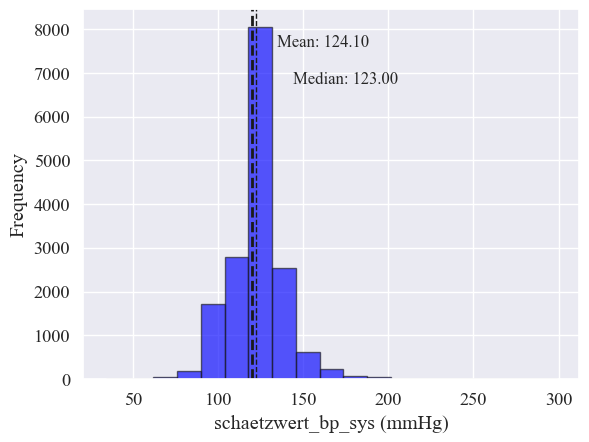

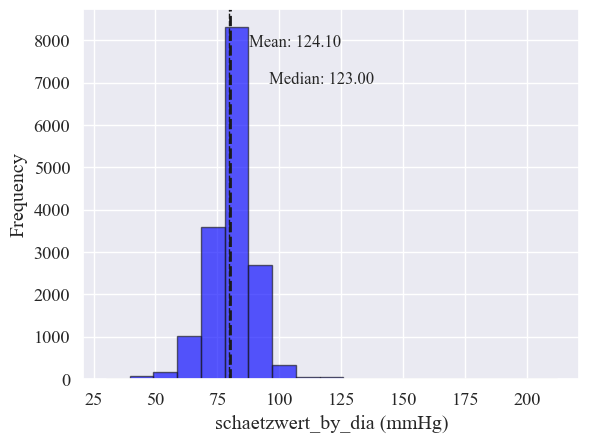

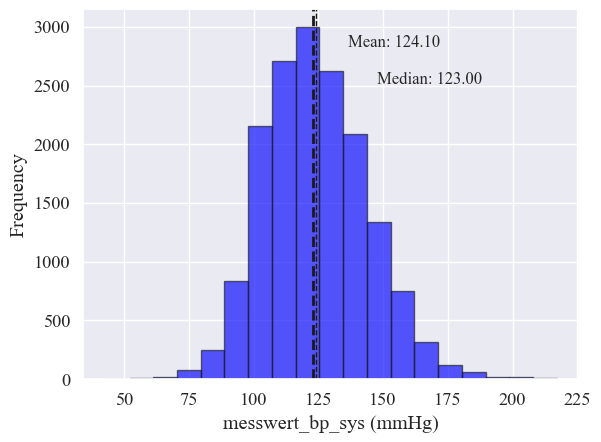

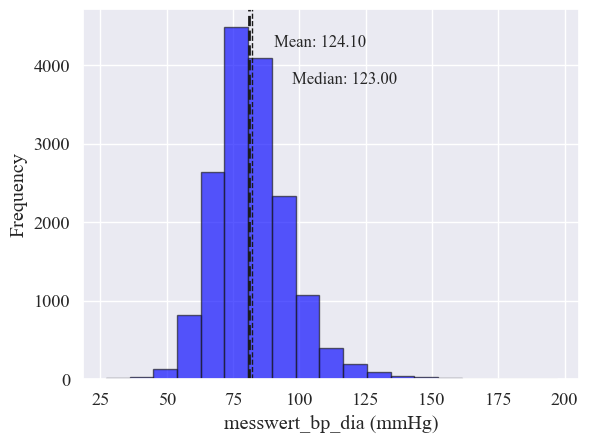

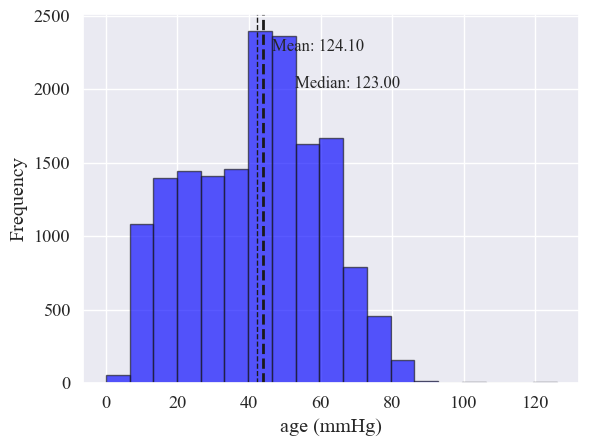

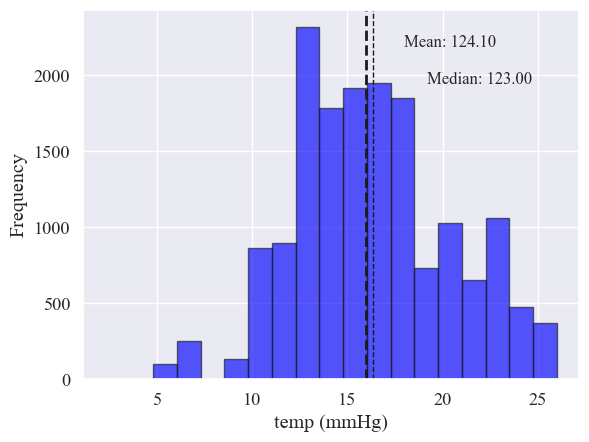

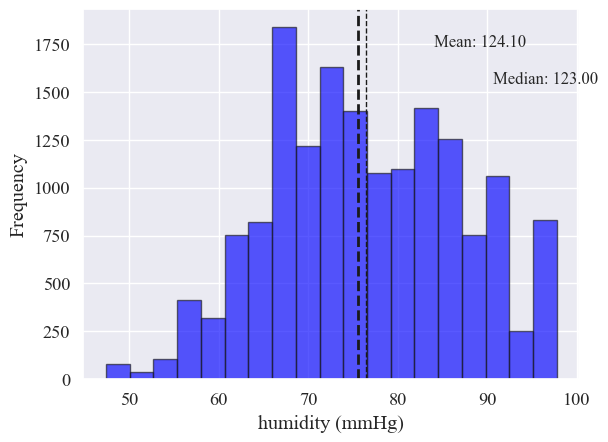

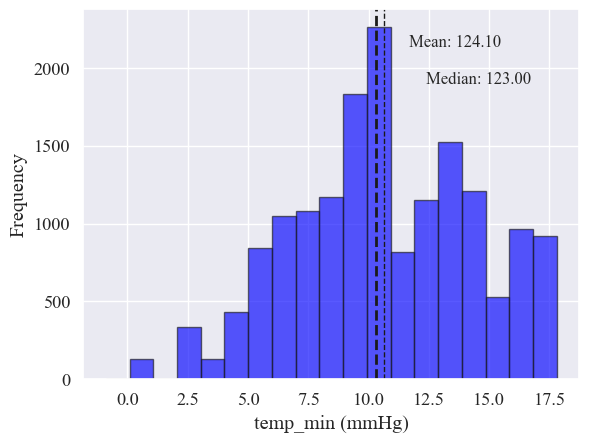

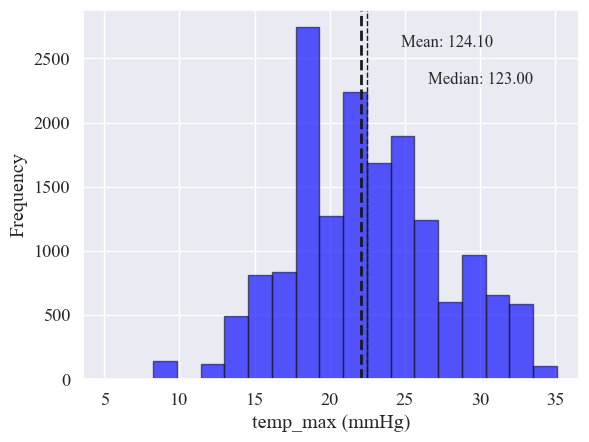

In [11]:
feats = [
 'schaetzwert_bp_sys',
 'schaetzwert_by_dia',
 'messwert_bp_sys',
 'messwert_bp_dia',
 'age',
 'temp',
 'humidity',
 'temp_min',
 'temp_max']
for feat in feats:
    create_histogram(data_df, feat, hist_dir_path)

Bar plots

In [12]:
cat_feats

['zeit',
 'terminal',
 'postleitzahl',
 'gemeinde',
 'bezirk',
 'bundesland',
 'befinden',
 'geschlecht',
 'raucher',
 'blutzucker_bekannt',
 'cholesterin_bekannt',
 'in_behandlung']

bundesland
Steiermark          14373
Wien                  501
Niederösterreich      469
not_applicable        331
Oberösterreich        224
Kärnten               188
Burgenland            122
Salzburg               82
Tirol                  68
Vorarlberg             28
Name: count, dtype: int64


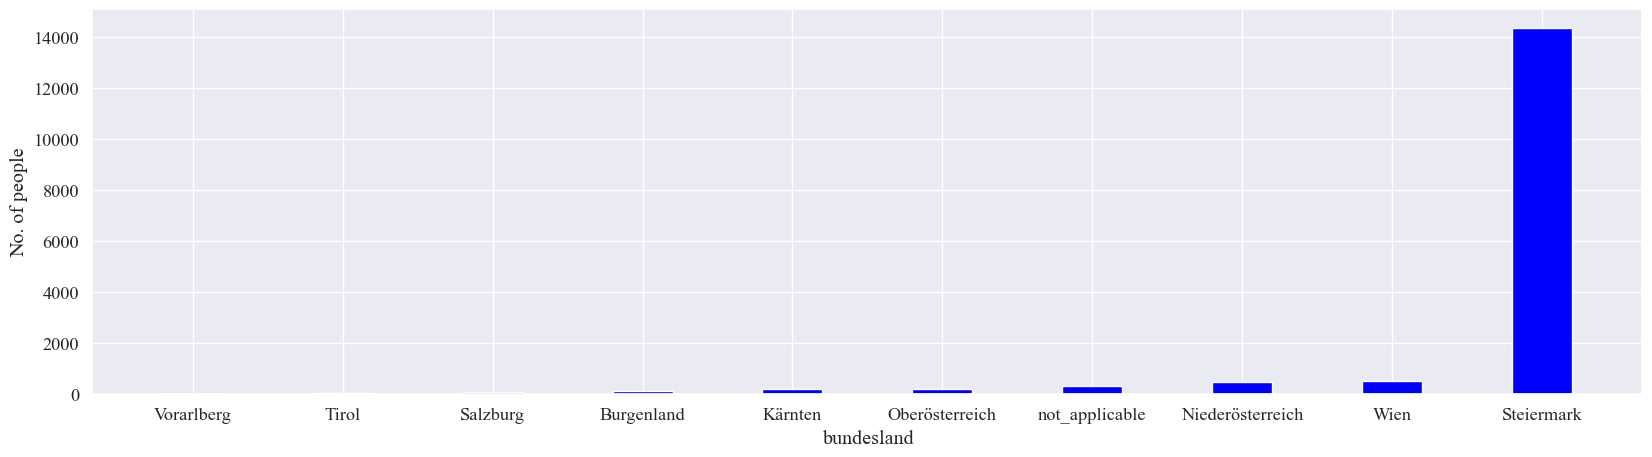

befinden
2          7931
1          5897
3          2240
4           198
5            97
unknown      23
Name: count, dtype: int64


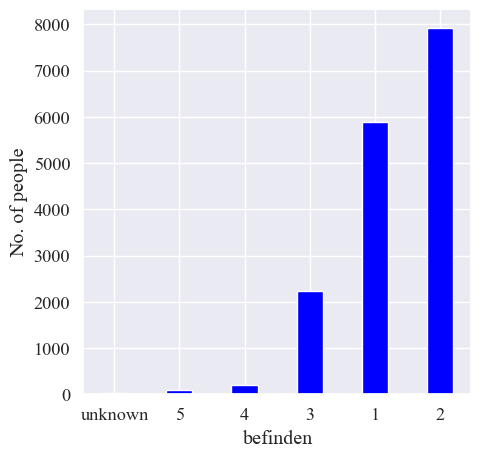

geschlecht
f          9190
m          7173
unknown      23
Name: count, dtype: int64


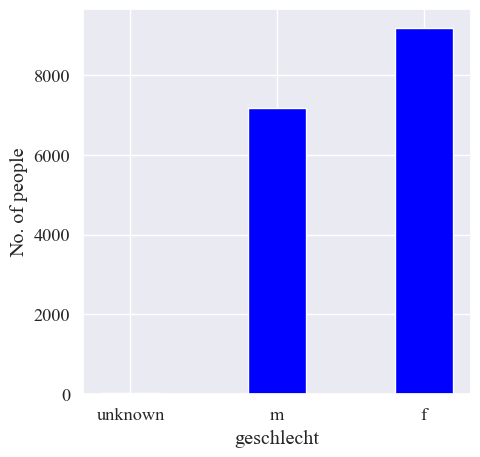

blutzucker_bekannt
False      12276
True        4087
unknown       23
Name: count, dtype: int64


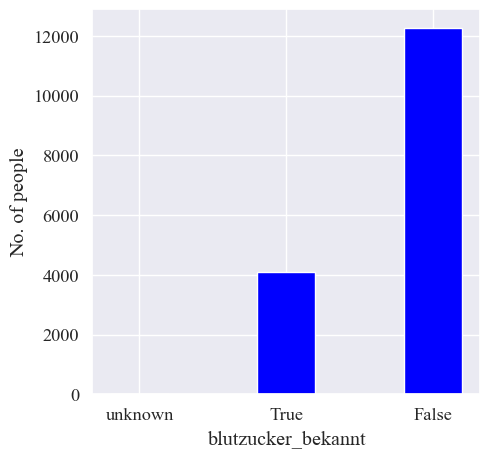

cholesterin_bekannt
False      10636
True        5727
unknown       23
Name: count, dtype: int64


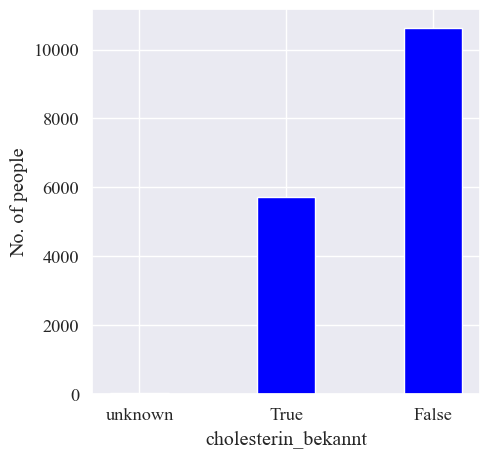

in_behandlung
False      14321
True        2042
unknown       23
Name: count, dtype: int64


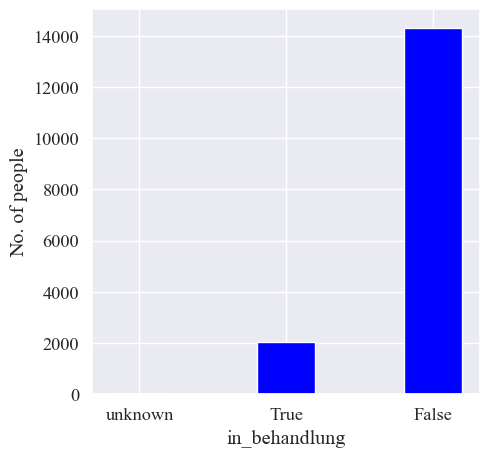

raucher
False      13888
True        2475
unknown       23
Name: count, dtype: int64


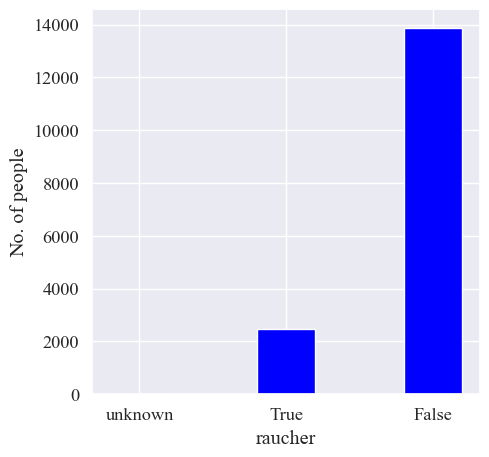

terminal
3b    11545
3a     4841
Name: count, dtype: int64


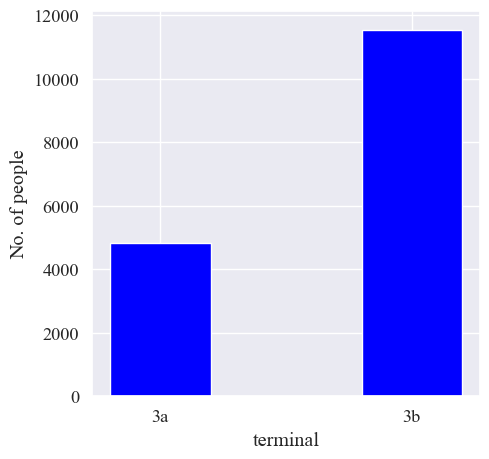

In [13]:
feats = [
 'bundesland',
 'befinden',
 'geschlecht',
 'blutzucker_bekannt',
 'cholesterin_bekannt',
 'in_behandlung',
  'raucher',
  'terminal']

for feat in feats:
    create_bar_plot(data_df, feat, barplot_dir_path)

Correlation

In [14]:
num_feats

['id',
 'geburtsjahr',
 'schaetzwert_bp_sys',
 'schaetzwert_by_dia',
 'messwert_bp_sys',
 'messwert_bp_dia',
 'age',
 'month',
 'hour',
 'day',
 'temp',
 'humidity',
 'temp_min',
 'temp_max']

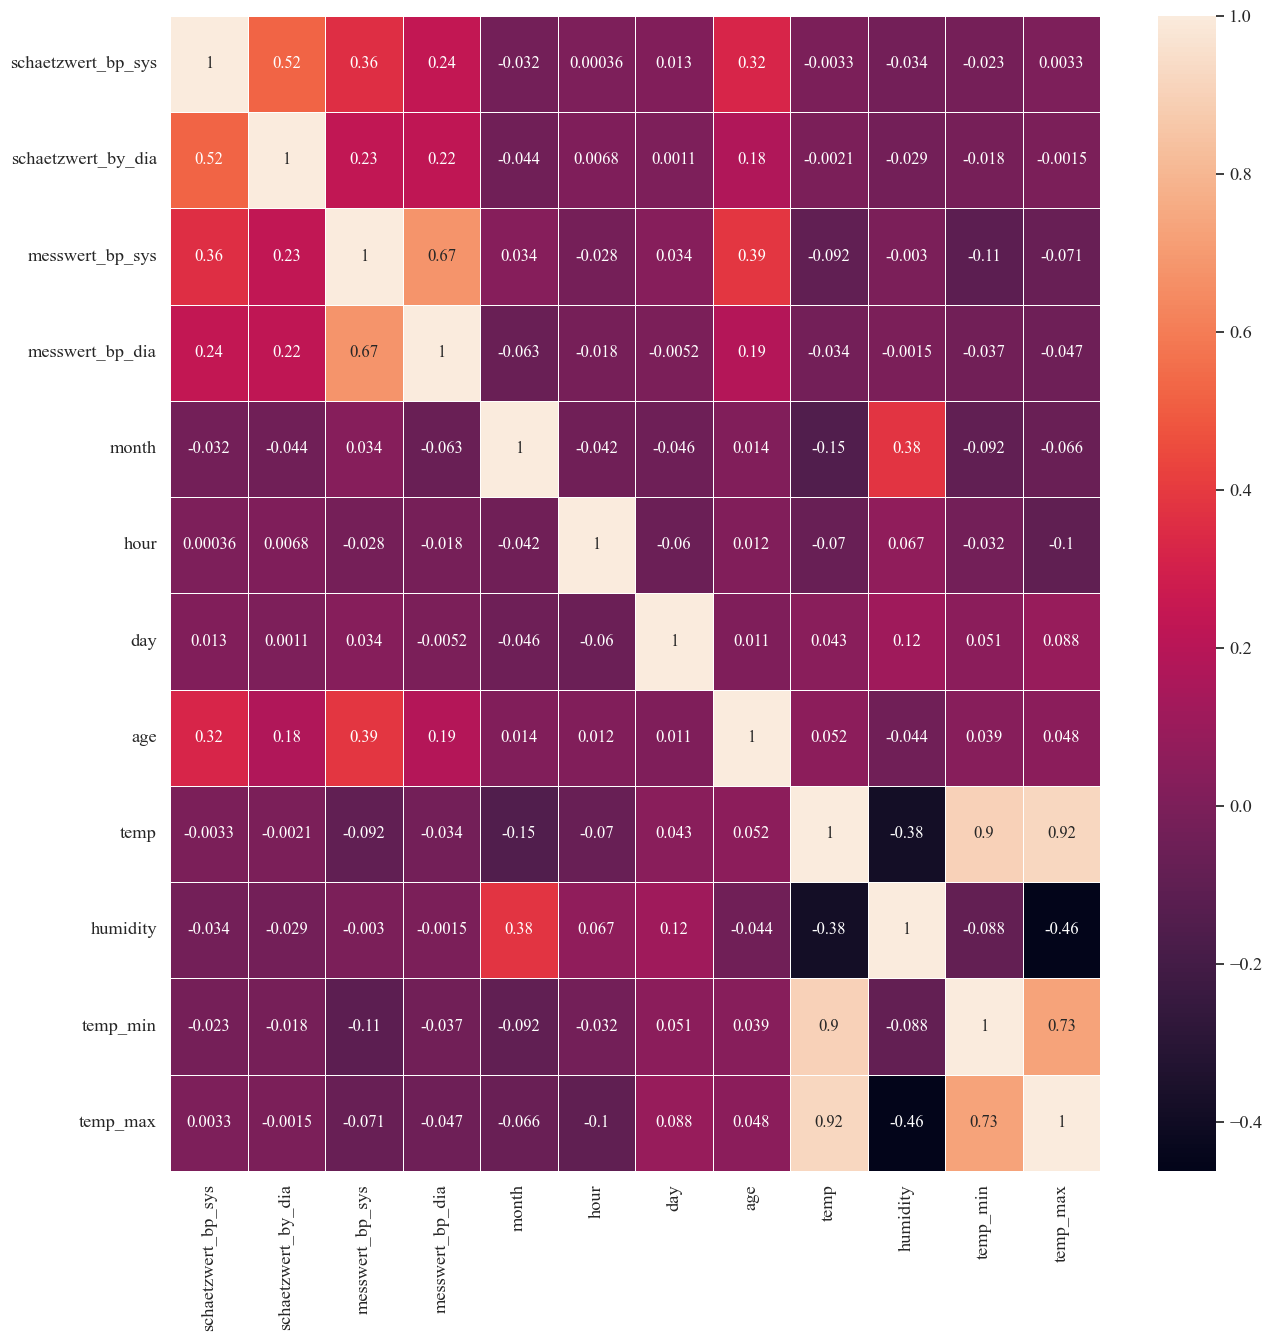

In [15]:
feats = [
 'schaetzwert_bp_sys',
 'schaetzwert_by_dia',
 'messwert_bp_sys',
 'messwert_bp_dia',
 'month',
 'hour',
 'day',
 'age',
 'temp',
 'humidity',
 'temp_min',
 'temp_max']
create_heat_map(data_df, feats, misc_dir_path)

Scatter Plots

<Figure size 640x480 with 0 Axes>

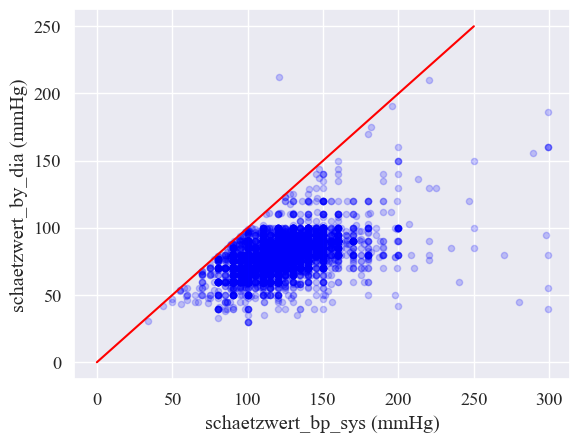

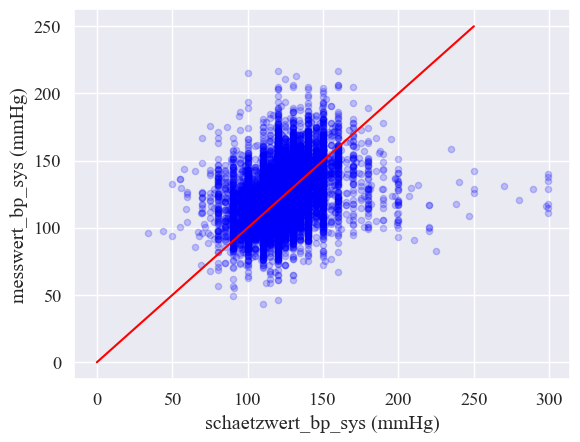

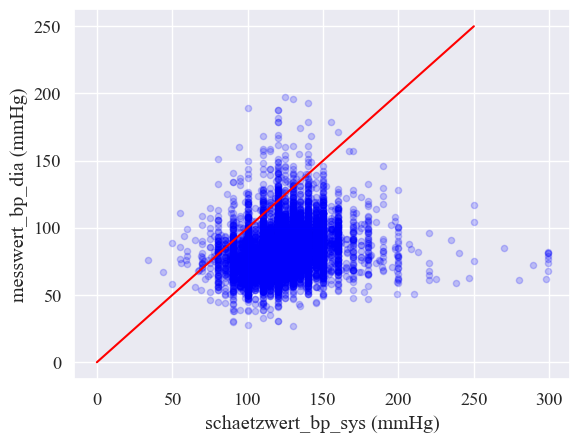

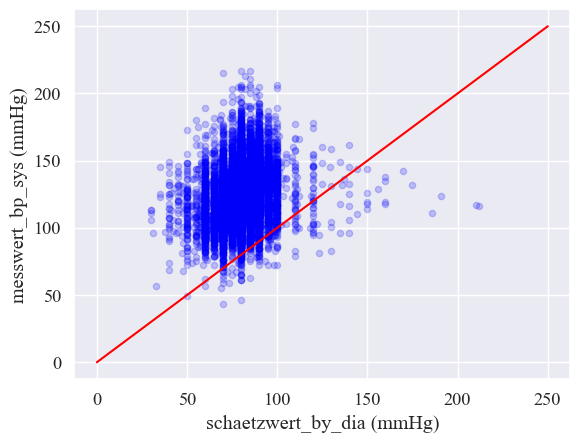

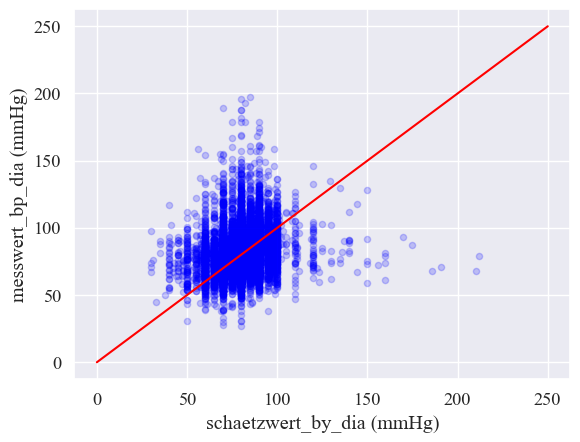

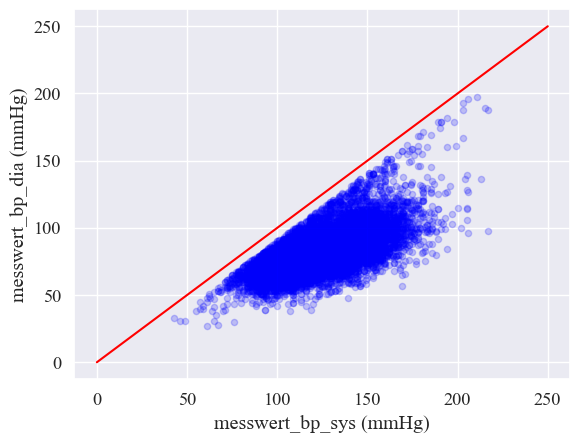

In [16]:
x = np.linspace(0, 250, 100)
feats = [
 'schaetzwert_bp_sys',
 'schaetzwert_by_dia',
 'messwert_bp_sys',
 'messwert_bp_dia'
]
create_scatter_plot(data_df, feats, x, misc_dir_path)

Boxplots

terminal
3a    120.0
3b    120.0
Name: schaetzwert_bp_sys, dtype: float64


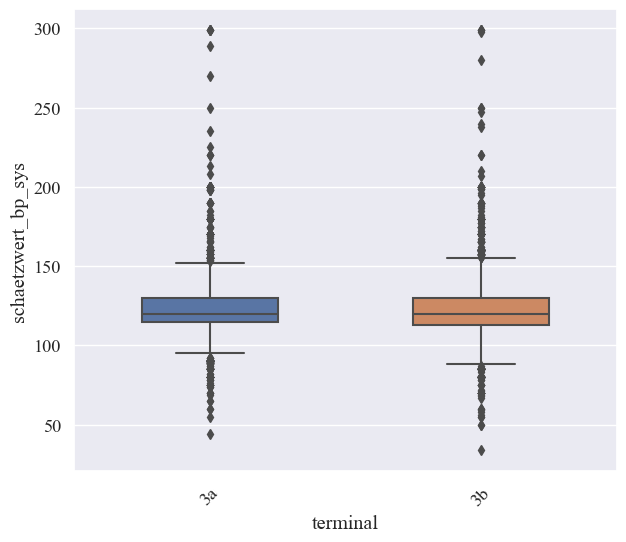

bundesland
Burgenland          120.0
Kärnten             120.0
Niederösterreich    120.0
Oberösterreich      120.0
Salzburg            120.0
Steiermark          120.0
Tirol               120.0
Vorarlberg          120.0
Wien                120.0
not_applicable      120.0
Name: schaetzwert_bp_sys, dtype: float64


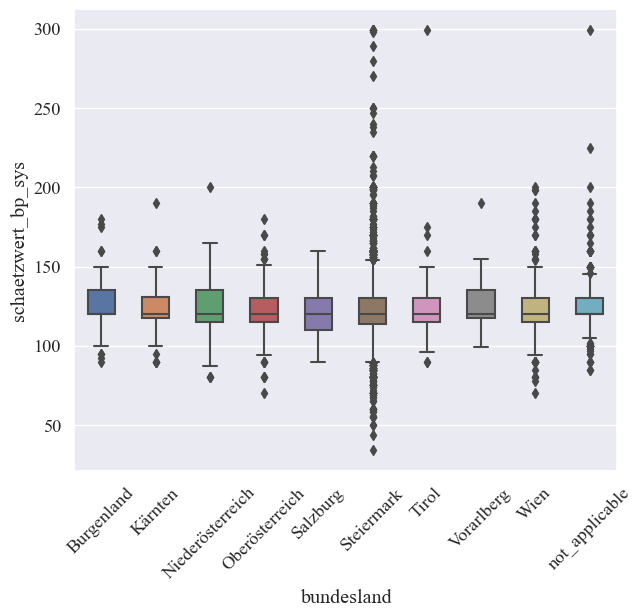

befinden
1          120.0
2          120.0
3          120.0
4          120.0
5          120.0
unknown    120.0
Name: schaetzwert_bp_sys, dtype: float64


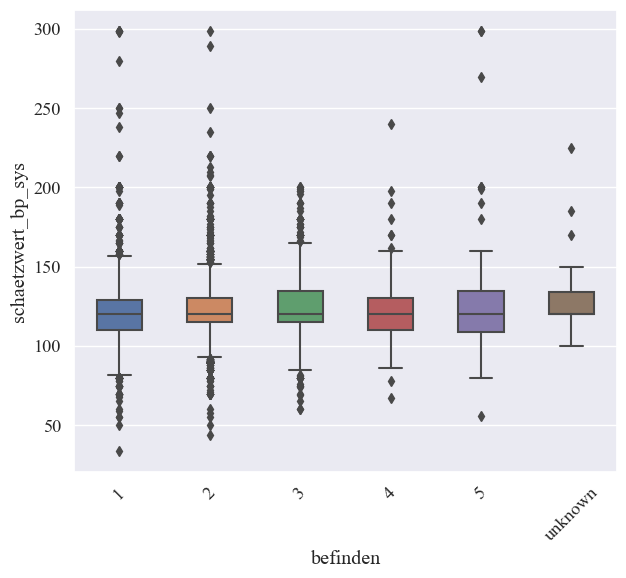

geschlecht
f          120.0
m          120.0
unknown    120.0
Name: schaetzwert_bp_sys, dtype: float64


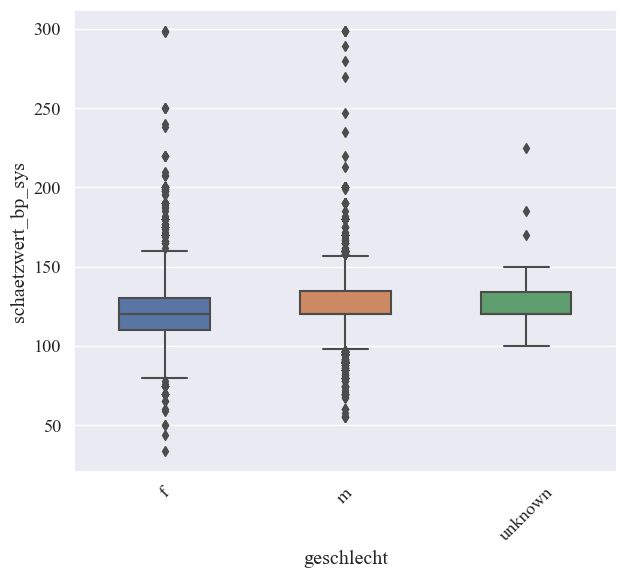

raucher
False      120.0
True       120.0
unknown    120.0
Name: schaetzwert_bp_sys, dtype: float64


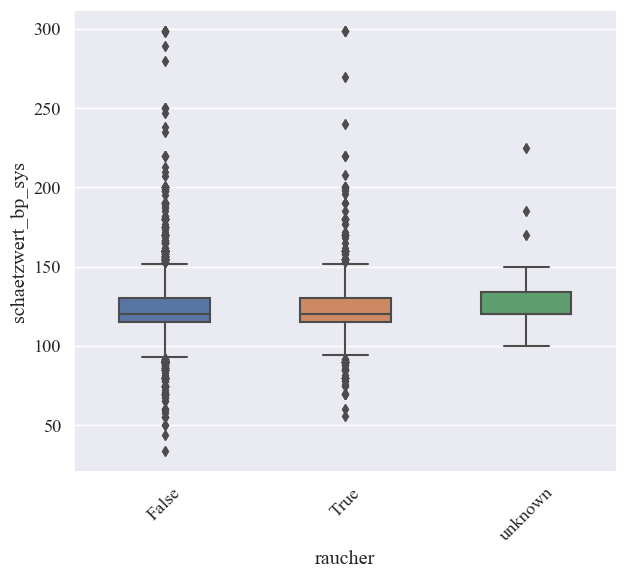

blutzucker_bekannt
False      120.0
True       125.0
unknown    120.0
Name: schaetzwert_bp_sys, dtype: float64


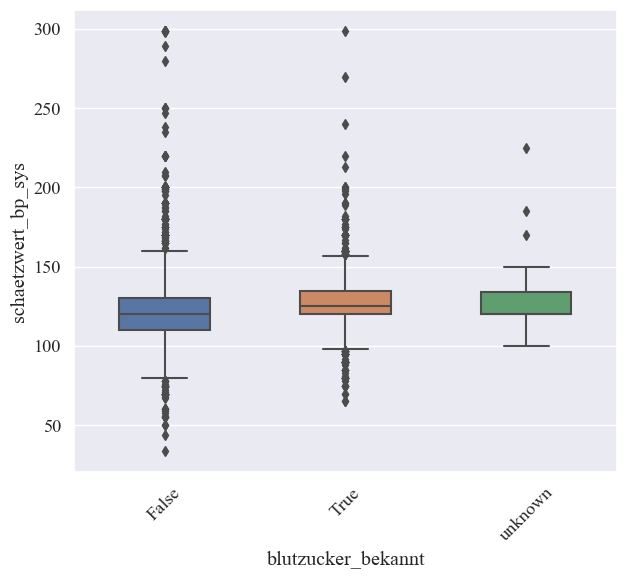

cholesterin_bekannt
False      120.0
True       120.0
unknown    120.0
Name: schaetzwert_bp_sys, dtype: float64


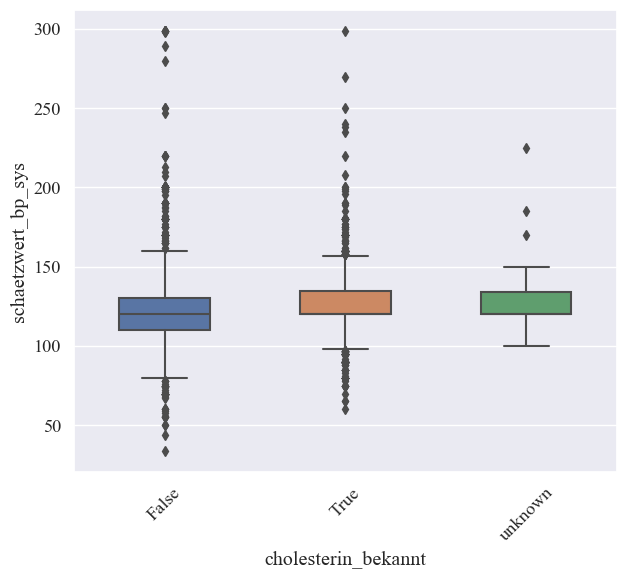

in_behandlung
False      120.0
True       135.0
unknown    120.0
Name: schaetzwert_bp_sys, dtype: float64


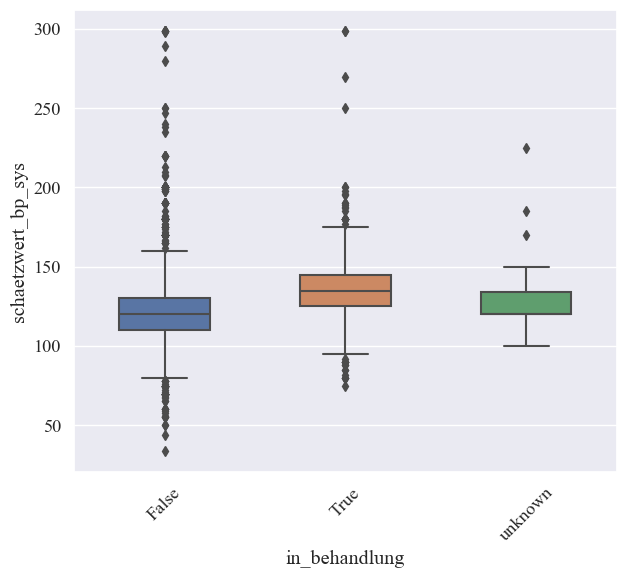

terminal
3a    80.0
3b    80.0
Name: schaetzwert_by_dia, dtype: float64


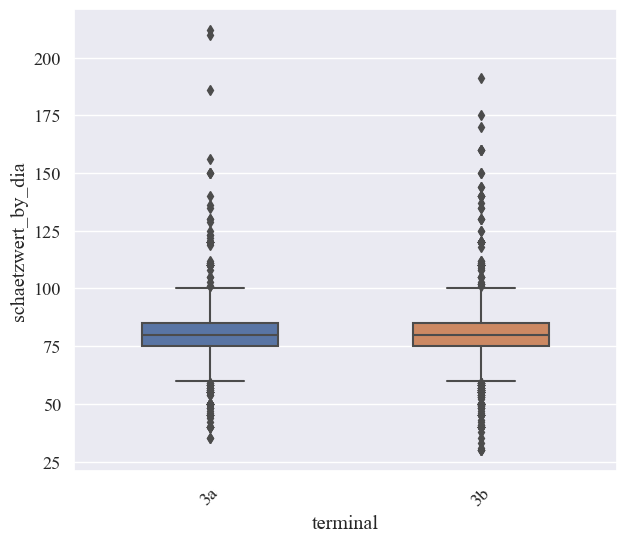

bundesland
Burgenland          80.0
Kärnten             80.0
Niederösterreich    80.0
Oberösterreich      80.0
Salzburg            80.0
Steiermark          80.0
Tirol               80.0
Vorarlberg          85.0
Wien                80.0
not_applicable      80.0
Name: schaetzwert_by_dia, dtype: float64


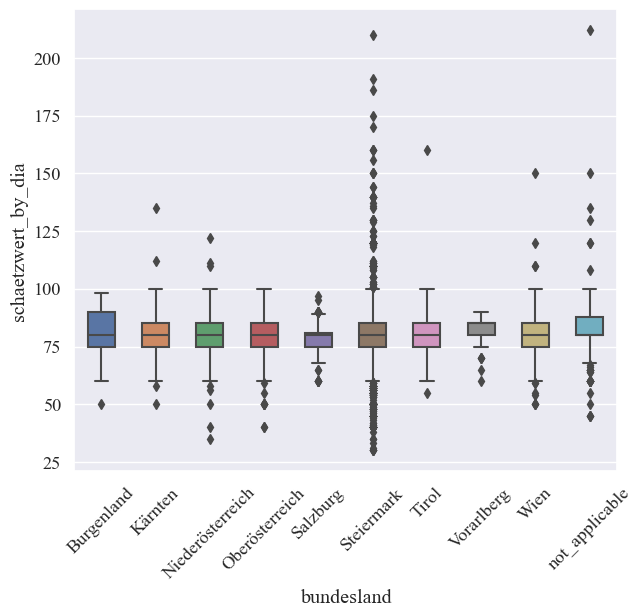

befinden
1          80.0
2          80.0
3          80.0
4          80.0
5          80.0
unknown    80.0
Name: schaetzwert_by_dia, dtype: float64


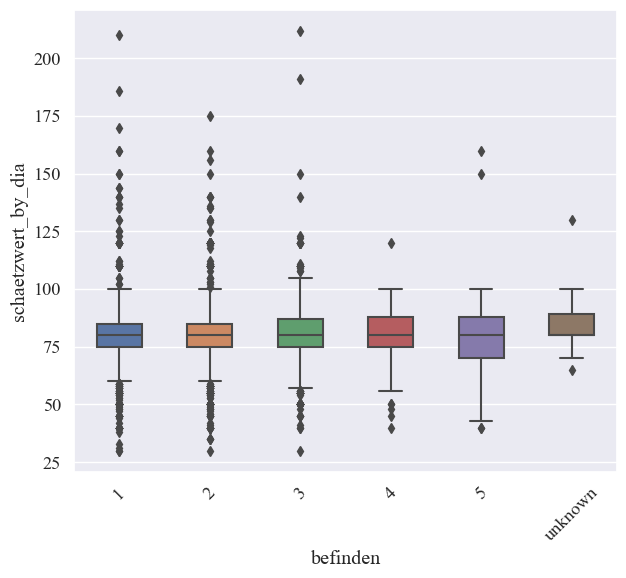

geschlecht
f          80.0
m          80.0
unknown    80.0
Name: schaetzwert_by_dia, dtype: float64


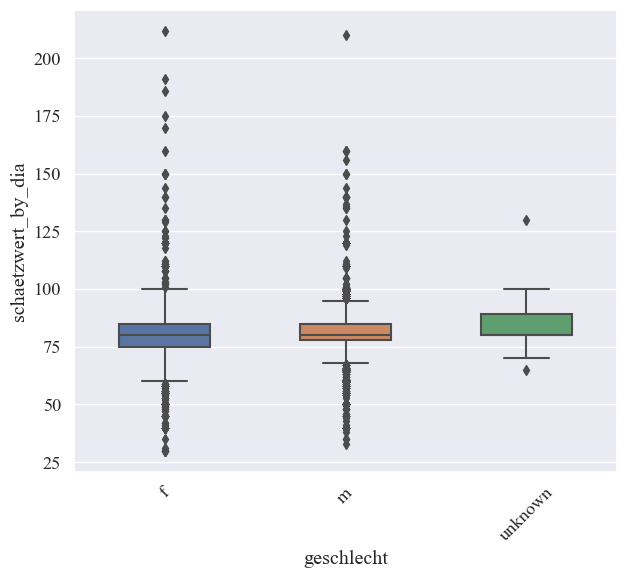

raucher
False      80.0
True       80.0
unknown    80.0
Name: schaetzwert_by_dia, dtype: float64


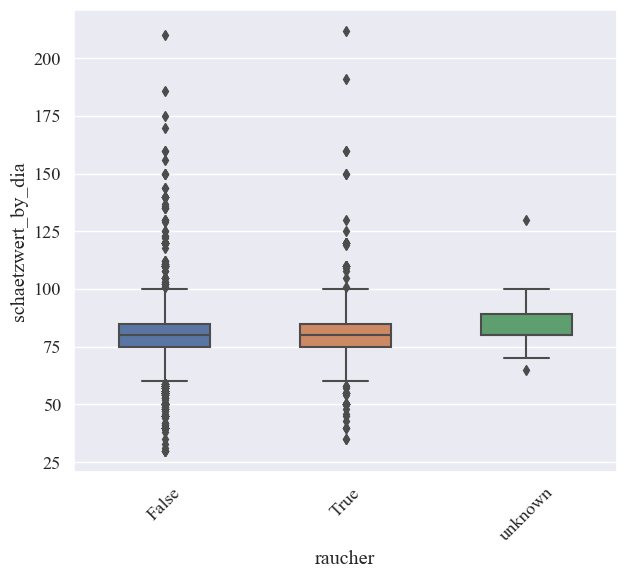

blutzucker_bekannt
False      80.0
True       80.0
unknown    80.0
Name: schaetzwert_by_dia, dtype: float64


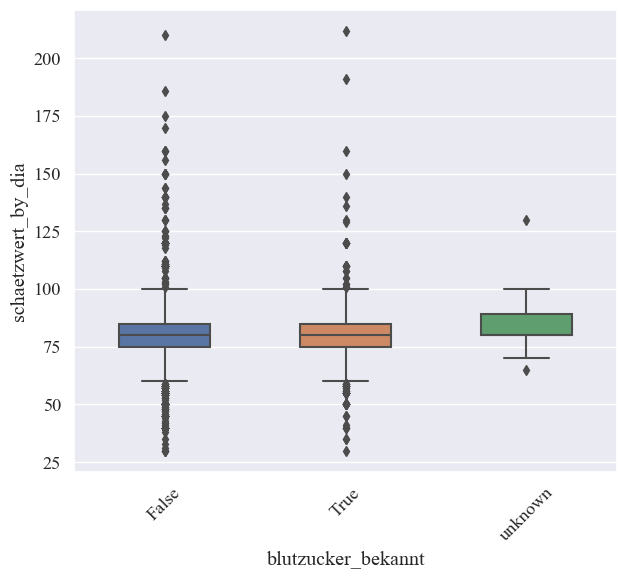

cholesterin_bekannt
False      80.0
True       80.0
unknown    80.0
Name: schaetzwert_by_dia, dtype: float64


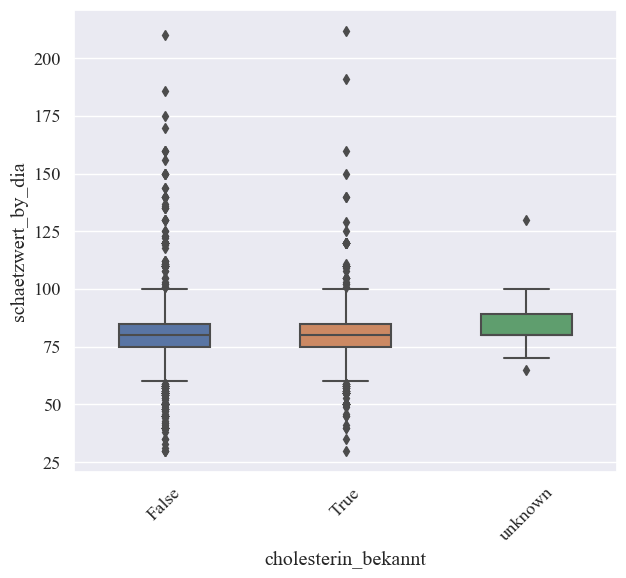

in_behandlung
False      80.0
True       85.0
unknown    80.0
Name: schaetzwert_by_dia, dtype: float64


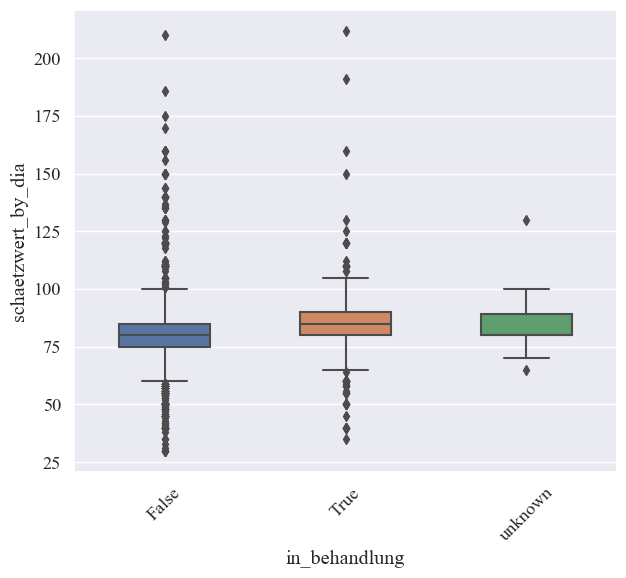

terminal
3a    123.0
3b    123.0
Name: messwert_bp_sys, dtype: float64


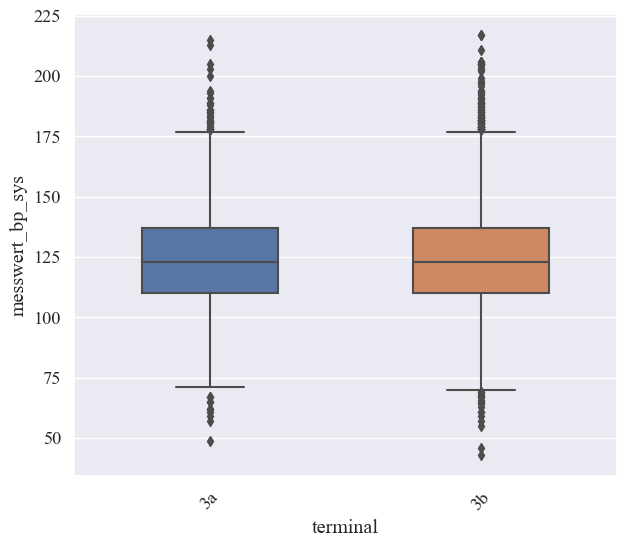

bundesland
Burgenland          124.0
Kärnten             125.5
Niederösterreich    122.0
Oberösterreich      122.0
Salzburg            119.0
Steiermark          123.0
Tirol               119.5
Vorarlberg          121.0
Wien                123.0
not_applicable      123.0
Name: messwert_bp_sys, dtype: float64


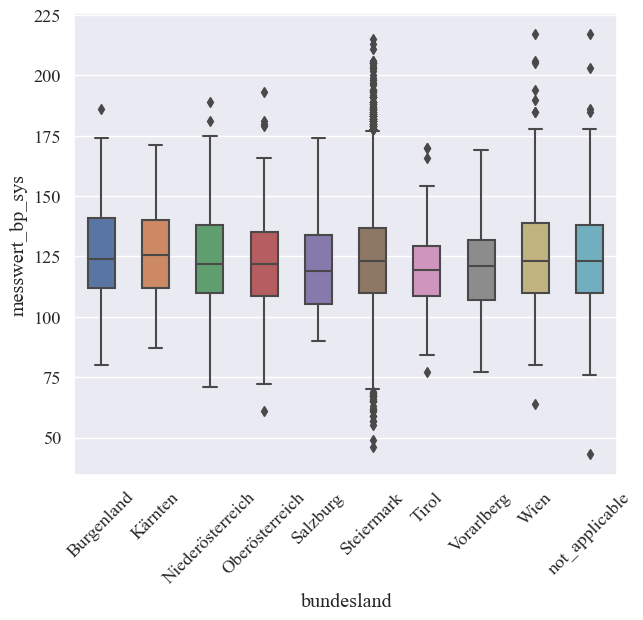

befinden
1          120.0
2          125.0
3          125.0
4          121.0
5          121.0
unknown    123.0
Name: messwert_bp_sys, dtype: float64


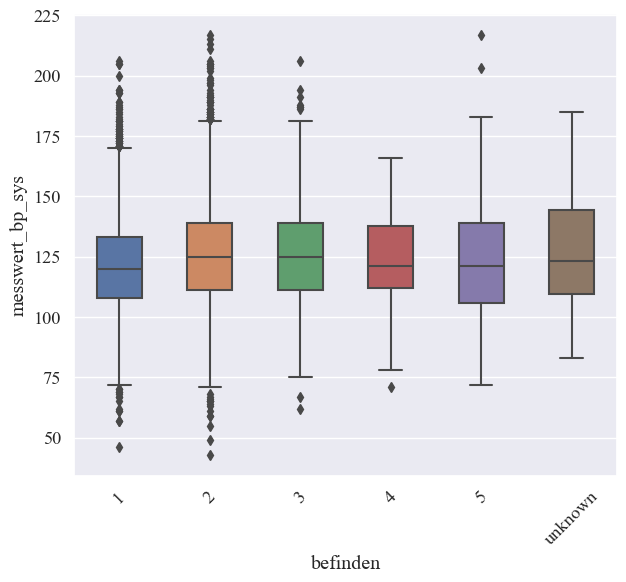

geschlecht
f          120.0
m          126.0
unknown    123.0
Name: messwert_bp_sys, dtype: float64


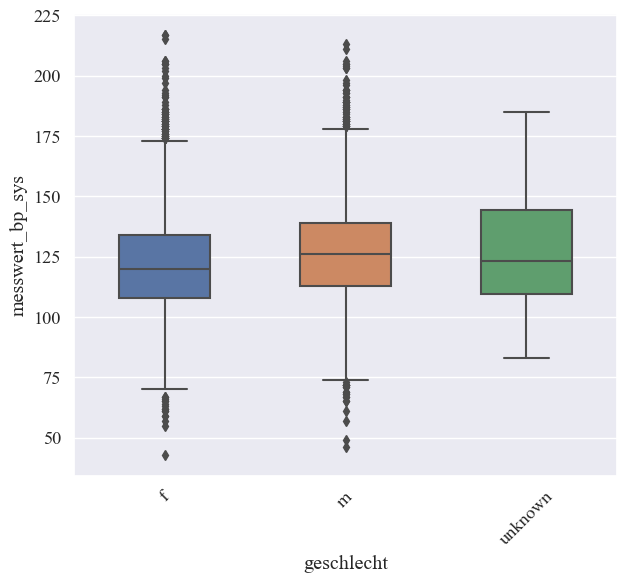

raucher
False      123.0
True       121.0
unknown    123.0
Name: messwert_bp_sys, dtype: float64


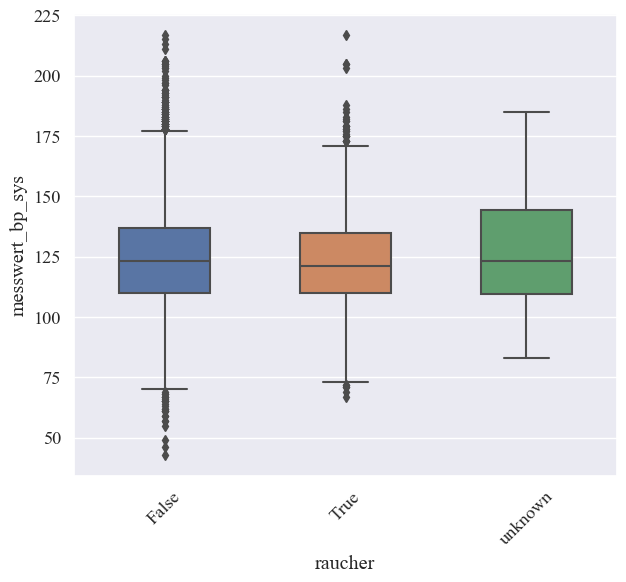

blutzucker_bekannt
False      121.0
True       128.0
unknown    123.0
Name: messwert_bp_sys, dtype: float64


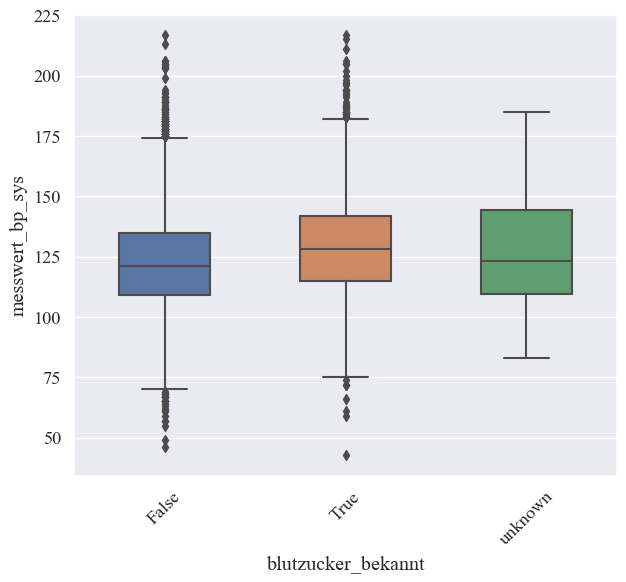

cholesterin_bekannt
False      121.0
True       127.0
unknown    123.0
Name: messwert_bp_sys, dtype: float64


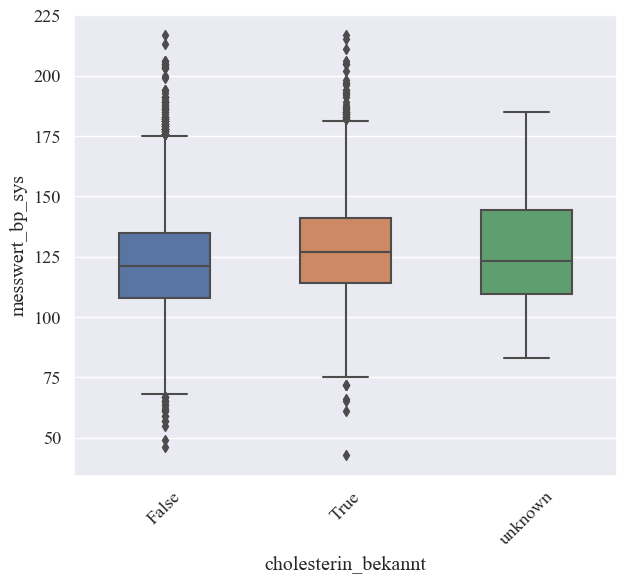

in_behandlung
False      121.0
True       138.0
unknown    123.0
Name: messwert_bp_sys, dtype: float64


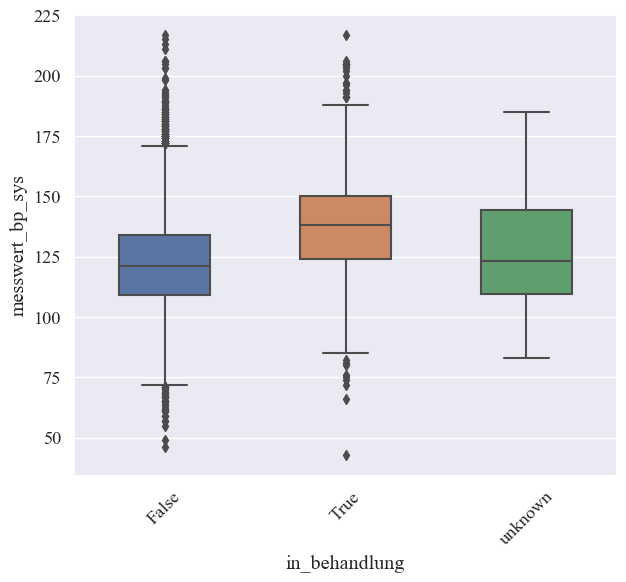

terminal
3a    82.0
3b    80.0
Name: messwert_bp_dia, dtype: float64


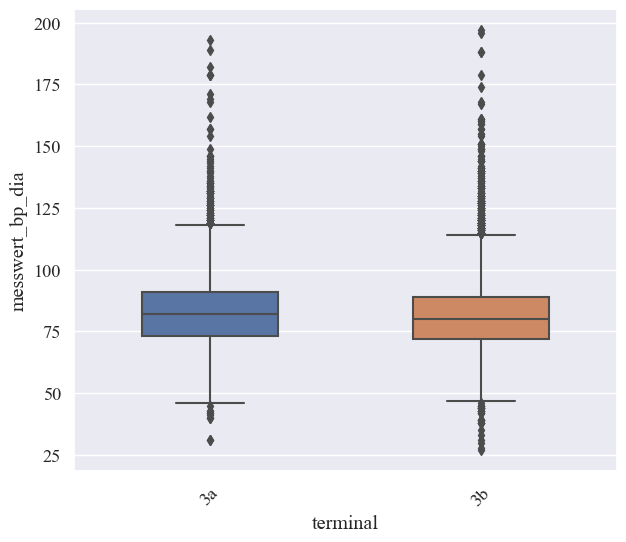

bundesland
Burgenland          84.0
Kärnten             83.0
Niederösterreich    81.0
Oberösterreich      80.0
Salzburg            80.5
Steiermark          81.0
Tirol               81.0
Vorarlberg          82.5
Wien                82.0
not_applicable      80.0
Name: messwert_bp_dia, dtype: float64


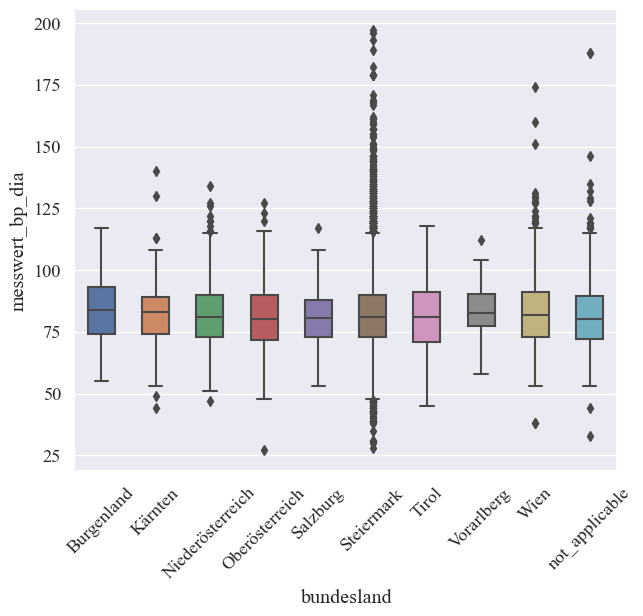

befinden
1          80.0
2          81.0
3          81.0
4          81.0
5          81.0
unknown    82.0
Name: messwert_bp_dia, dtype: float64


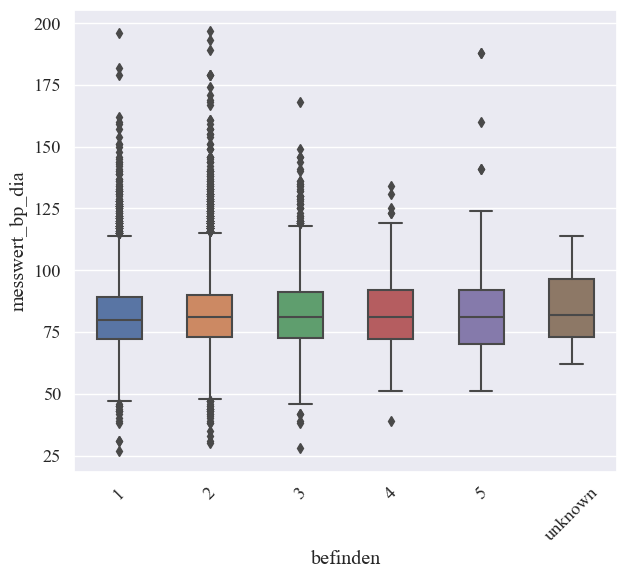

geschlecht
f          80.0
m          82.0
unknown    82.0
Name: messwert_bp_dia, dtype: float64


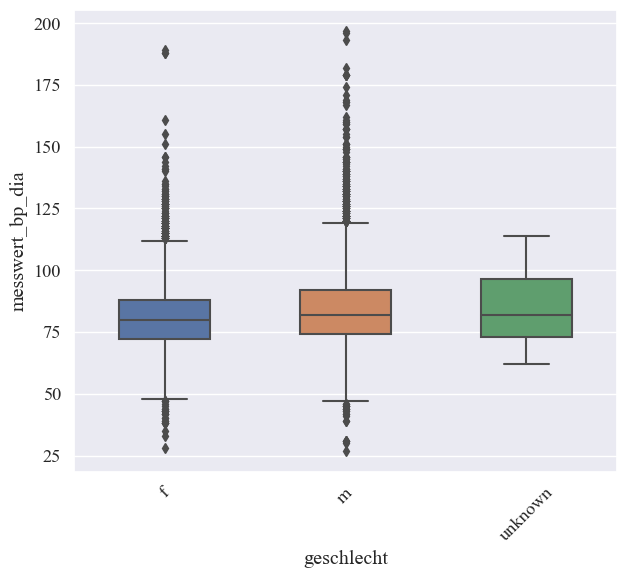

raucher
False      81.0
True       81.0
unknown    82.0
Name: messwert_bp_dia, dtype: float64


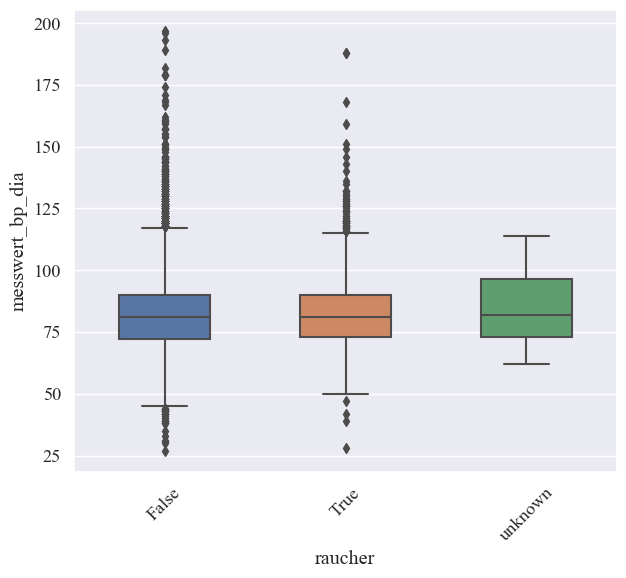

blutzucker_bekannt
False      80.0
True       82.0
unknown    82.0
Name: messwert_bp_dia, dtype: float64


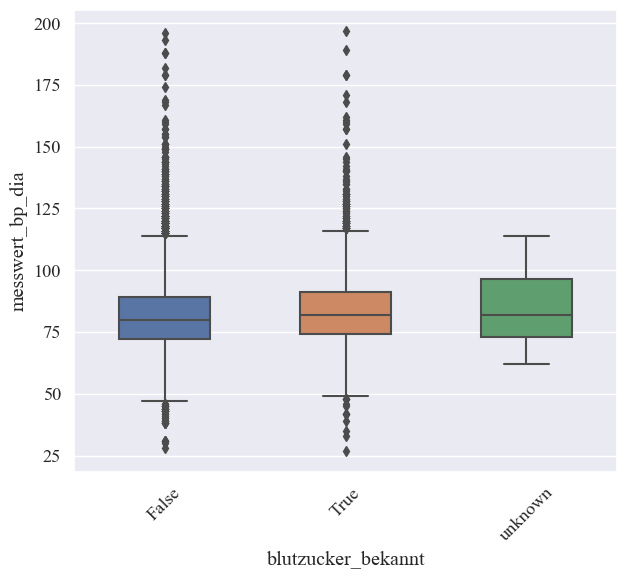

cholesterin_bekannt
False      80.0
True       82.0
unknown    82.0
Name: messwert_bp_dia, dtype: float64


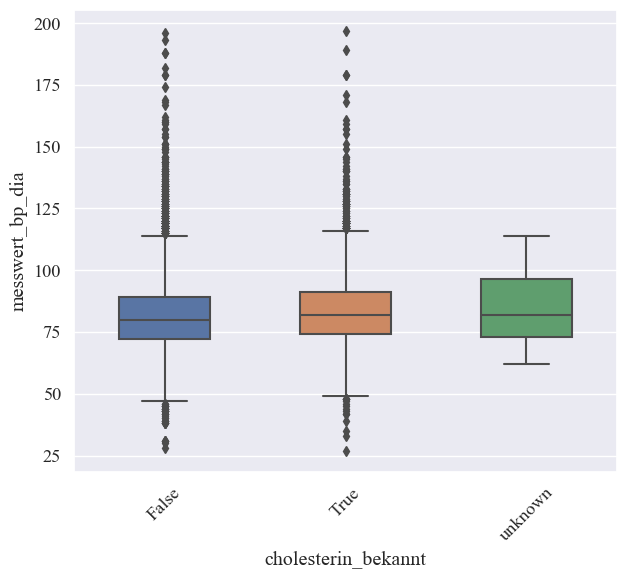

in_behandlung
False      80.0
True       85.0
unknown    82.0
Name: messwert_bp_dia, dtype: float64


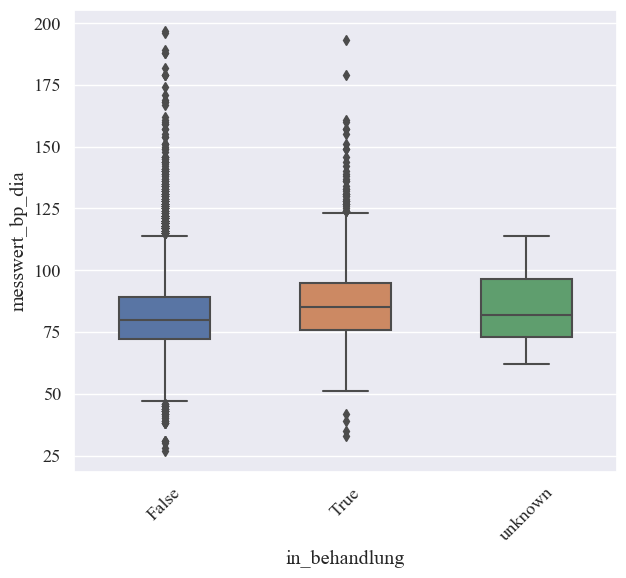

terminal
3a    42.0
3b    44.0
Name: age, dtype: float64


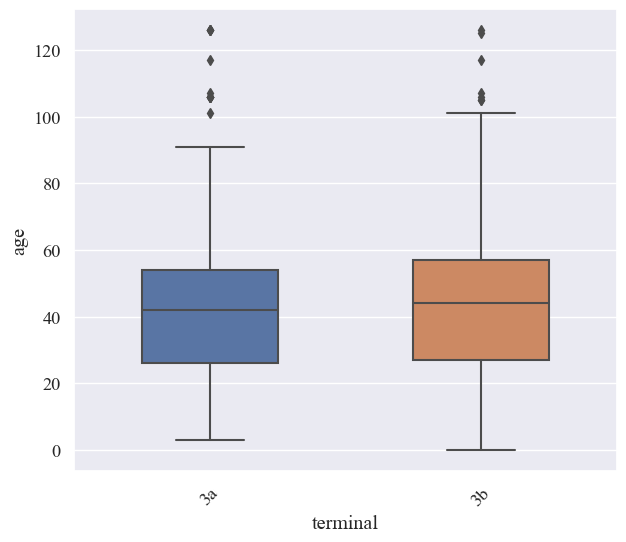

bundesland
Burgenland          46.0
Kärnten             47.0
Niederösterreich    43.5
Oberösterreich      39.0
Salzburg            48.0
Steiermark          43.0
Tirol               46.0
Vorarlberg          44.5
Wien                47.0
not_applicable      45.0
Name: age, dtype: float64


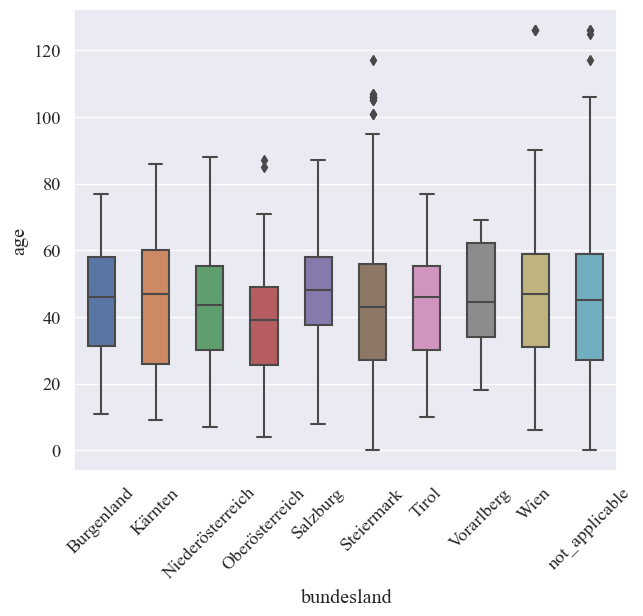

befinden
1          39.0
2          46.0
3          47.0
4          44.0
5          26.0
unknown     NaN
Name: age, dtype: float64


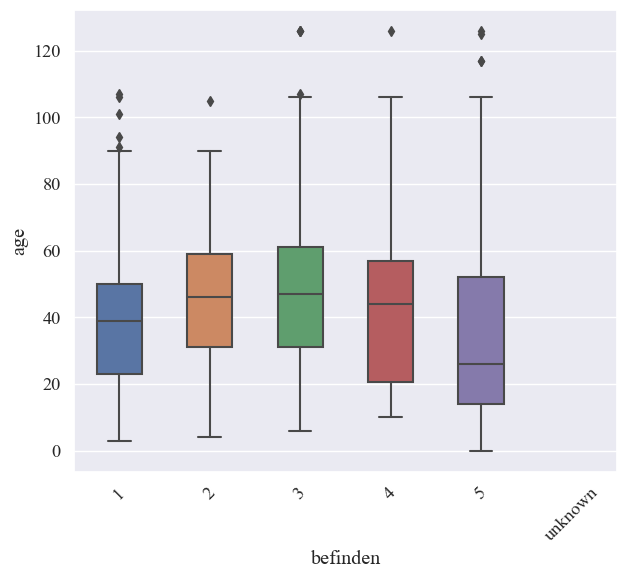

geschlecht
f          43.0
m          44.0
unknown     NaN
Name: age, dtype: float64


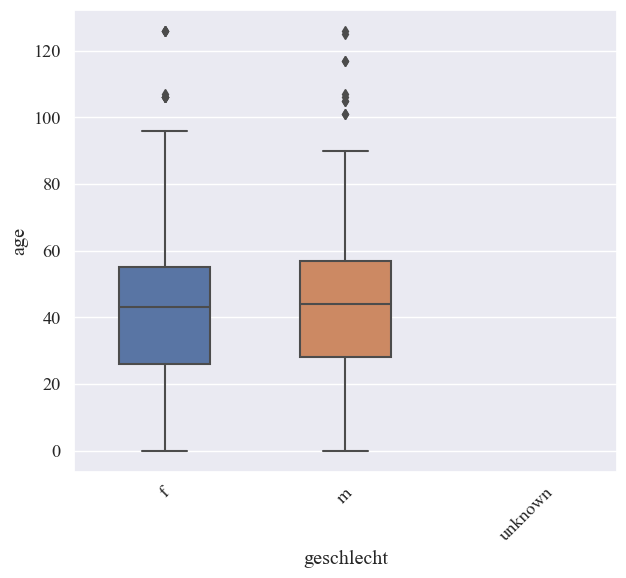

raucher
False      45.0
True       38.0
unknown     NaN
Name: age, dtype: float64


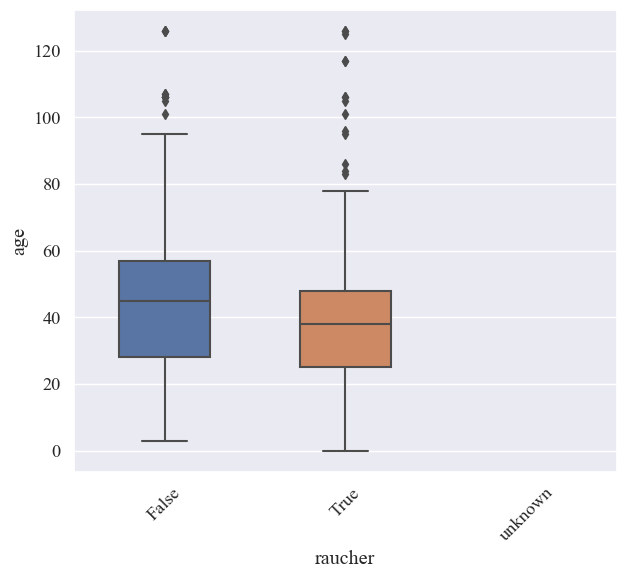

blutzucker_bekannt
False      40.0
True       51.0
unknown     NaN
Name: age, dtype: float64


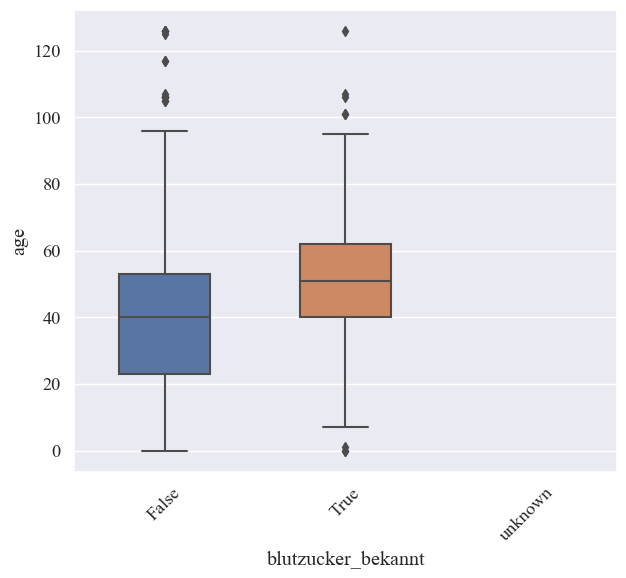

cholesterin_bekannt
False      38.0
True       51.0
unknown     NaN
Name: age, dtype: float64


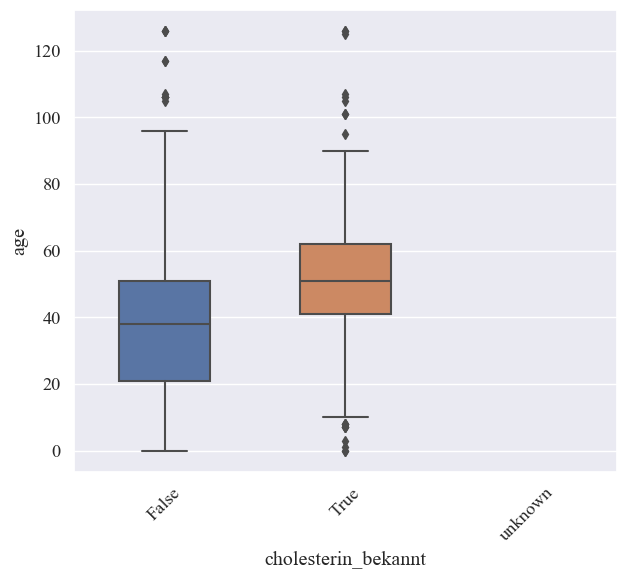

in_behandlung
False      41.0
True       62.0
unknown     NaN
Name: age, dtype: float64


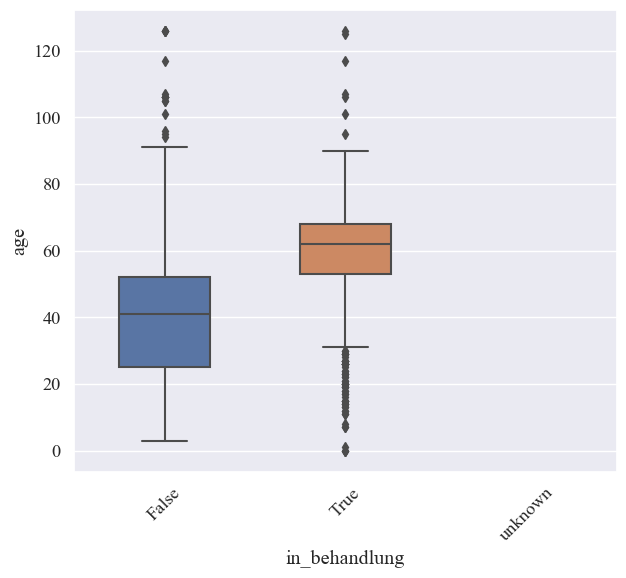

terminal
3a    14.1
3b    16.4
Name: temp, dtype: float64


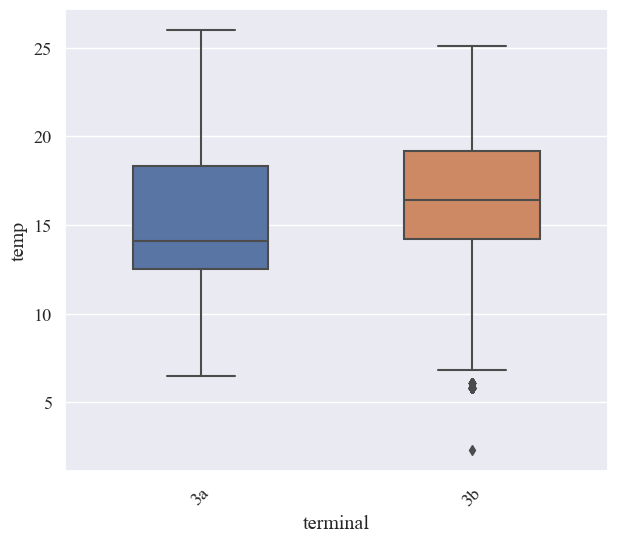

bundesland
Burgenland          17.10
Kärnten             15.90
Niederösterreich    16.40
Oberösterreich      16.90
Salzburg            17.10
Steiermark          16.00
Tirol               17.95
Vorarlberg          15.55
Wien                16.40
not_applicable      15.70
Name: temp, dtype: float64


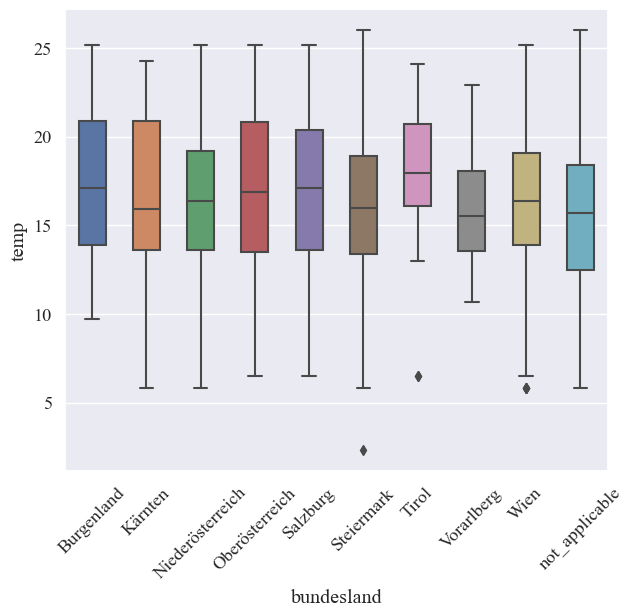

befinden
1          16.40
2          16.00
3          16.00
4          16.25
5          15.40
unknown    11.00
Name: temp, dtype: float64


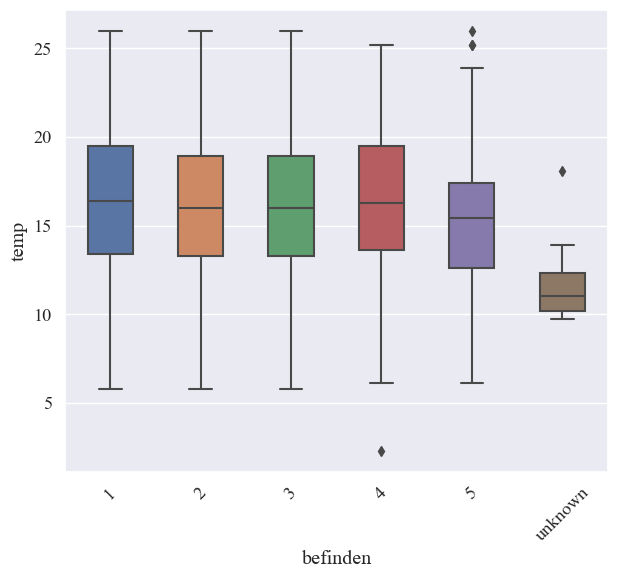

geschlecht
f          16.1
m          16.0
unknown    11.0
Name: temp, dtype: float64


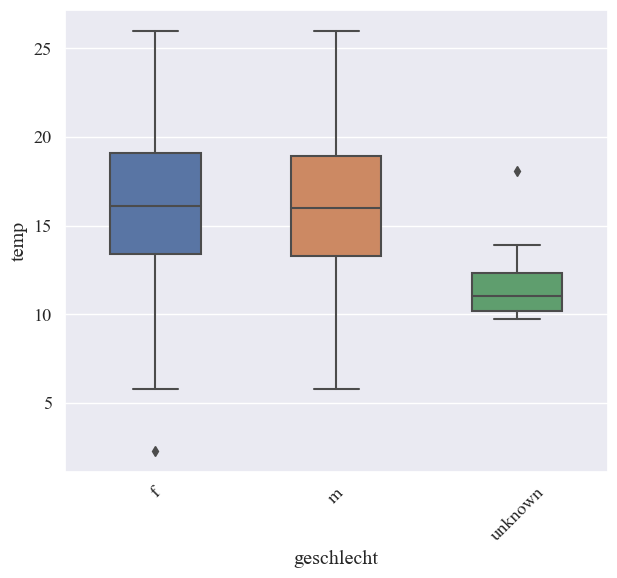

raucher
False      16.0
True       16.0
unknown    11.0
Name: temp, dtype: float64


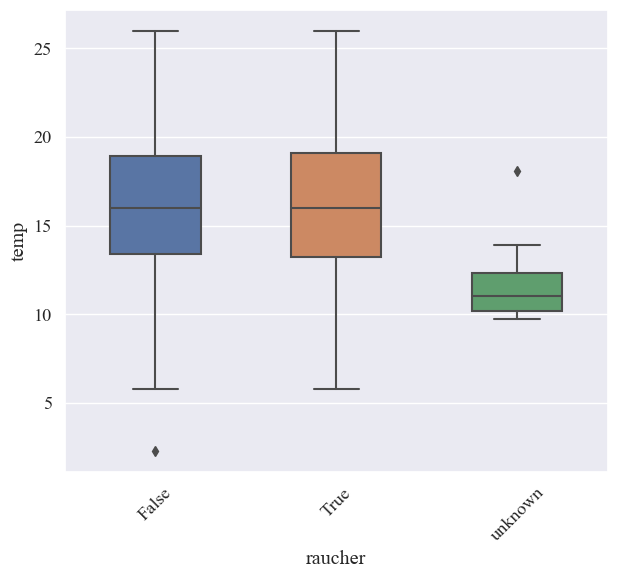

blutzucker_bekannt
False      16.0
True       16.0
unknown    11.0
Name: temp, dtype: float64


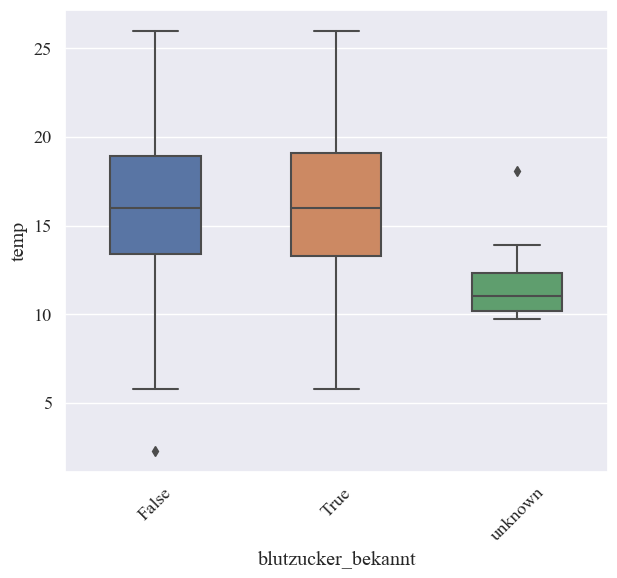

cholesterin_bekannt
False      16.0
True       16.1
unknown    11.0
Name: temp, dtype: float64


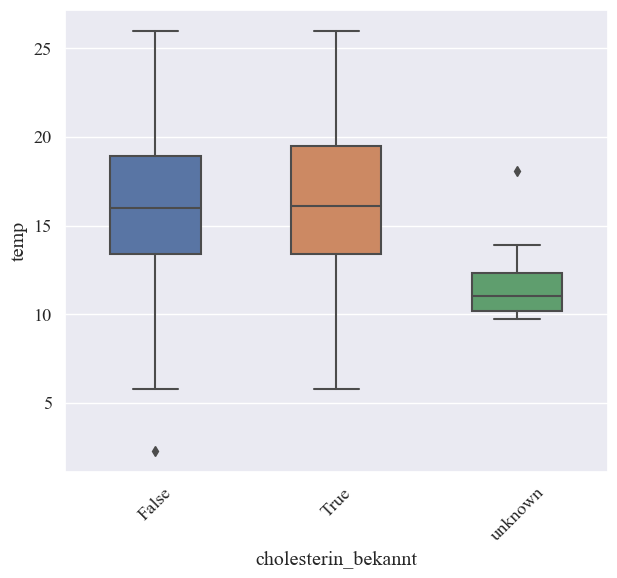

in_behandlung
False      16.0
True       16.4
unknown    11.0
Name: temp, dtype: float64


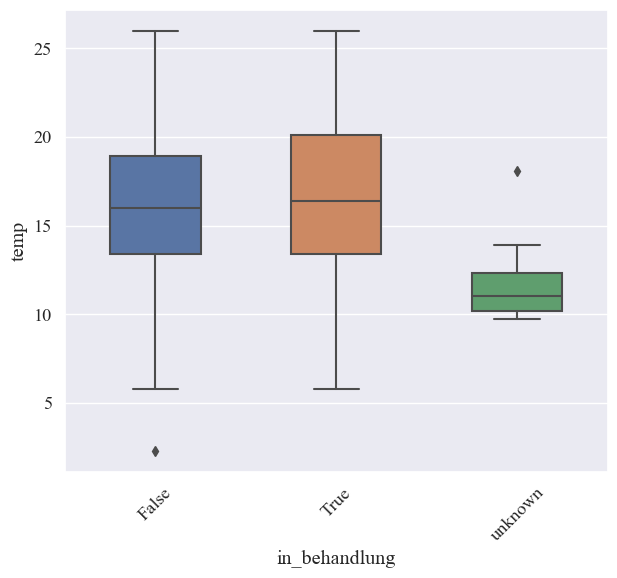

terminal
3a    71.1
3b    78.2
Name: humidity, dtype: float64


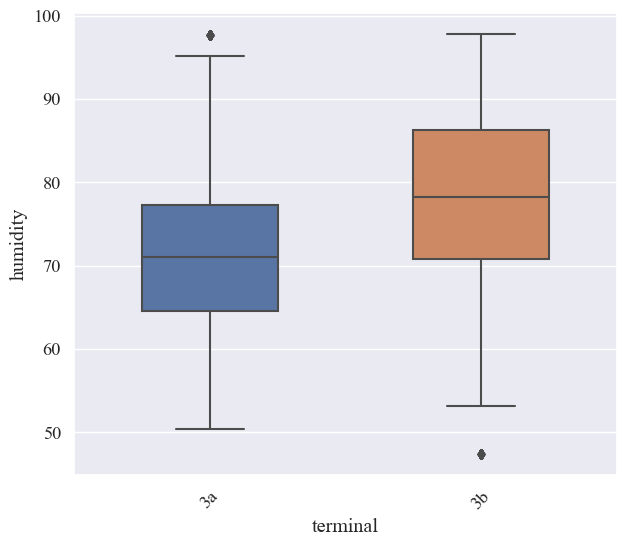

bundesland
Burgenland          75.05
Kärnten             75.30
Niederösterreich    77.30
Oberösterreich      75.10
Salzburg            74.90
Steiermark          75.60
Tirol               72.20
Vorarlberg          77.80
Wien                75.80
not_applicable      75.60
Name: humidity, dtype: float64


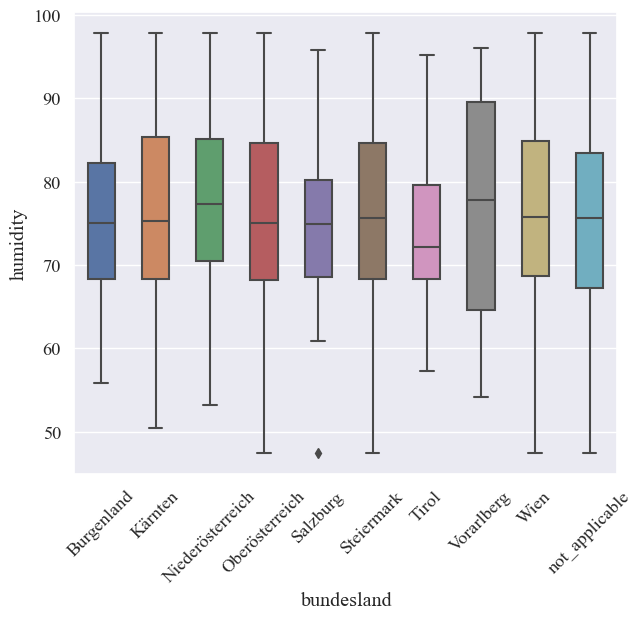

befinden
1          75.6
2          75.6
3          75.6
4          76.6
5          75.8
unknown    64.6
Name: humidity, dtype: float64


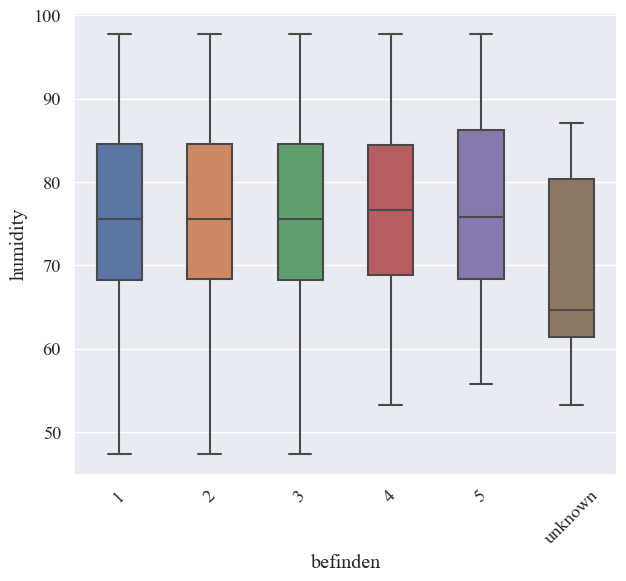

geschlecht
f          75.6
m          75.8
unknown    64.6
Name: humidity, dtype: float64


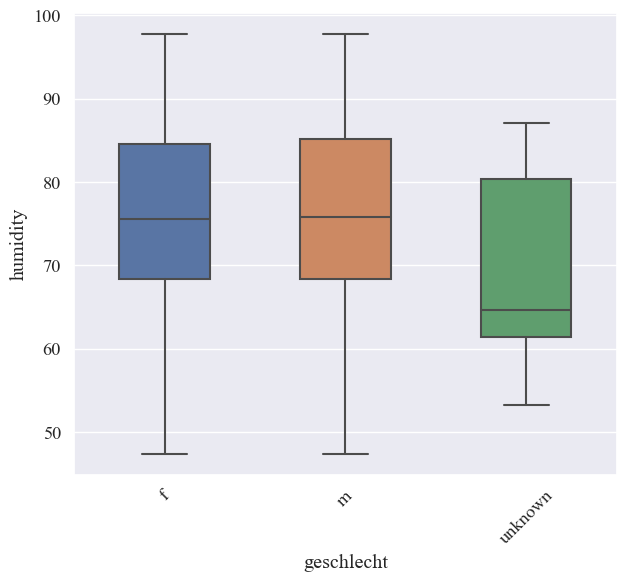

raucher
False      75.6
True       75.1
unknown    64.6
Name: humidity, dtype: float64


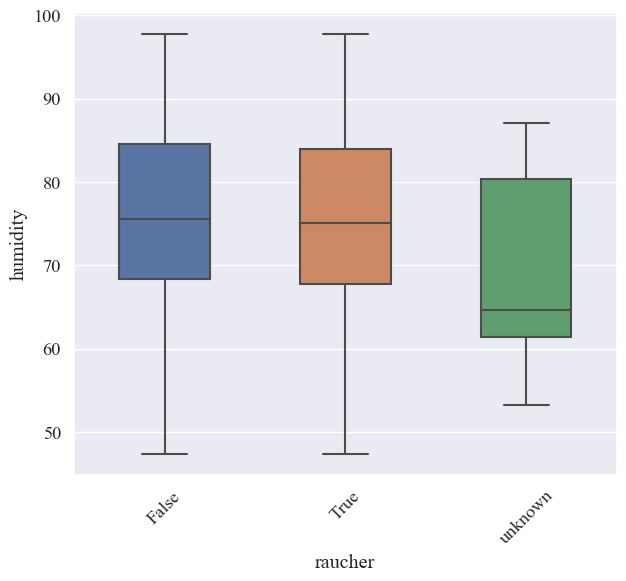

blutzucker_bekannt
False      75.6
True       75.4
unknown    64.6
Name: humidity, dtype: float64


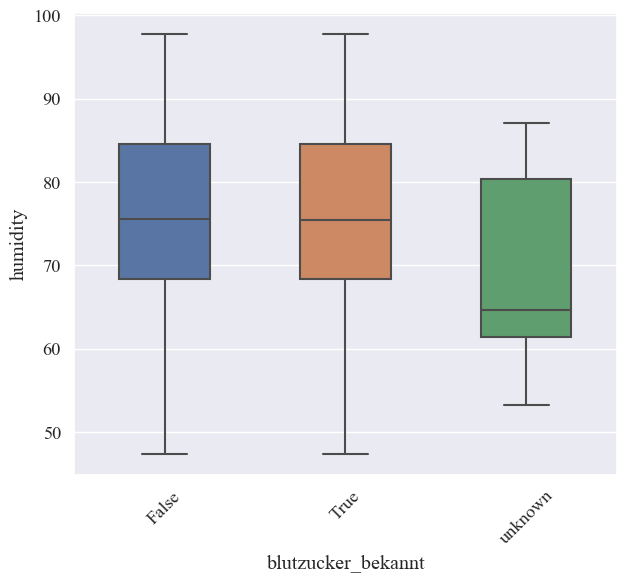

cholesterin_bekannt
False      75.8
True       75.1
unknown    64.6
Name: humidity, dtype: float64


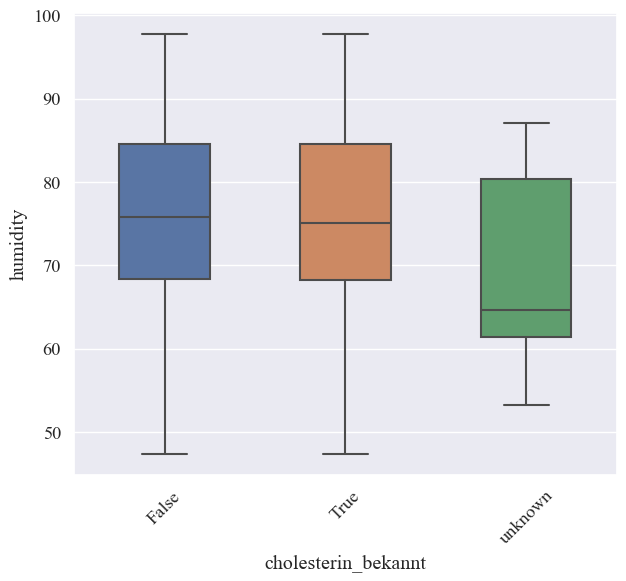

in_behandlung
False      75.6
True       75.0
unknown    64.6
Name: humidity, dtype: float64


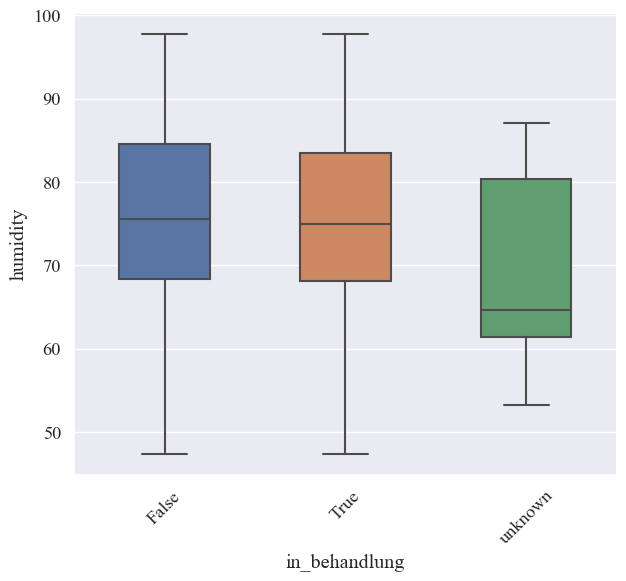

terminal
3a     9.0
3b    11.1
Name: temp_min, dtype: float64


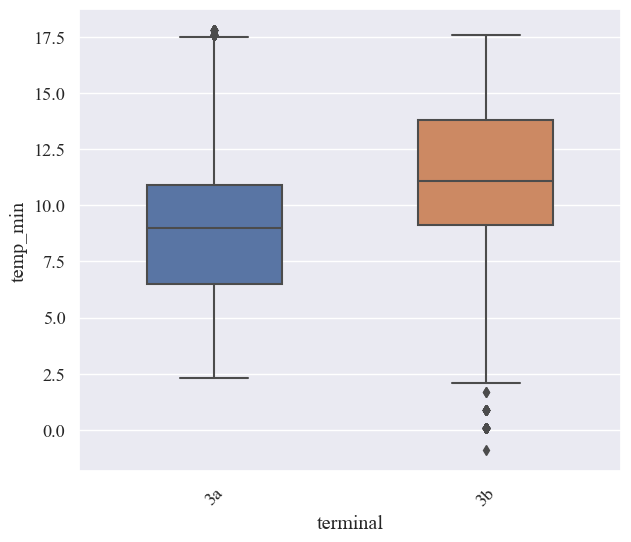

bundesland
Burgenland          11.10
Kärnten             10.10
Niederösterreich    10.50
Oberösterreich      10.90
Salzburg            11.05
Steiermark          10.30
Tirol               12.00
Vorarlberg          10.25
Wien                10.80
not_applicable      10.00
Name: temp_min, dtype: float64


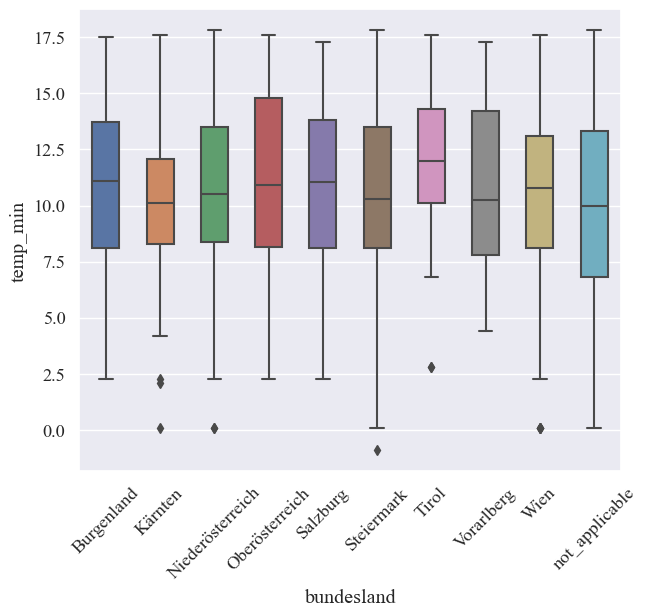

befinden
1          10.6
2          10.3
3          10.3
4          10.3
5           9.1
unknown     6.8
Name: temp_min, dtype: float64


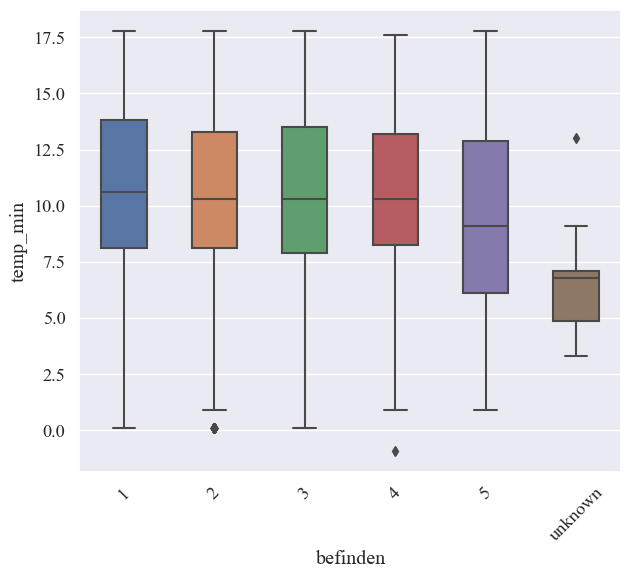

geschlecht
f          10.3
m          10.3
unknown     6.8
Name: temp_min, dtype: float64


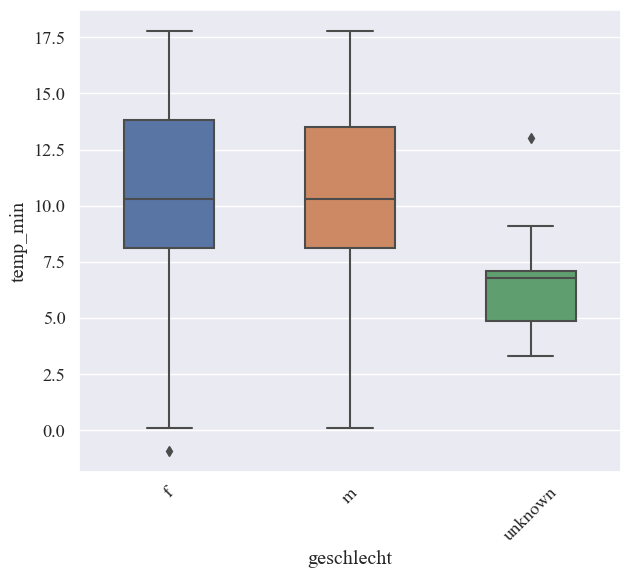

raucher
False      10.3
True       10.1
unknown     6.8
Name: temp_min, dtype: float64


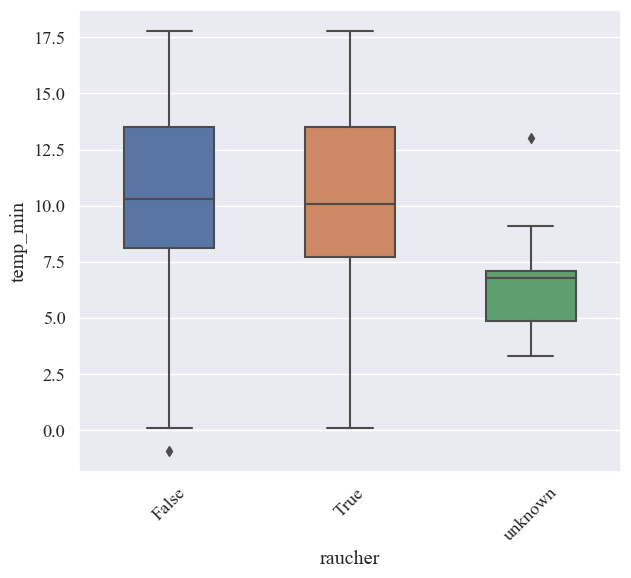

blutzucker_bekannt
False      10.3
True       10.3
unknown     6.8
Name: temp_min, dtype: float64


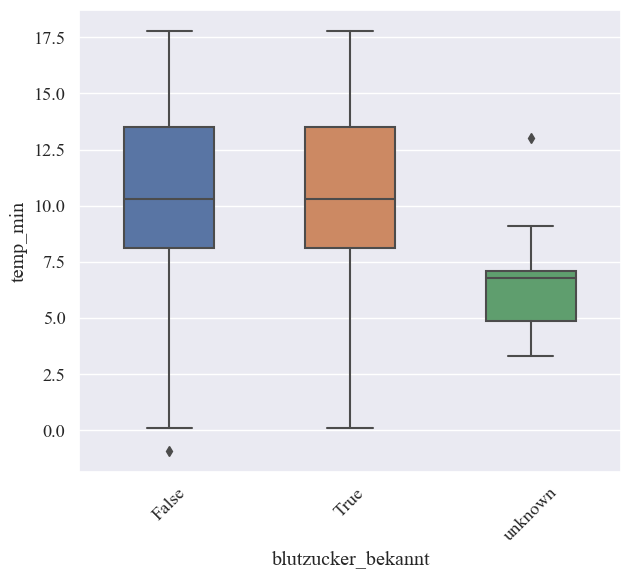

cholesterin_bekannt
False      10.3
True       10.3
unknown     6.8
Name: temp_min, dtype: float64


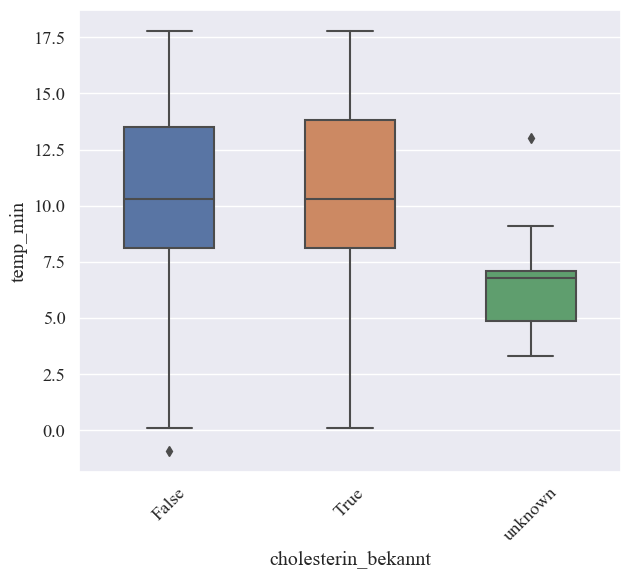

in_behandlung
False      10.3
True       10.5
unknown     6.8
Name: temp_min, dtype: float64


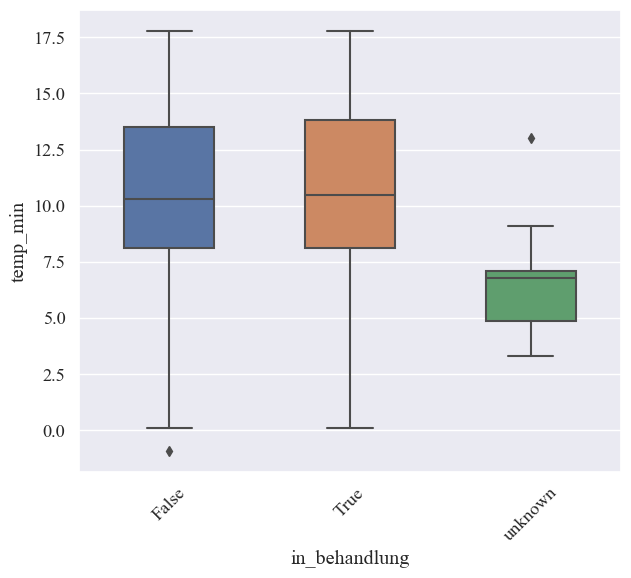

terminal
3a    21.1
3b    23.1
Name: temp_max, dtype: float64


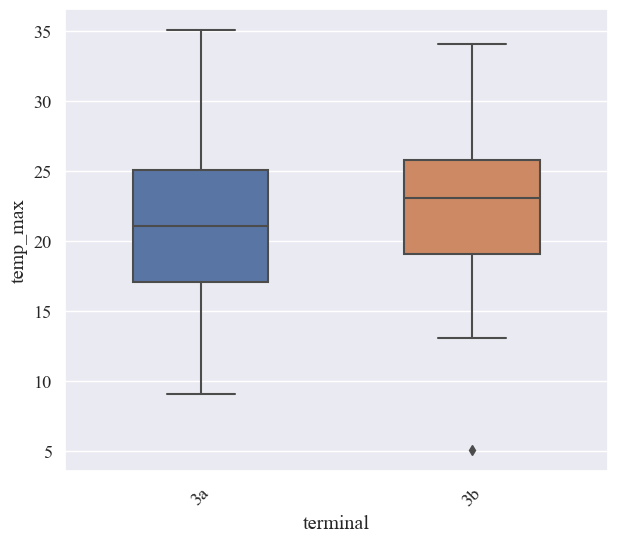

bundesland
Burgenland          22.1
Kärnten             23.1
Niederösterreich    23.1
Oberösterreich      23.1
Salzburg            23.1
Steiermark          22.1
Tirol               25.1
Vorarlberg          20.8
Wien                22.1
not_applicable      21.1
Name: temp_max, dtype: float64


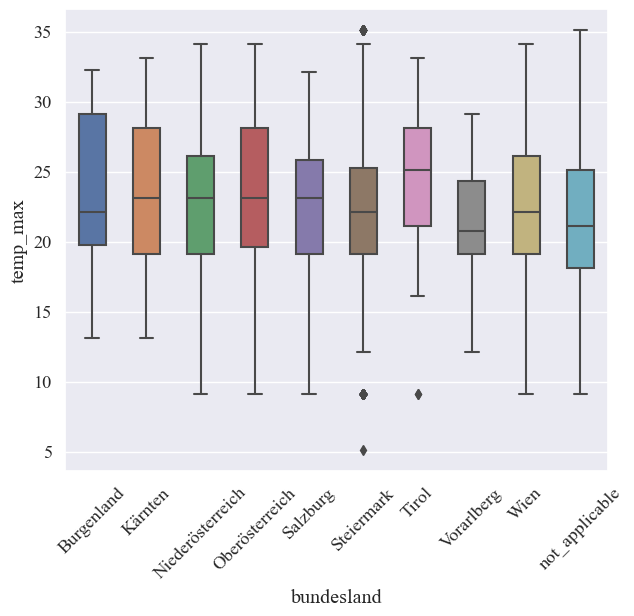

befinden
1          22.1
2          22.1
3          22.1
4          23.1
5          21.1
unknown    16.1
Name: temp_max, dtype: float64


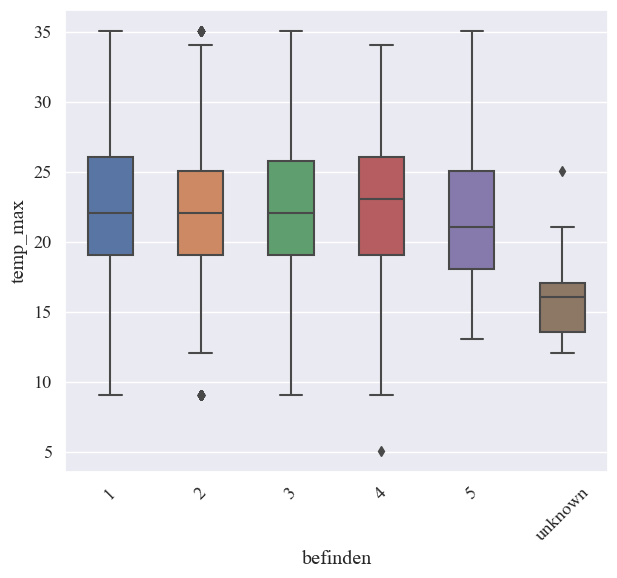

geschlecht
f          22.1
m          22.1
unknown    16.1
Name: temp_max, dtype: float64


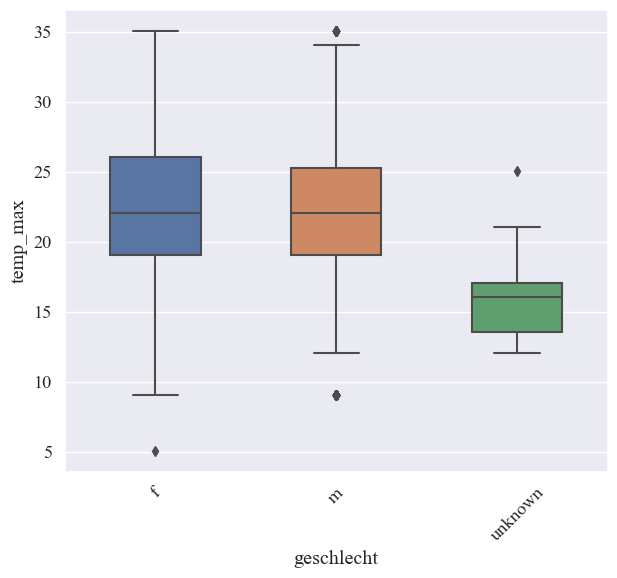

raucher
False      22.1
True       22.1
unknown    16.1
Name: temp_max, dtype: float64


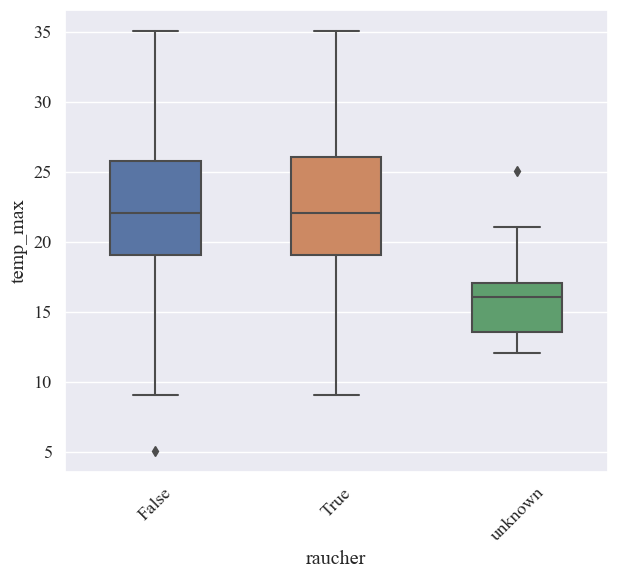

blutzucker_bekannt
False      22.1
True       22.1
unknown    16.1
Name: temp_max, dtype: float64


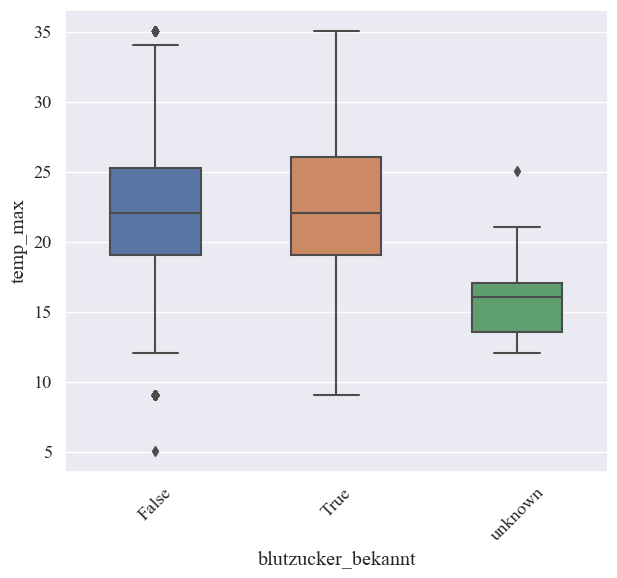

cholesterin_bekannt
False      22.1
True       22.1
unknown    16.1
Name: temp_max, dtype: float64


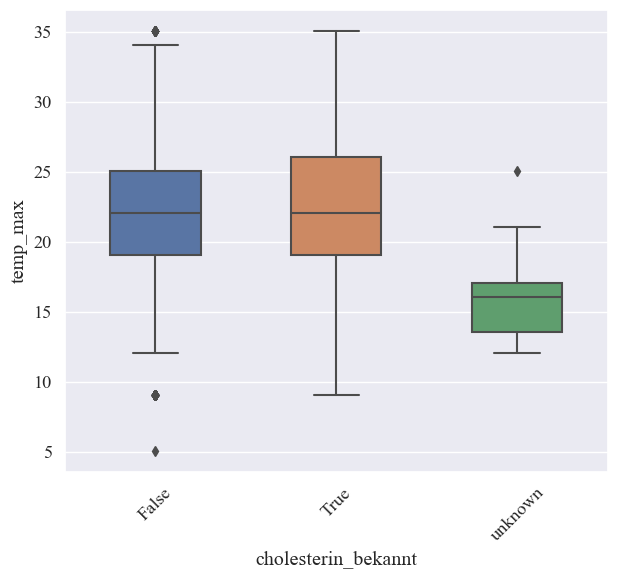

in_behandlung
False      22.1
True       22.1
unknown    16.1
Name: temp_max, dtype: float64


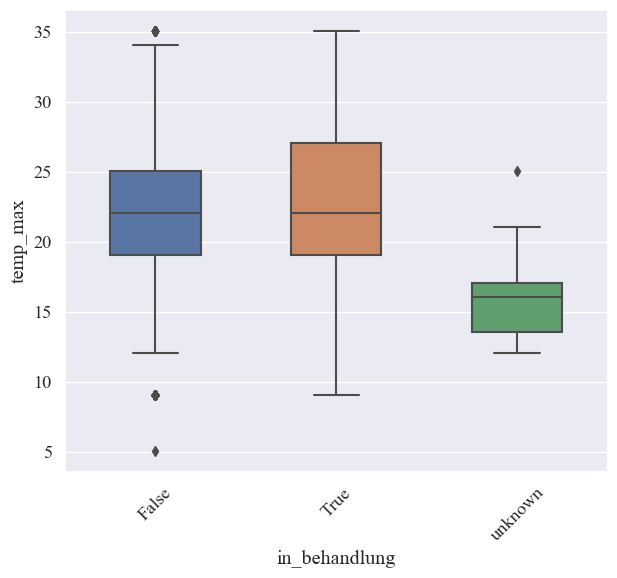

In [36]:
num_cols = [
 'schaetzwert_bp_sys',
 'schaetzwert_by_dia',
 'messwert_bp_sys',
 'messwert_bp_dia',
 'age',
 'temp',
 'humidity',
 'temp_min',
 'temp_max']

cat_cols = [
'terminal',
 'bundesland',
 'befinden',
 'geschlecht',
 'raucher',
 'blutzucker_bekannt',
 'cholesterin_bekannt',
 'in_behandlung']

def create_box_plot(data_df, main_col, group_col, stacked_barplot_dir_path):
    f, ax = plt.subplots(figsize=(7, 6))
    order = data_df.groupby(by=[group_col])[main_col].median().sort_values().index
    plot = sns.boxplot(data=data_df, x=group_col, y=main_col, width=.5, orient="v", order=order)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
    plt.show()
    plot.figure.savefig(os.path.join(stacked_barplot_dir_path, main_col + "_vs_" + group_col + "_barplot.pdf"), dpi=180)


for num in num_cols:
    for cat in cat_cols:
        create_box_plot(data_df, num, cat, stacked_barplot_dir_path)


Stacked Bar Plots

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


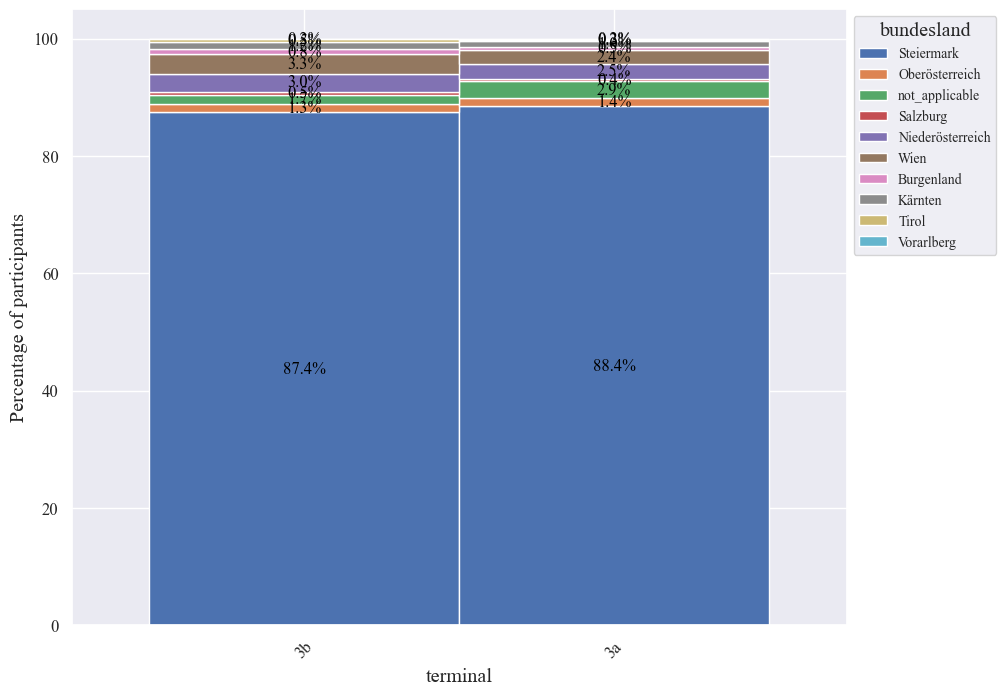

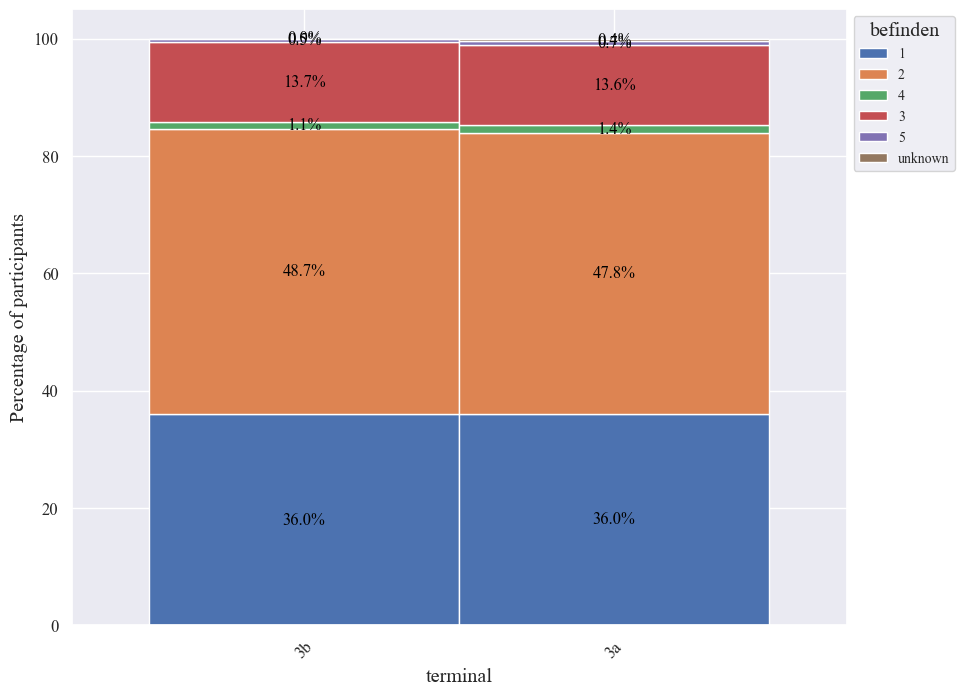

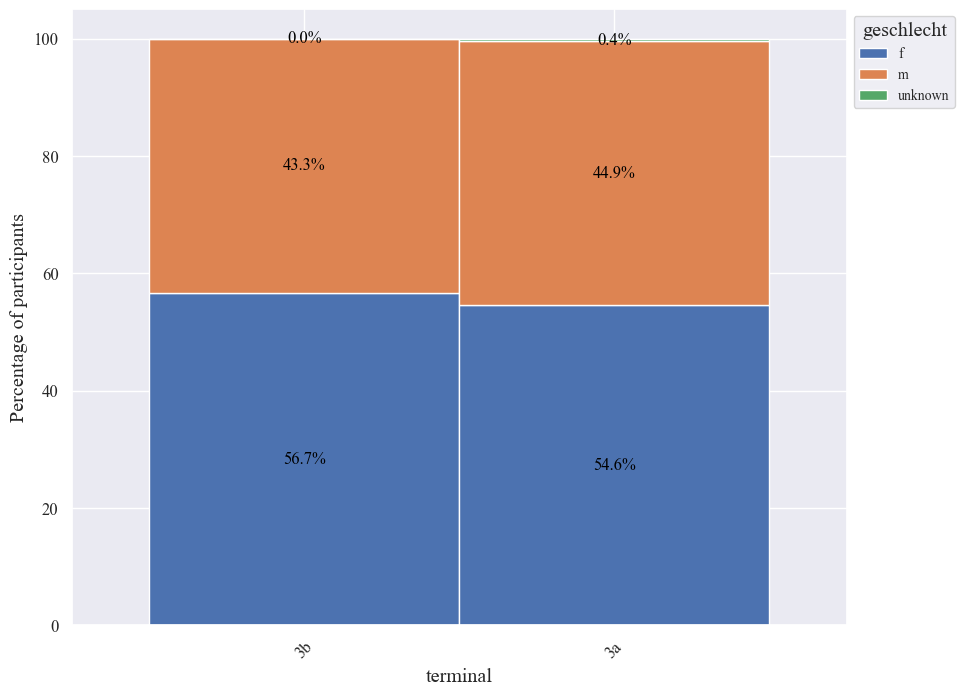

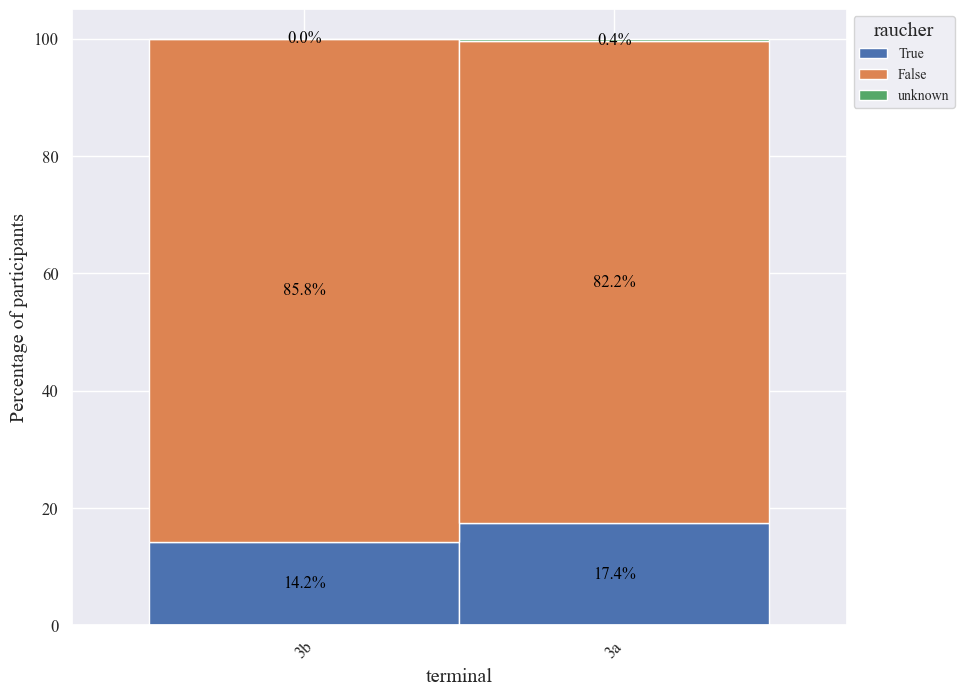

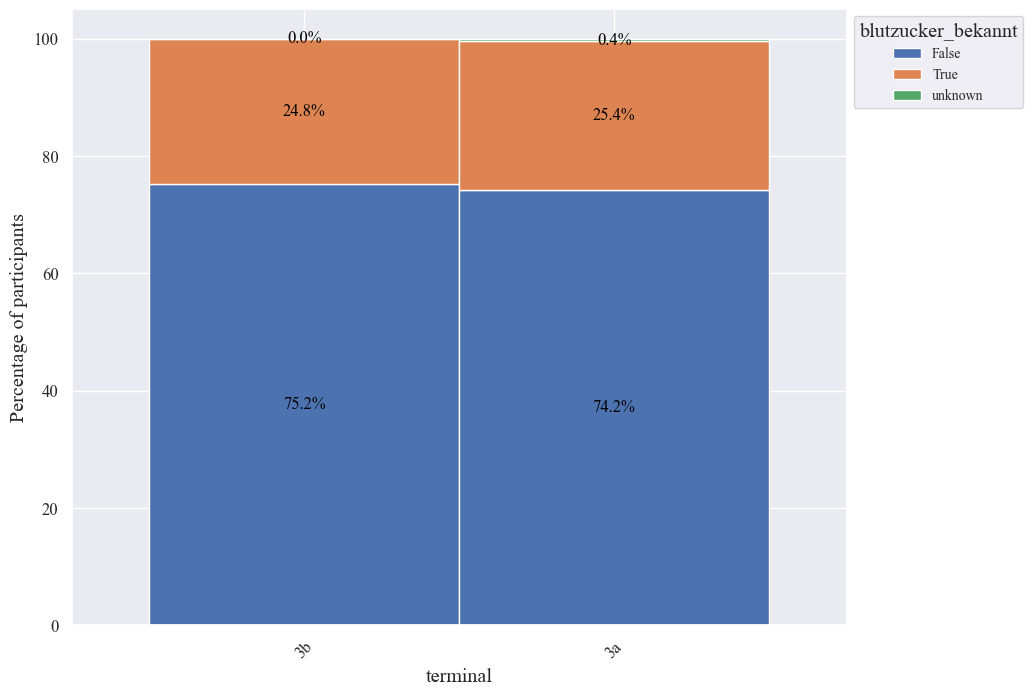

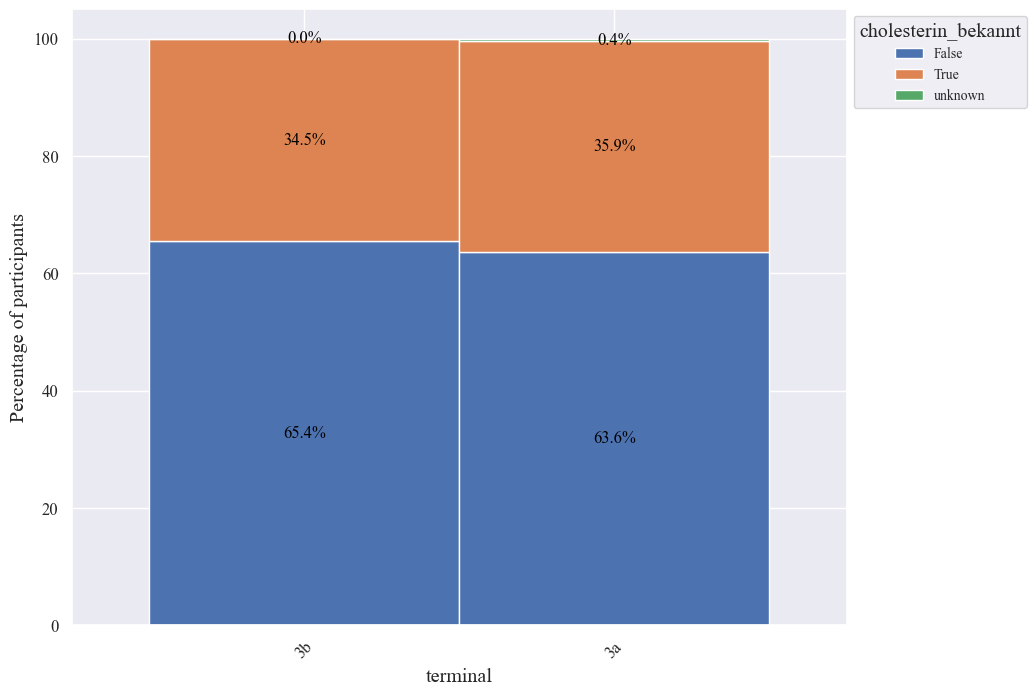

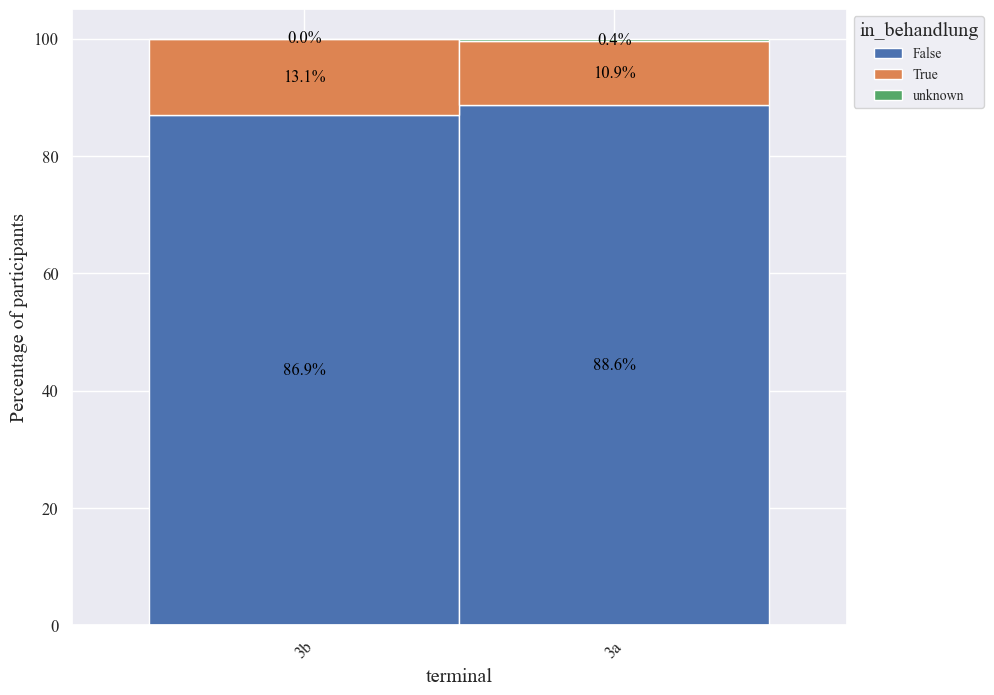

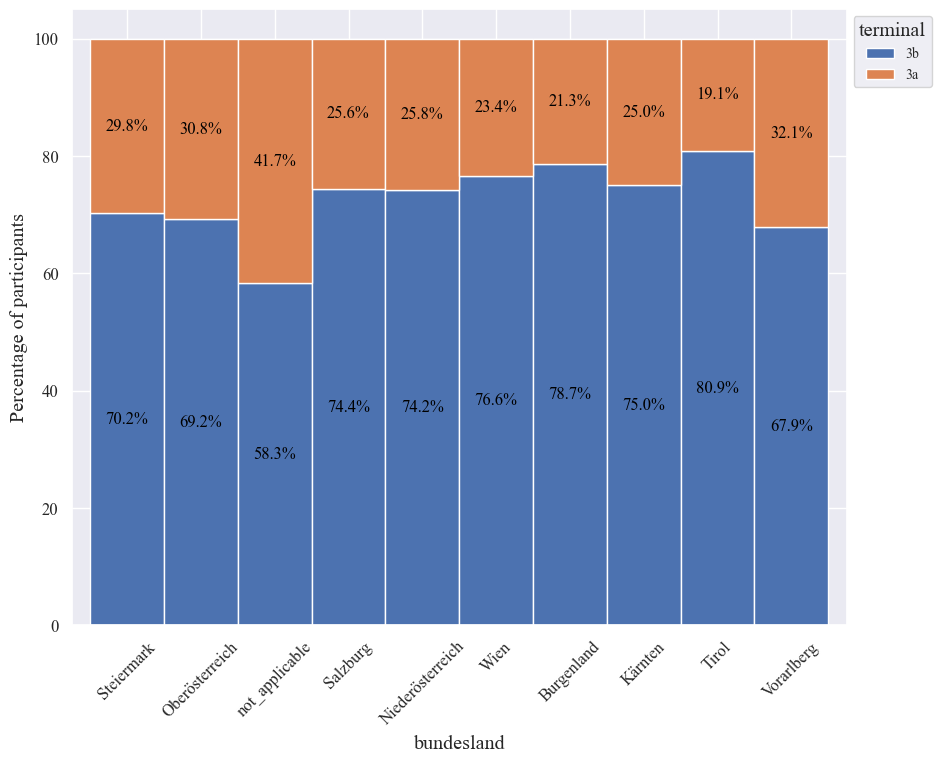

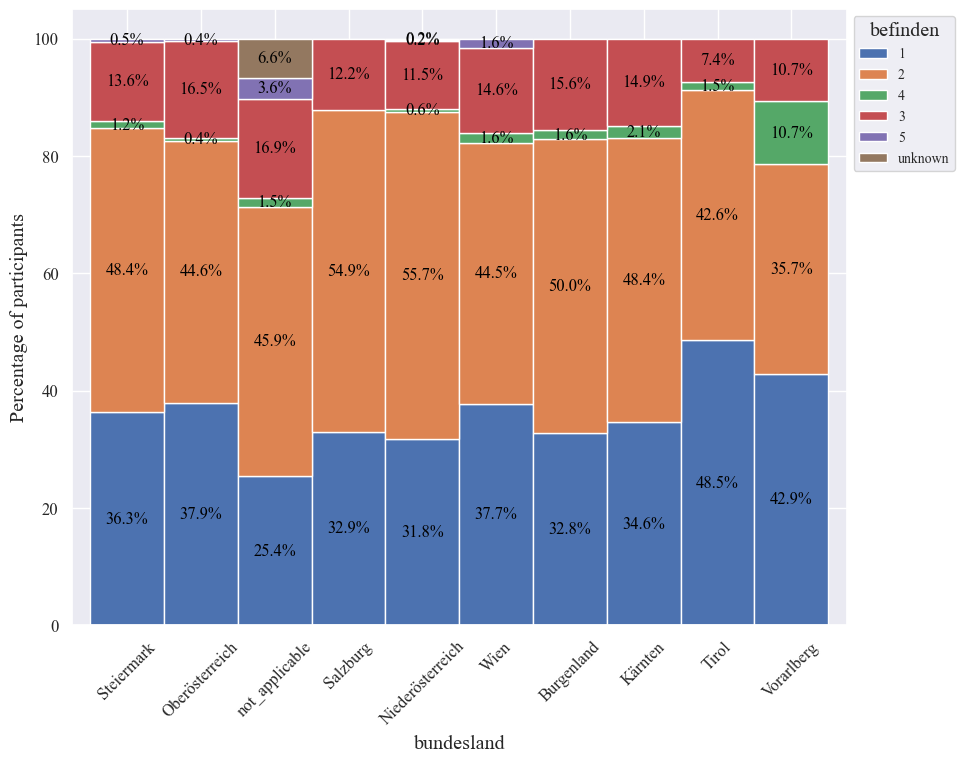

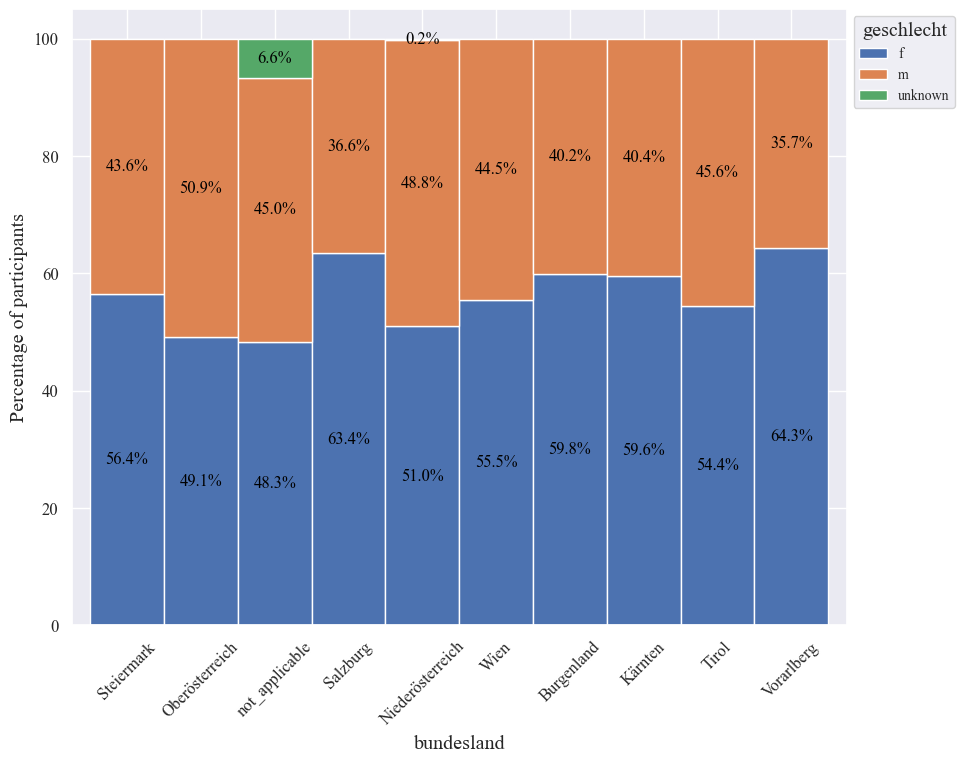

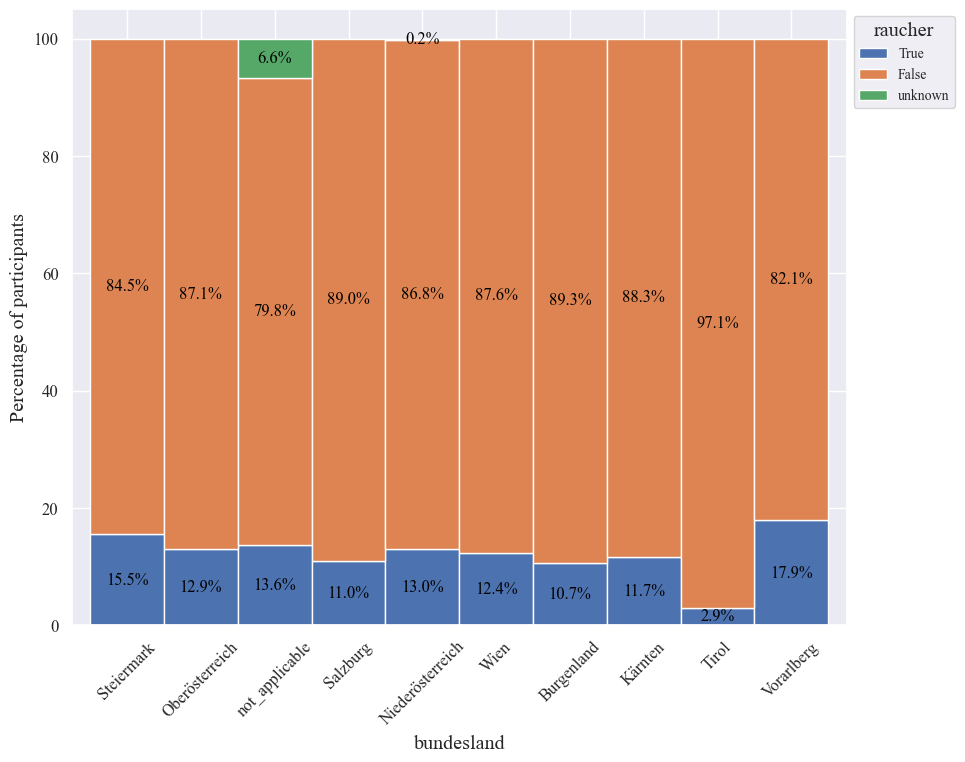

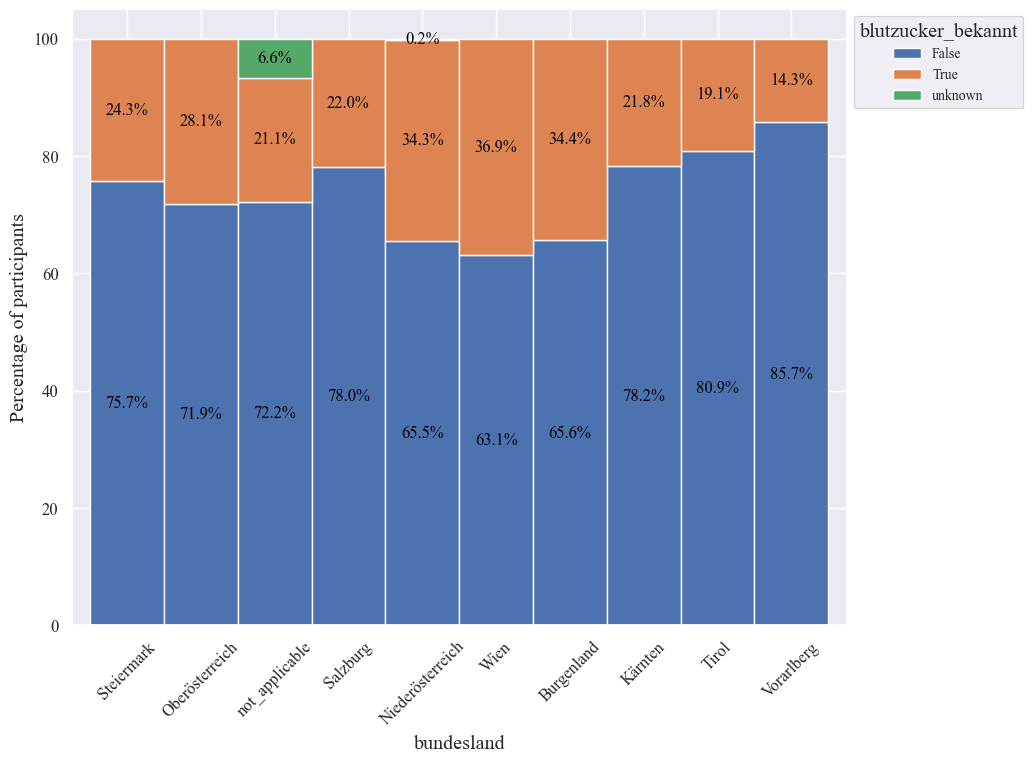

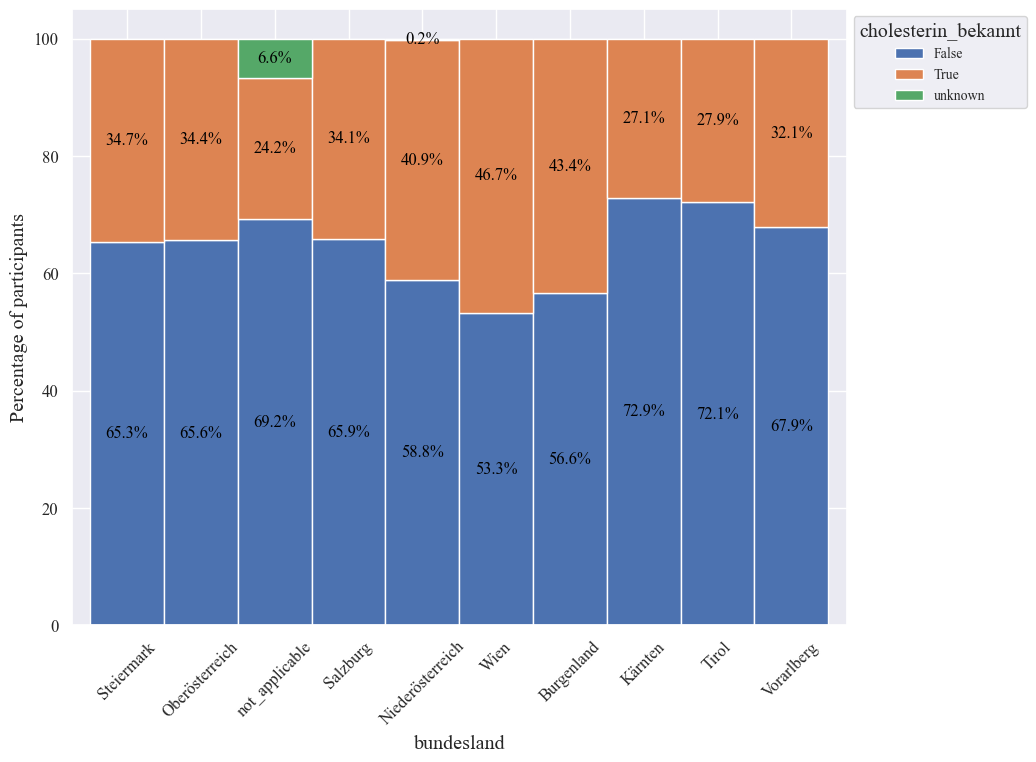

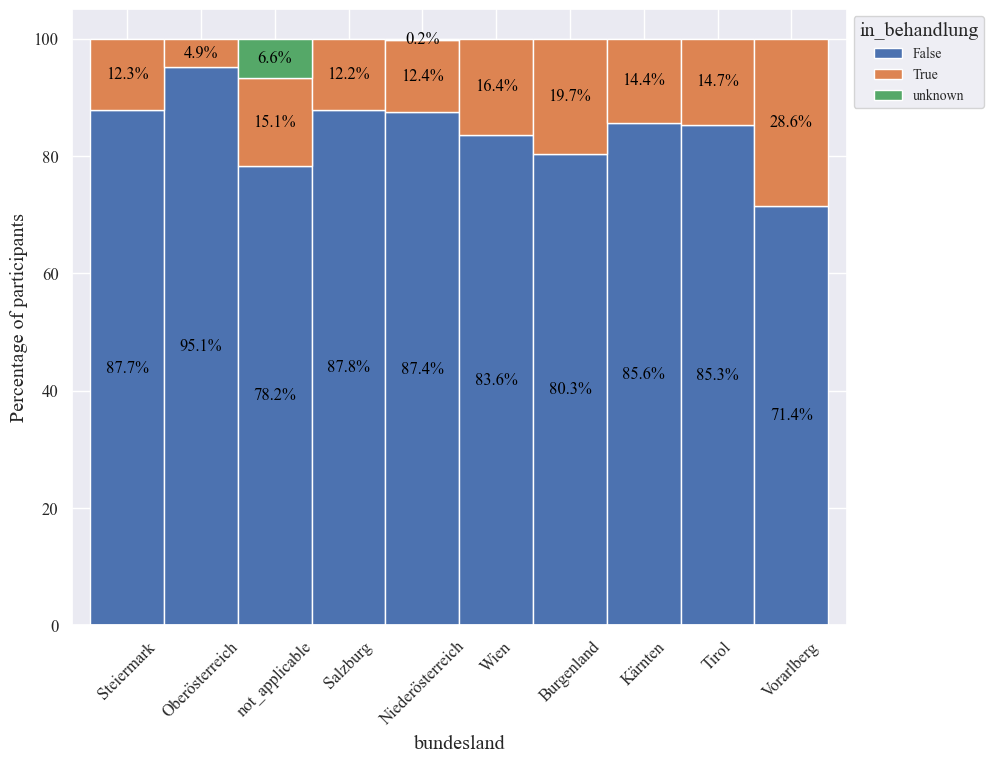

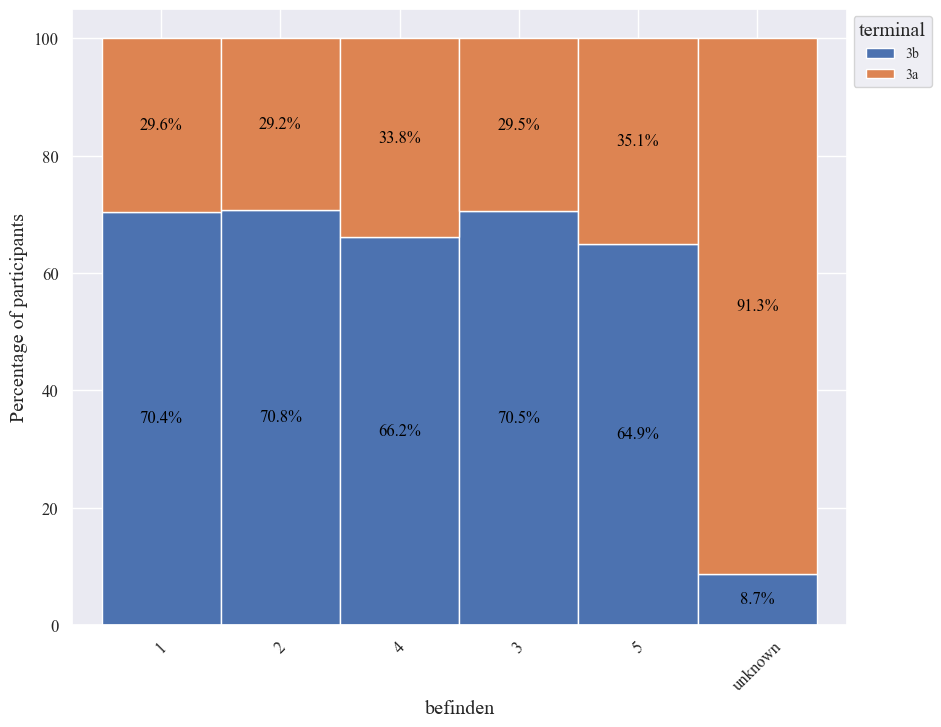

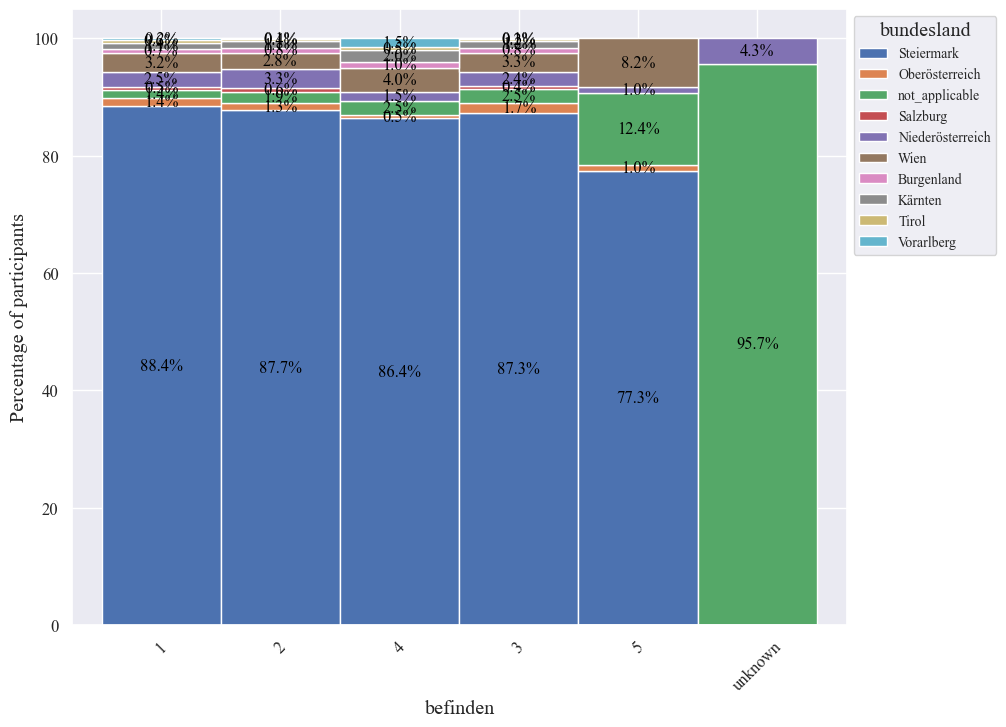

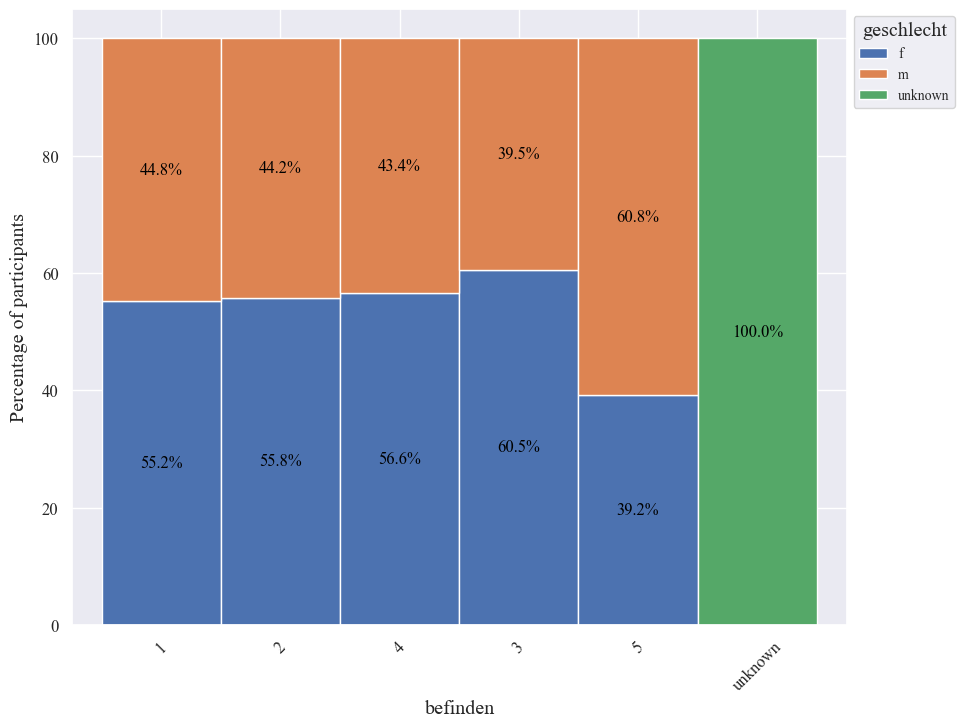

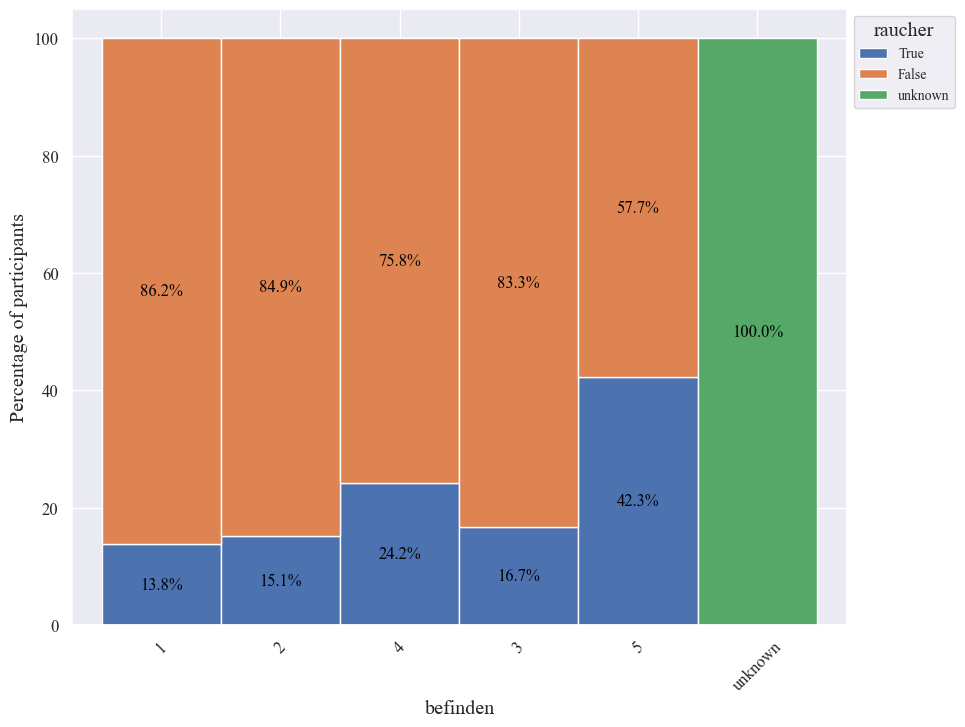

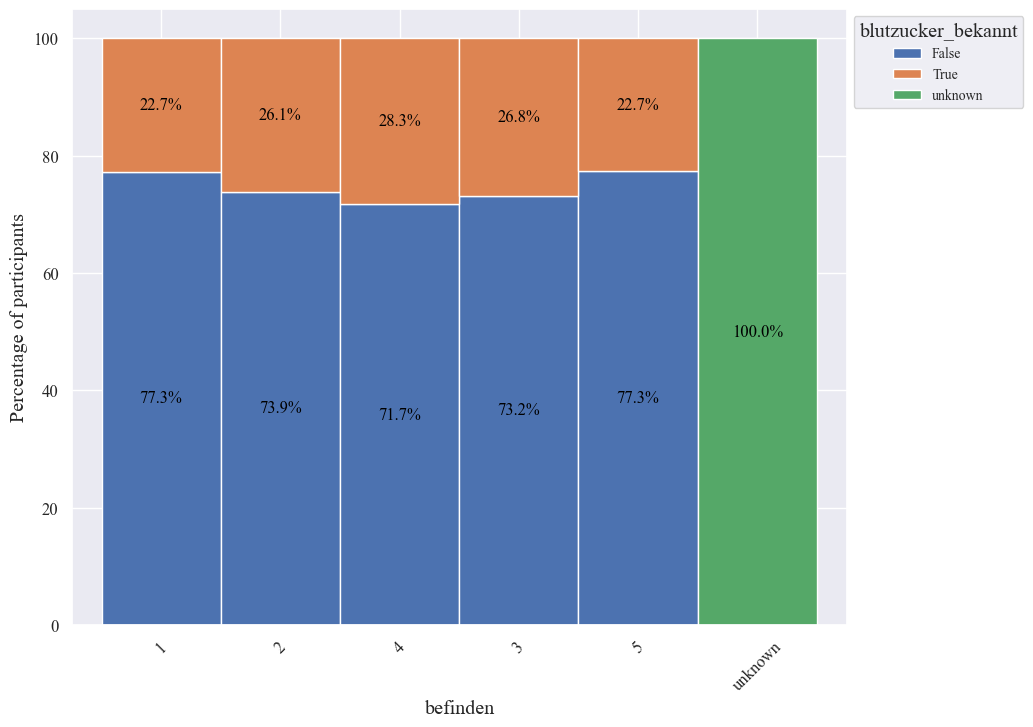

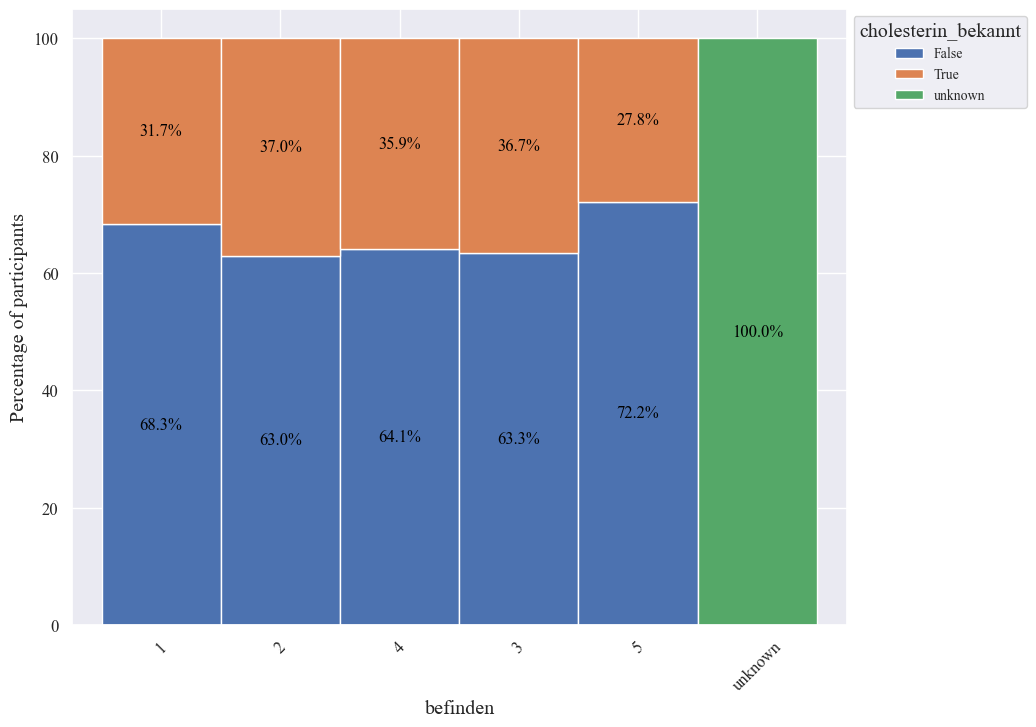

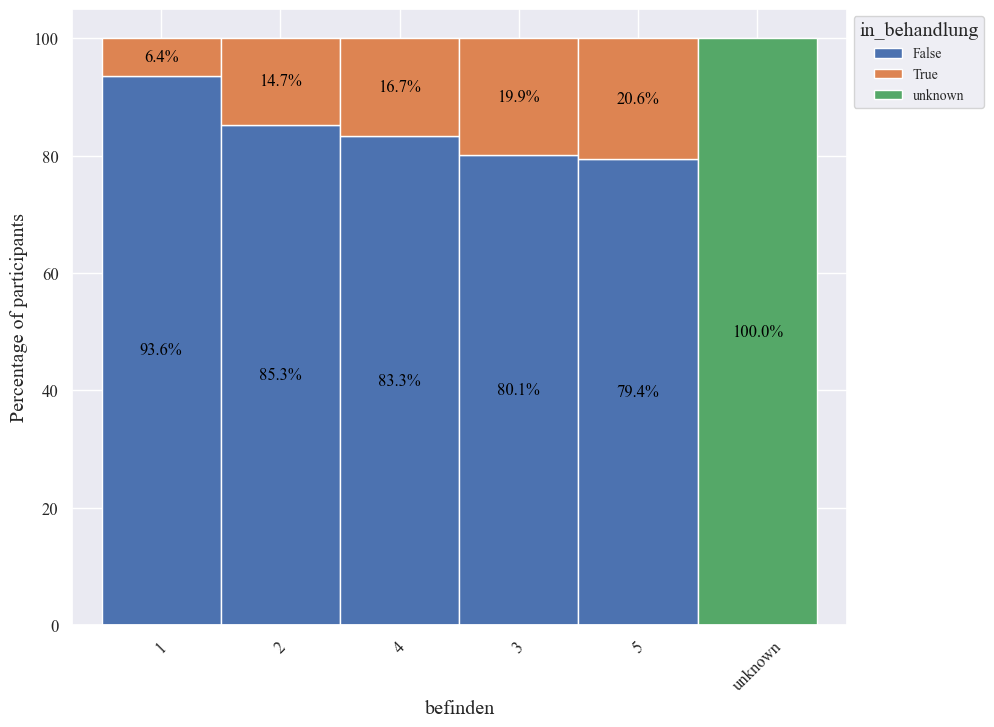

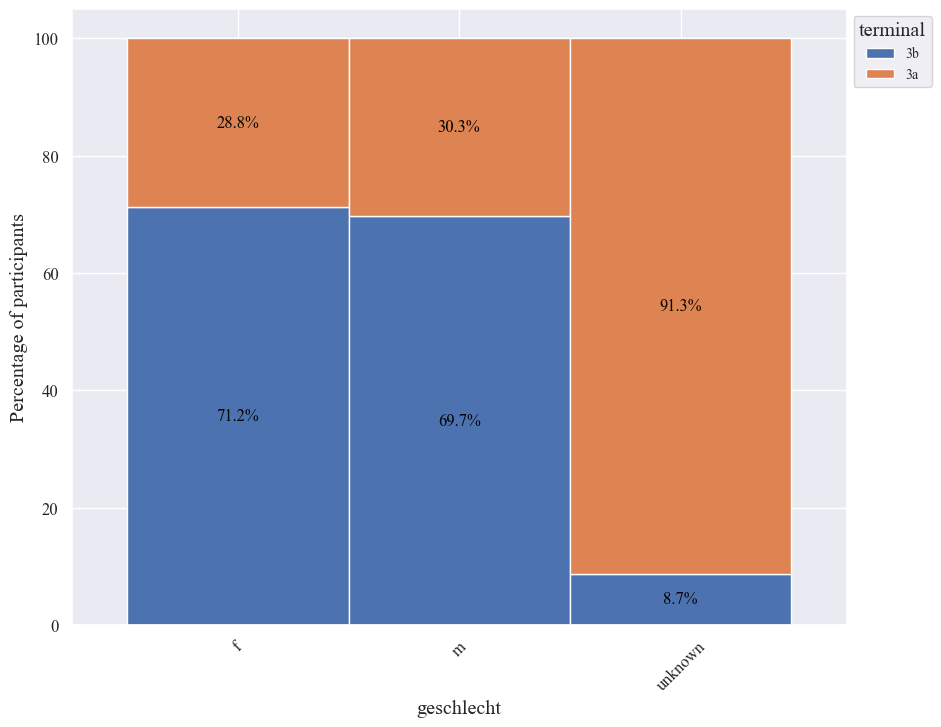

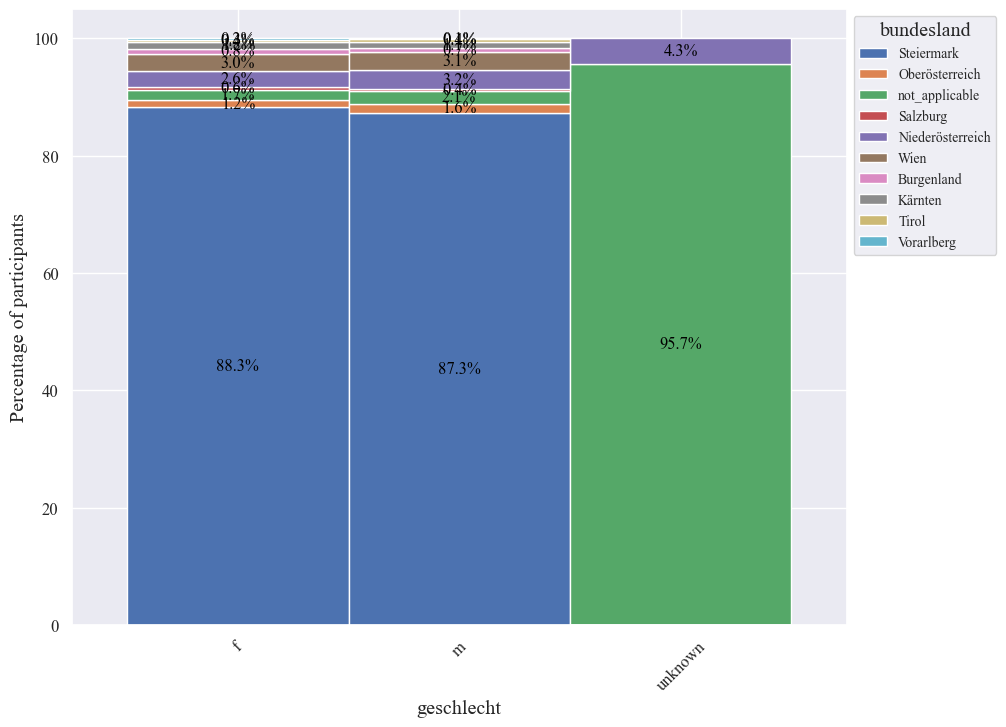

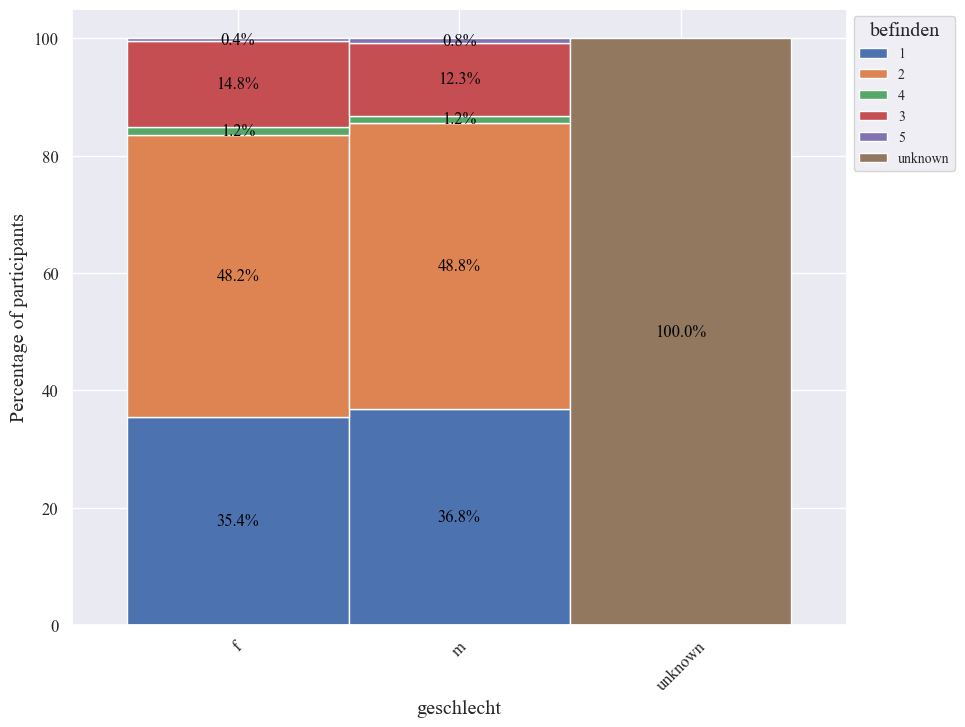

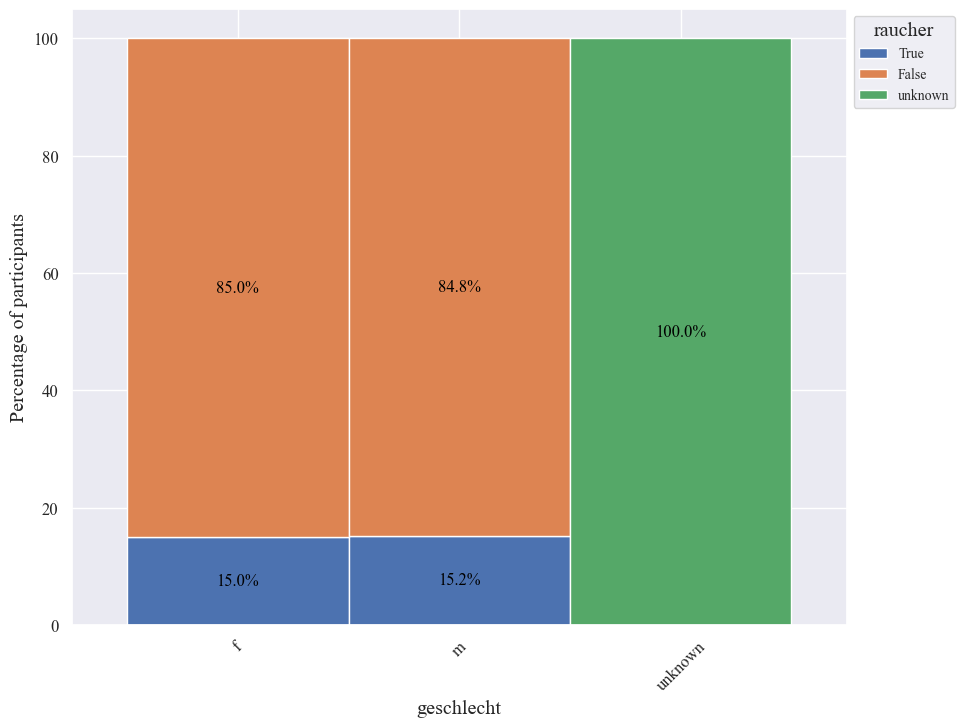

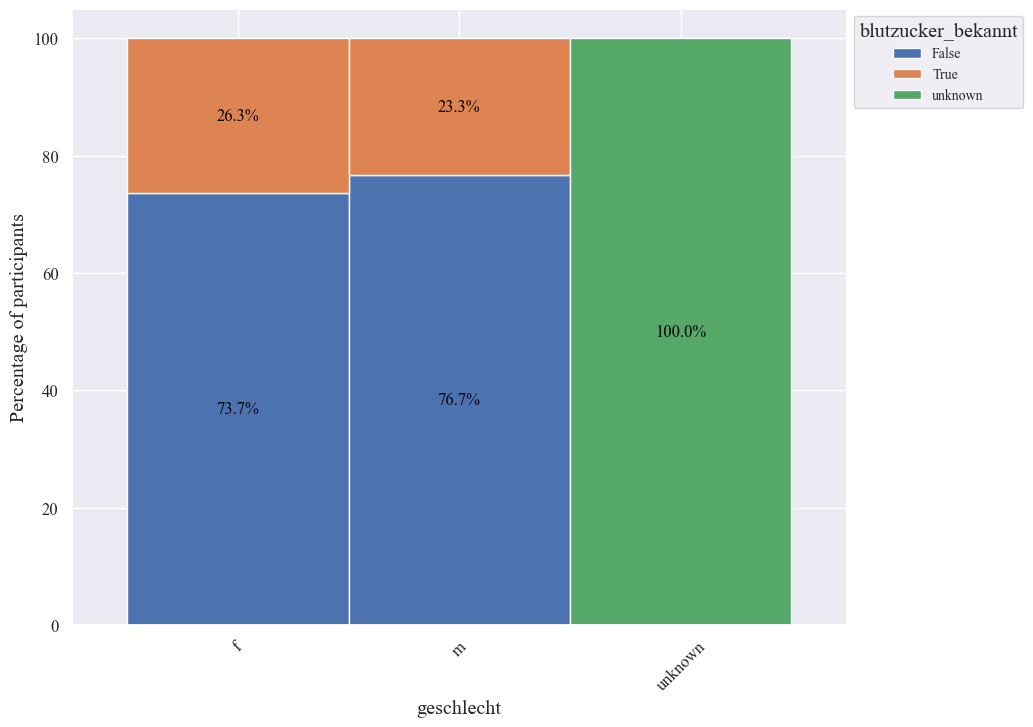

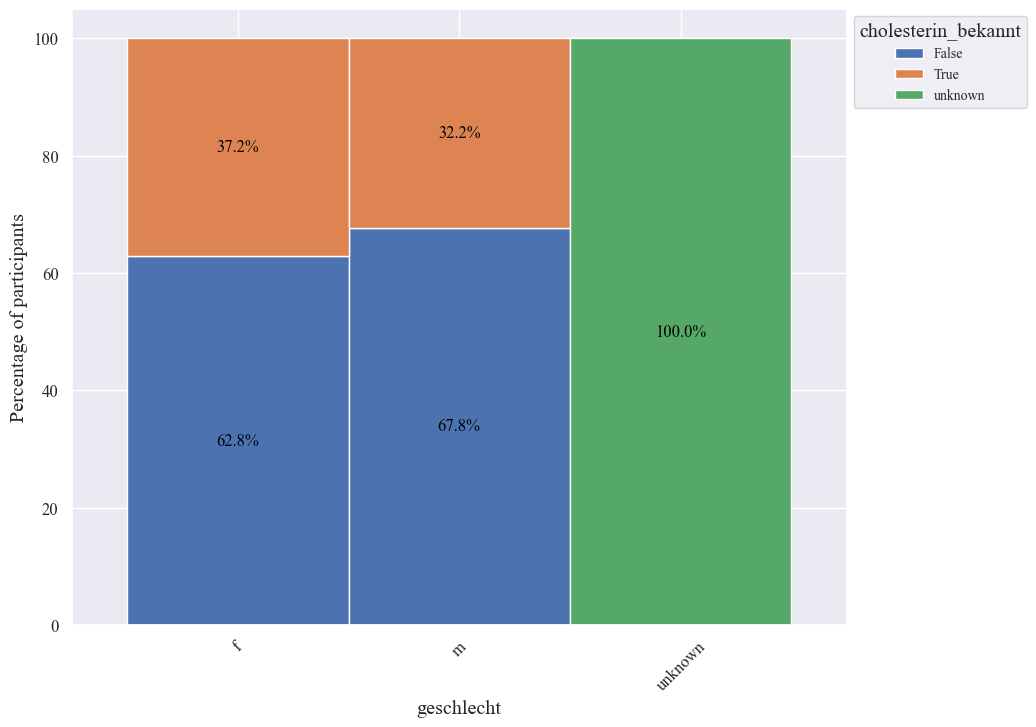

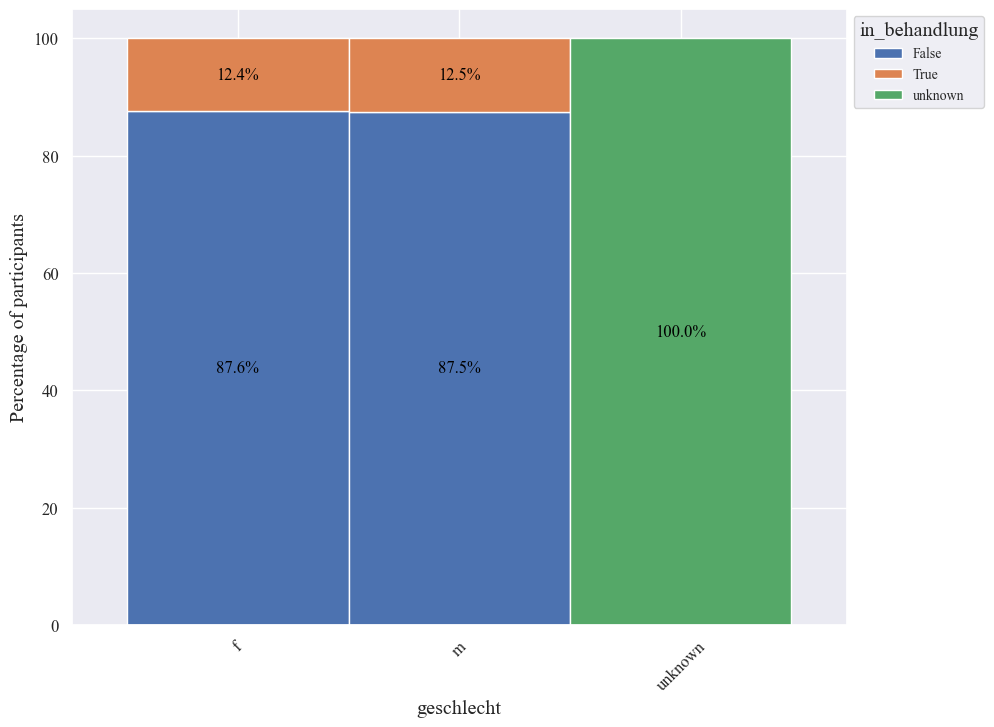

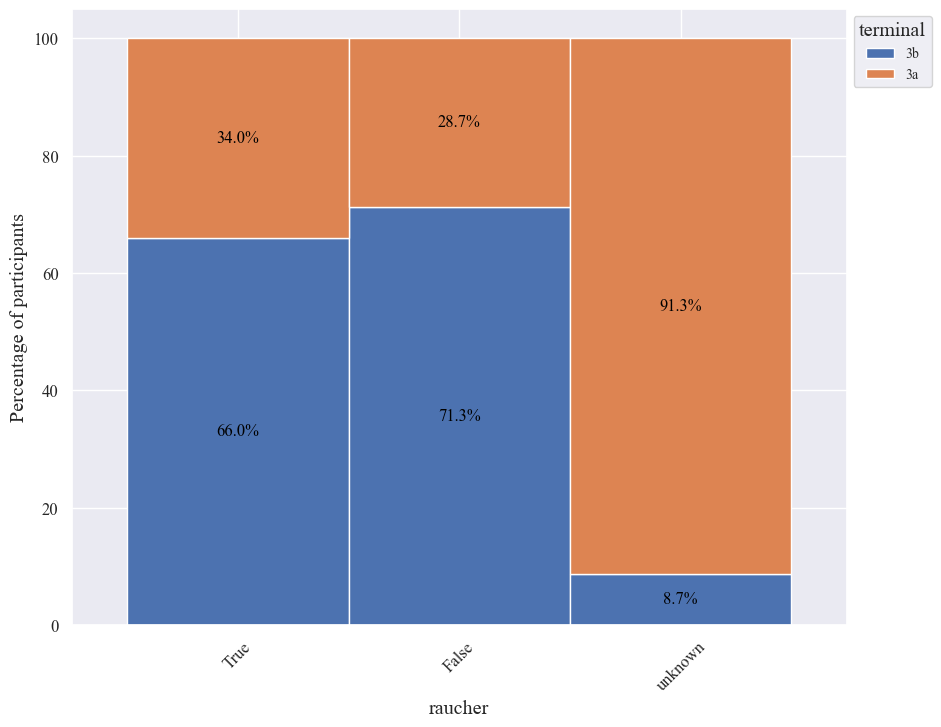

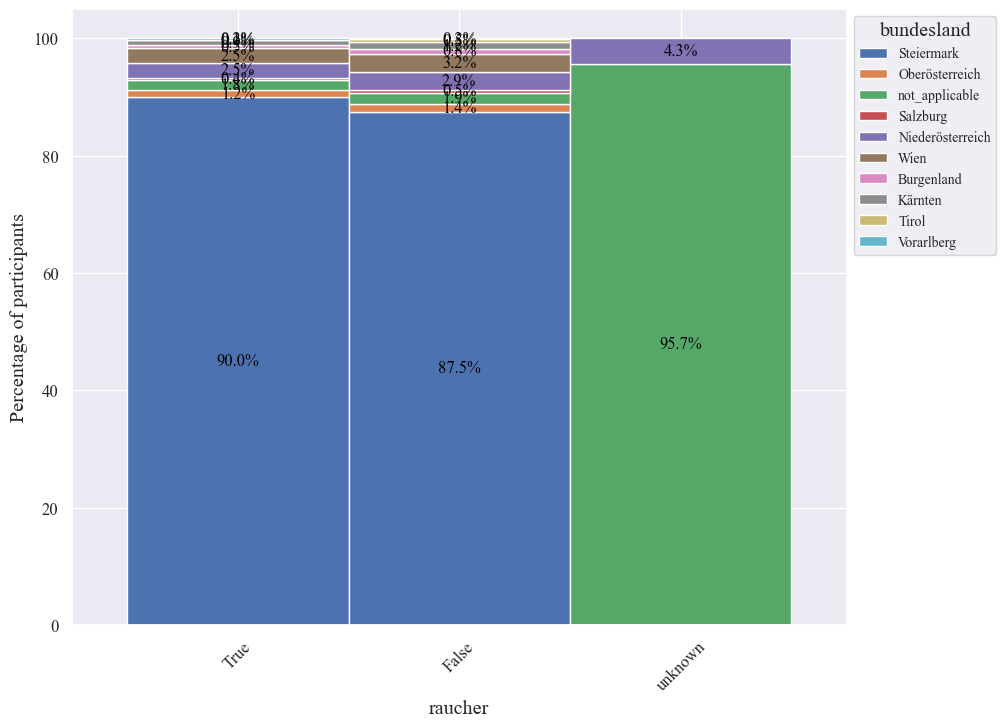

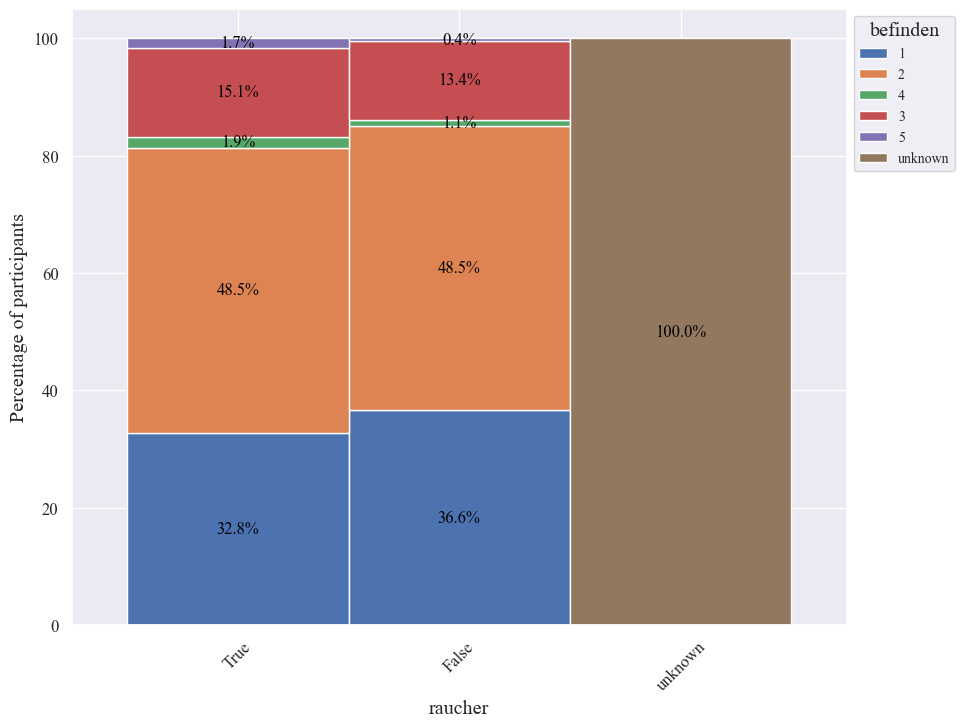

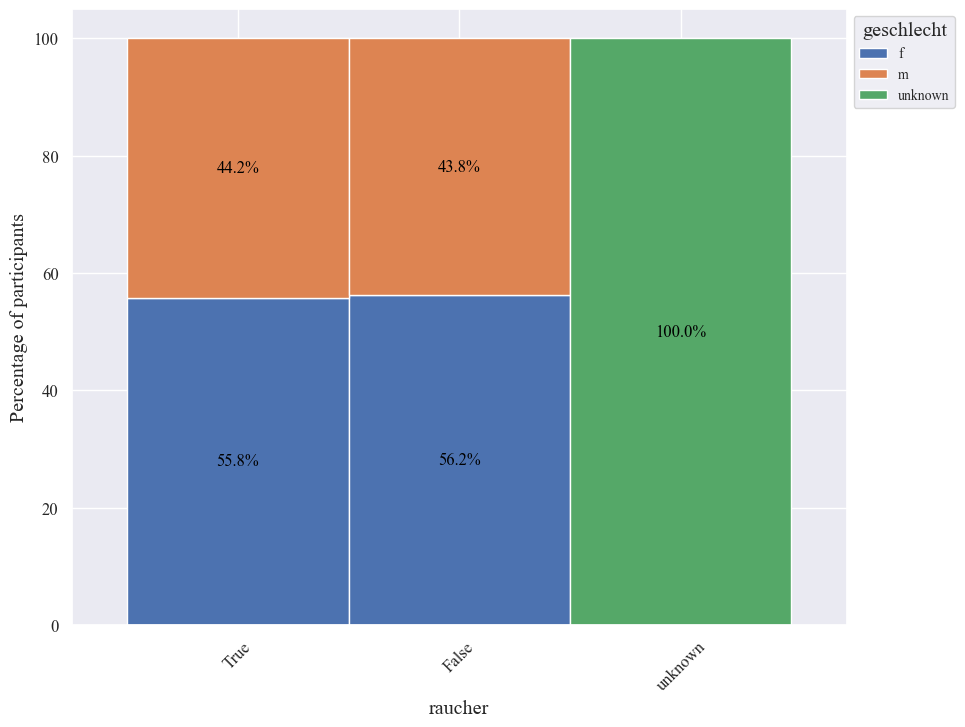

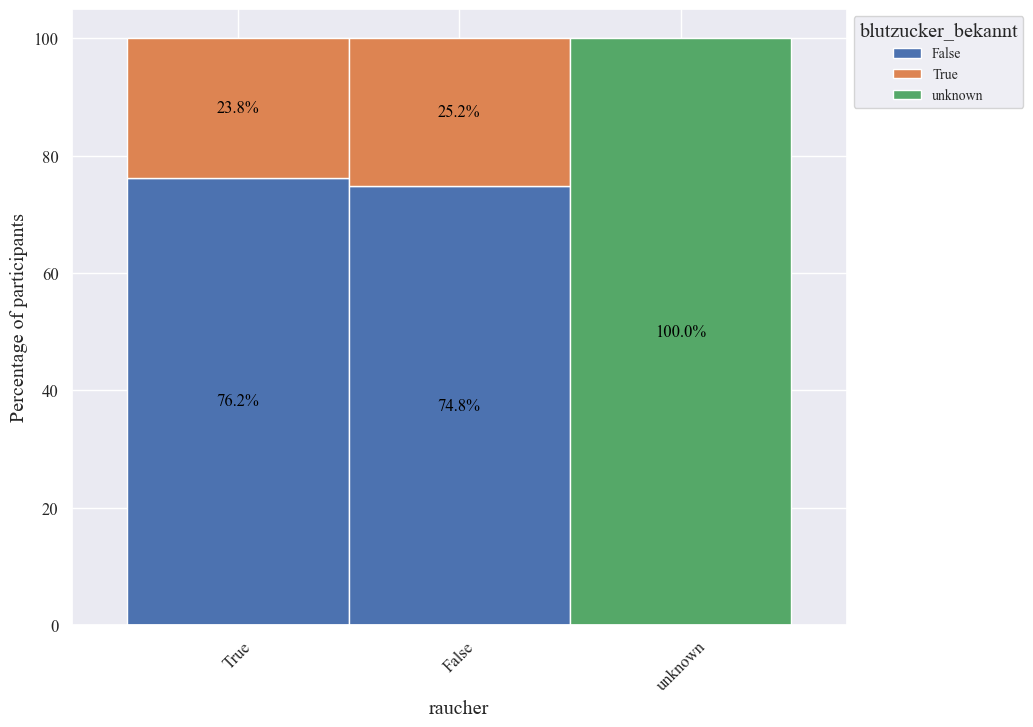

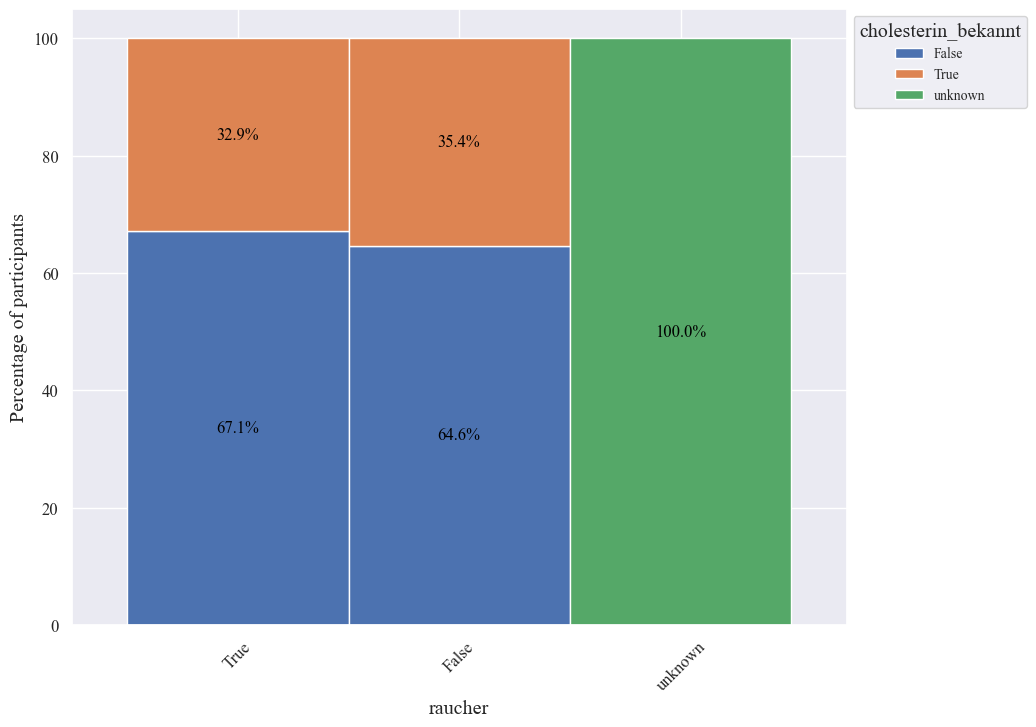

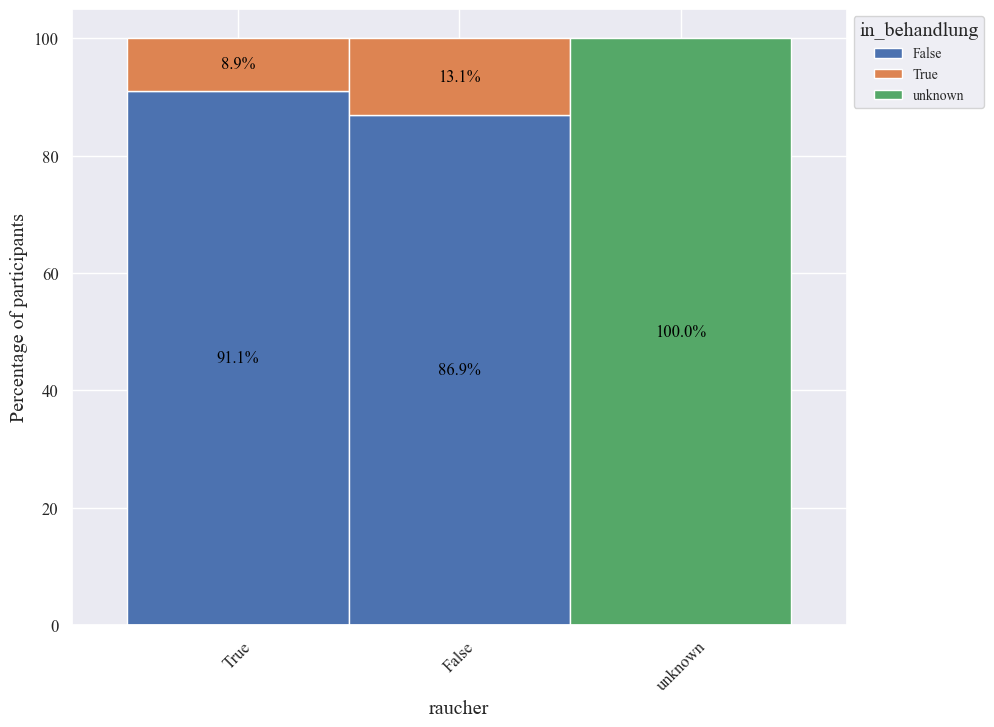

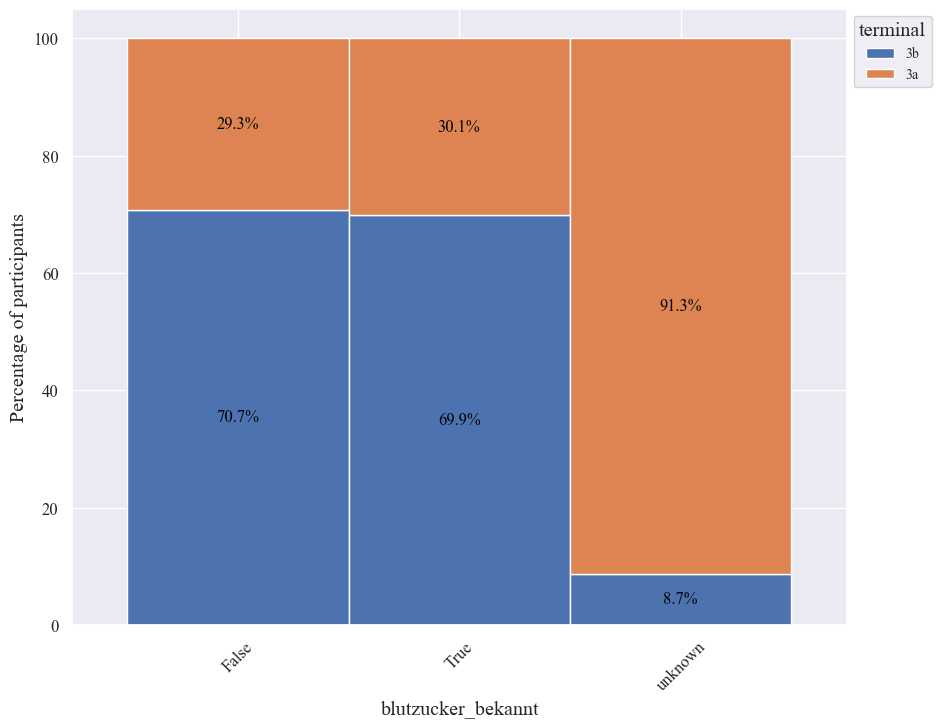

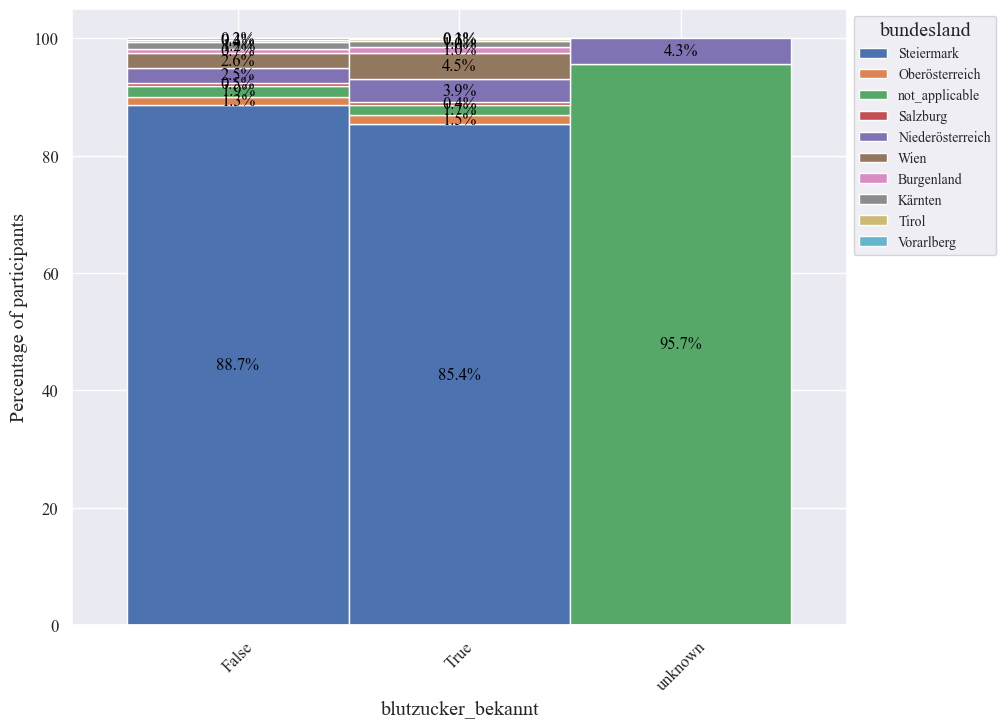

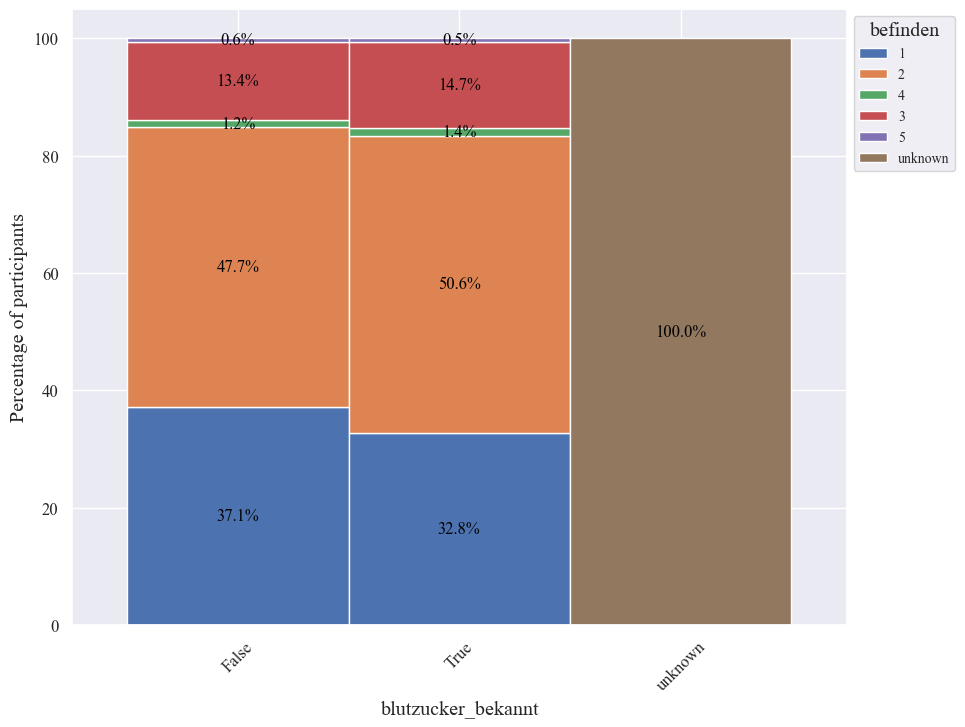

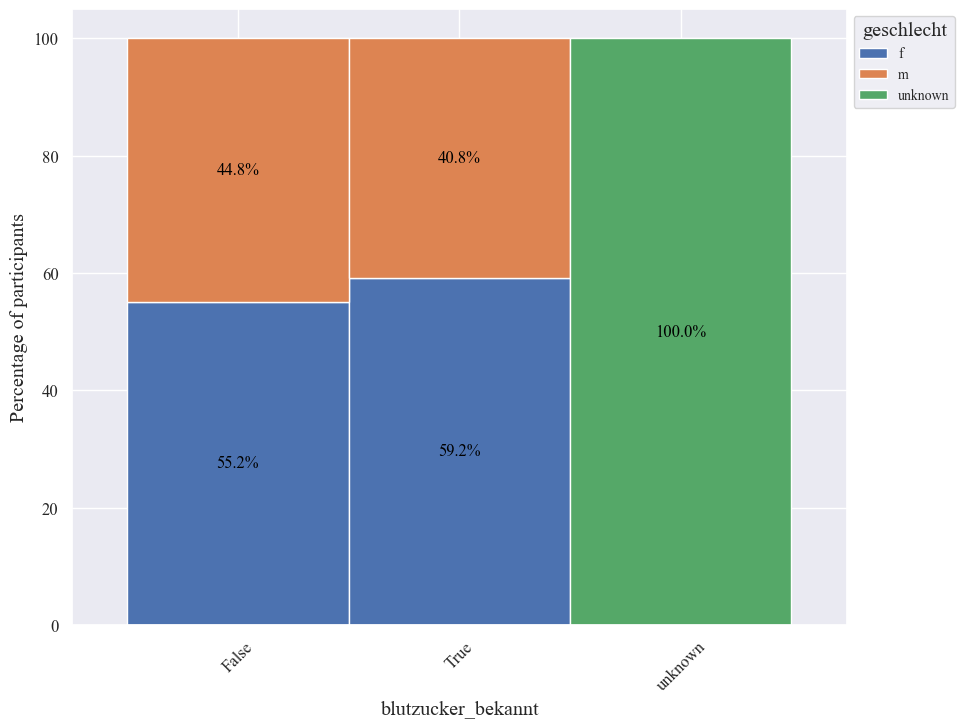

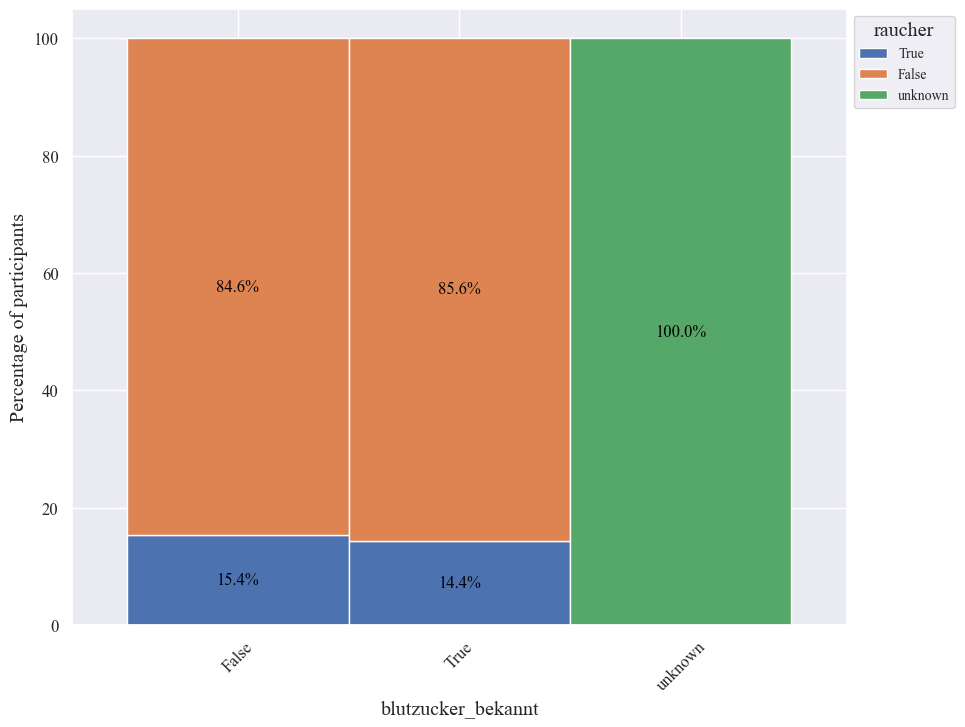

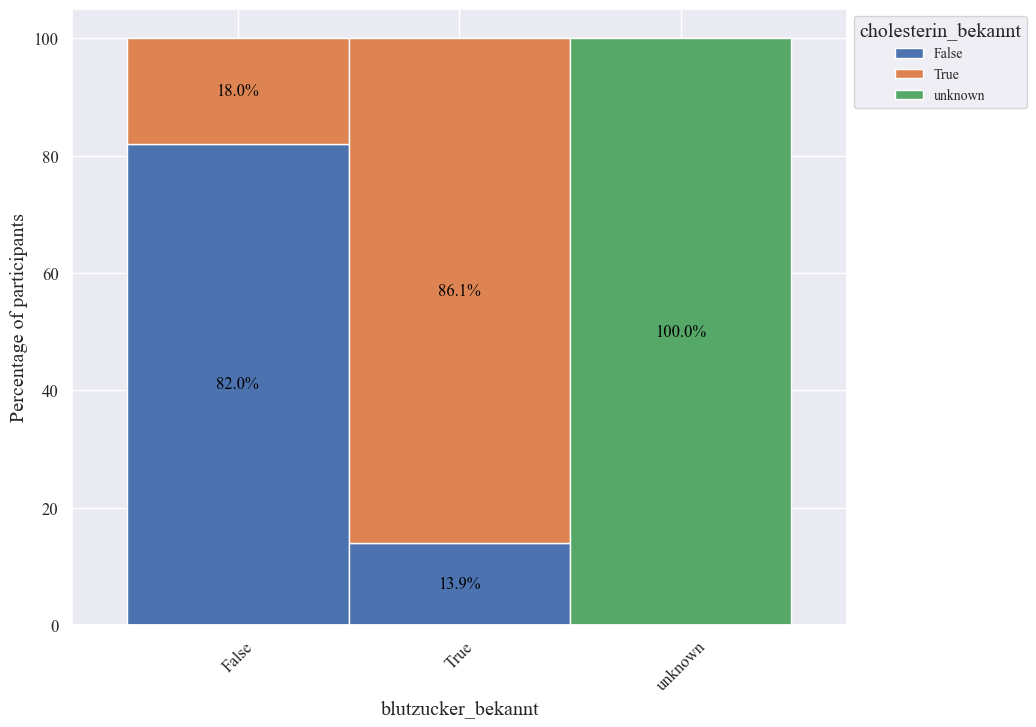

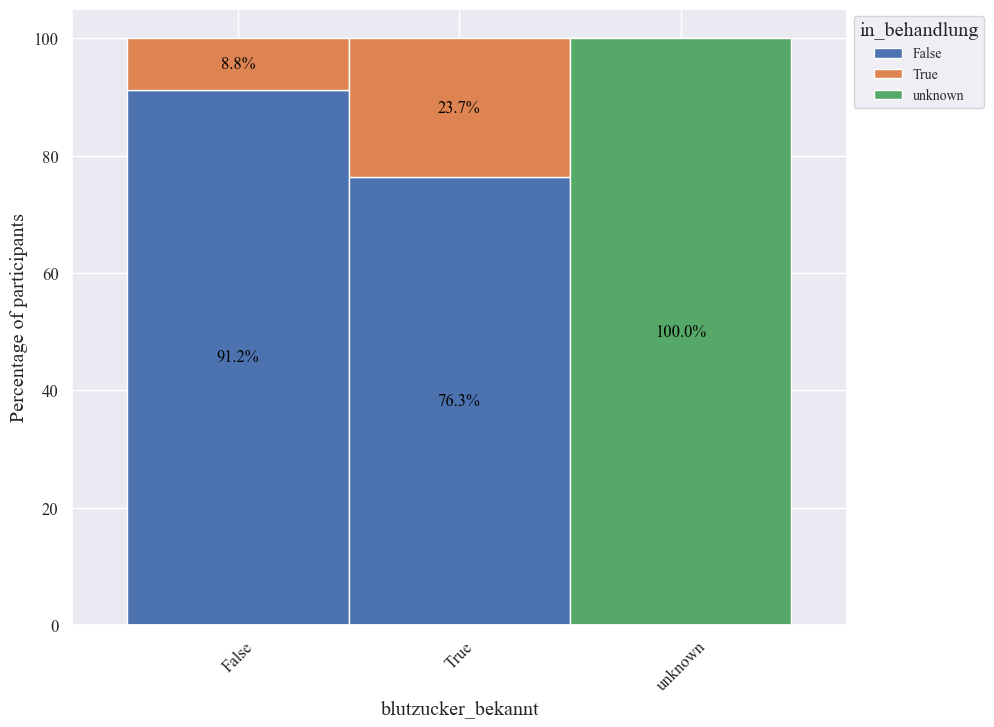

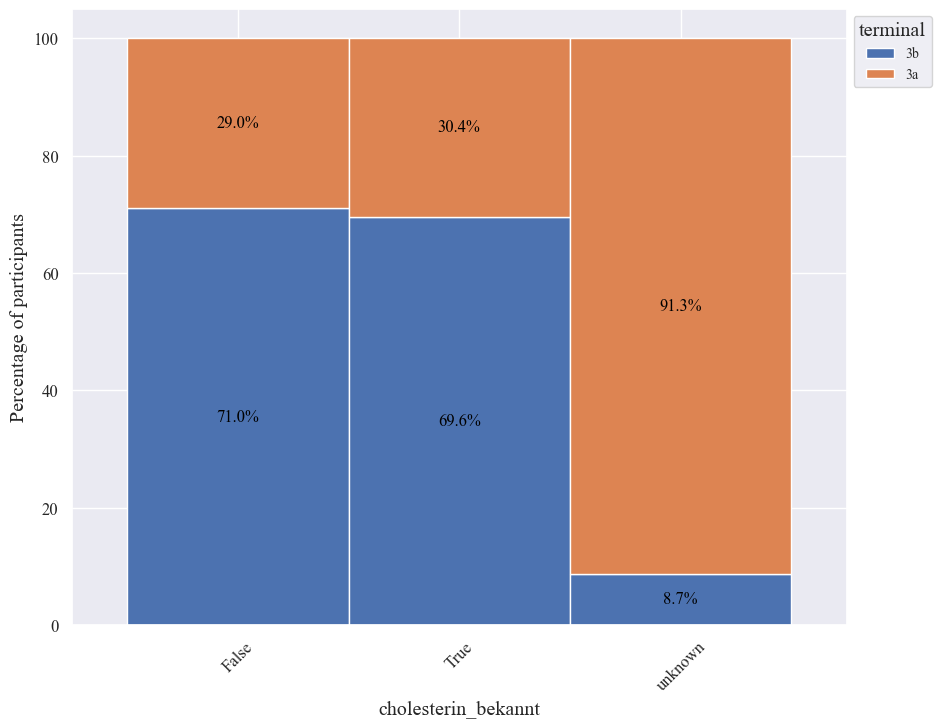

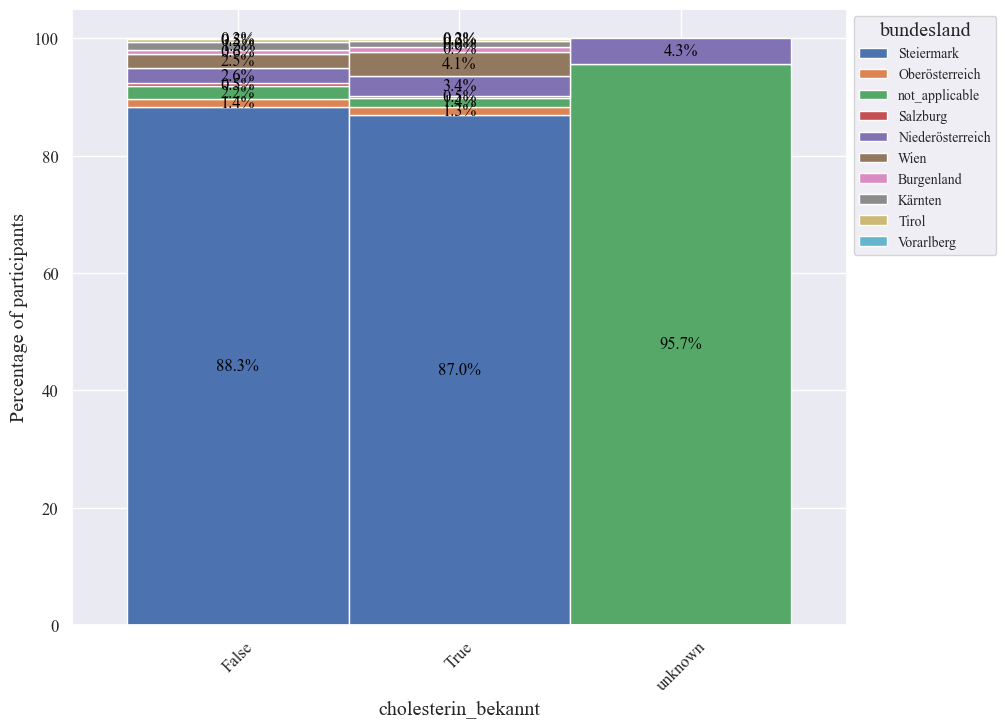

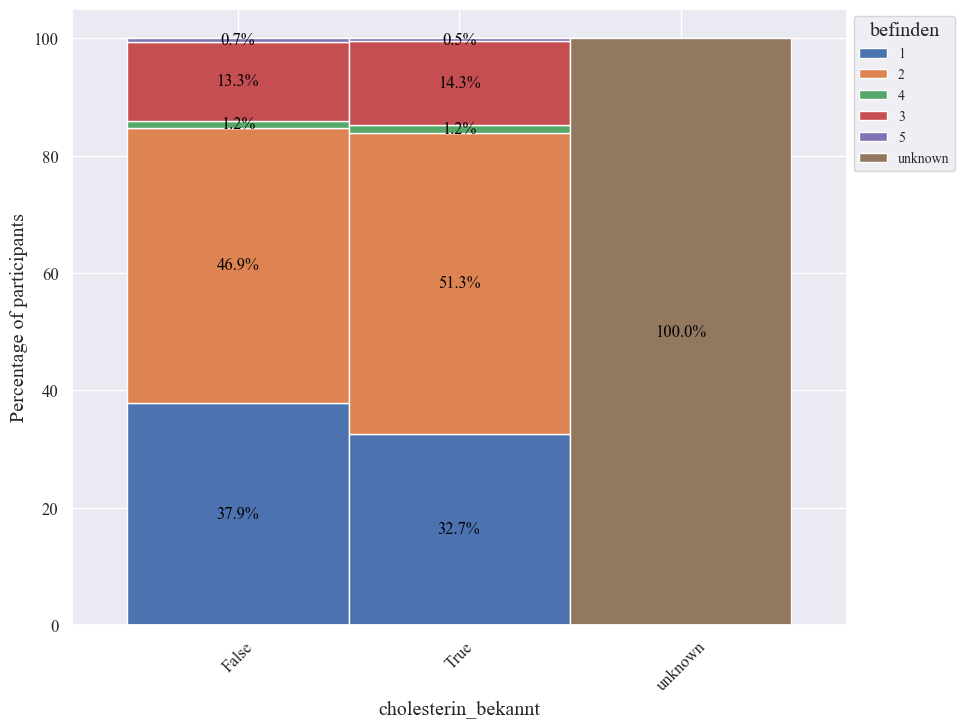

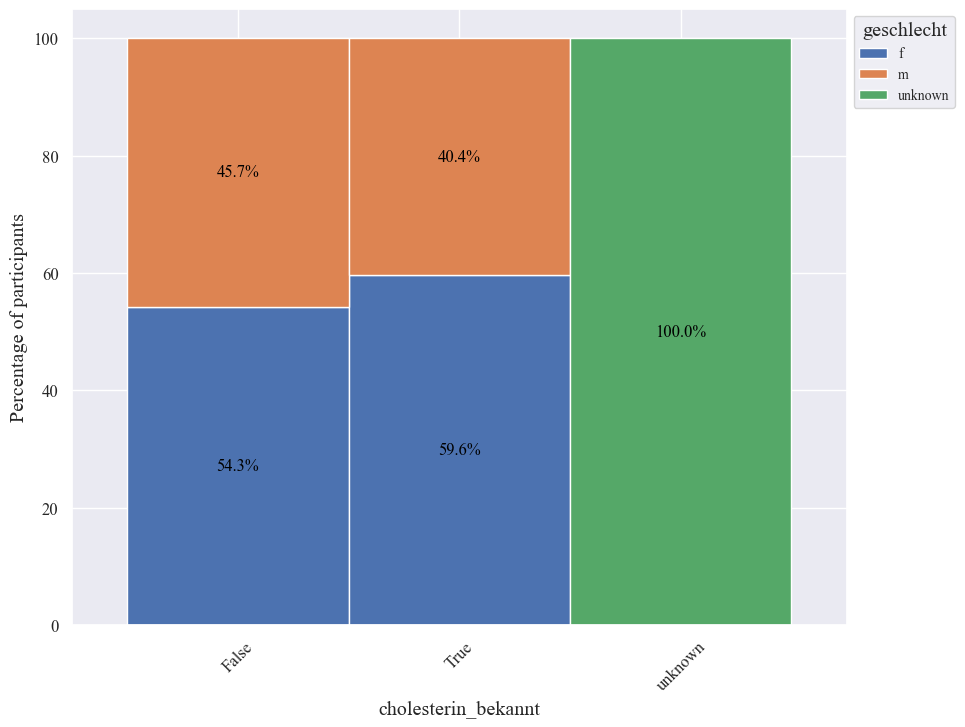

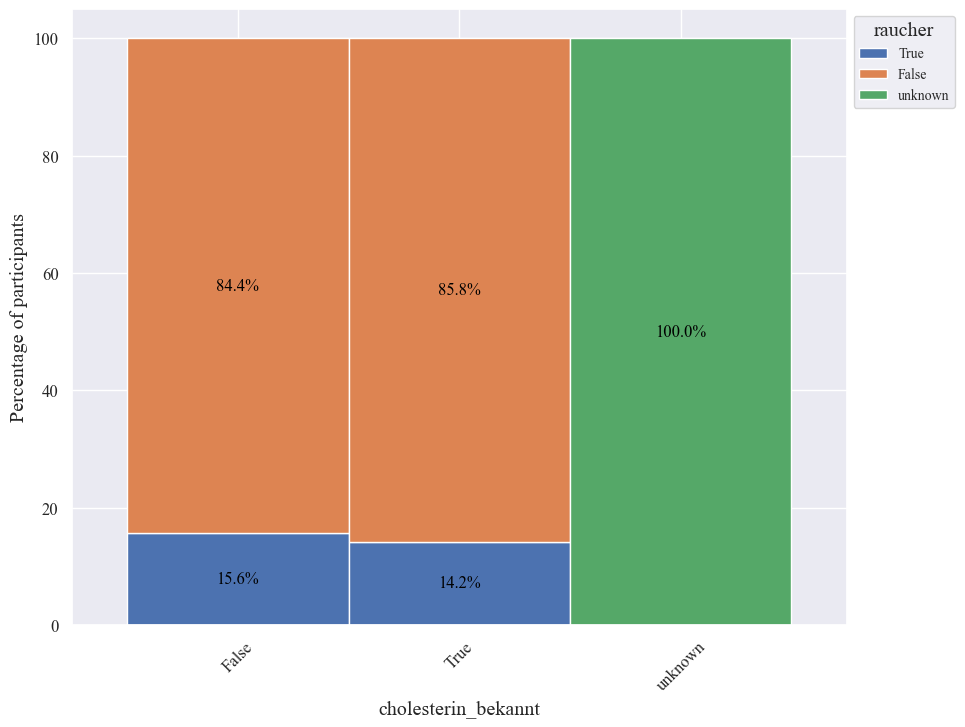

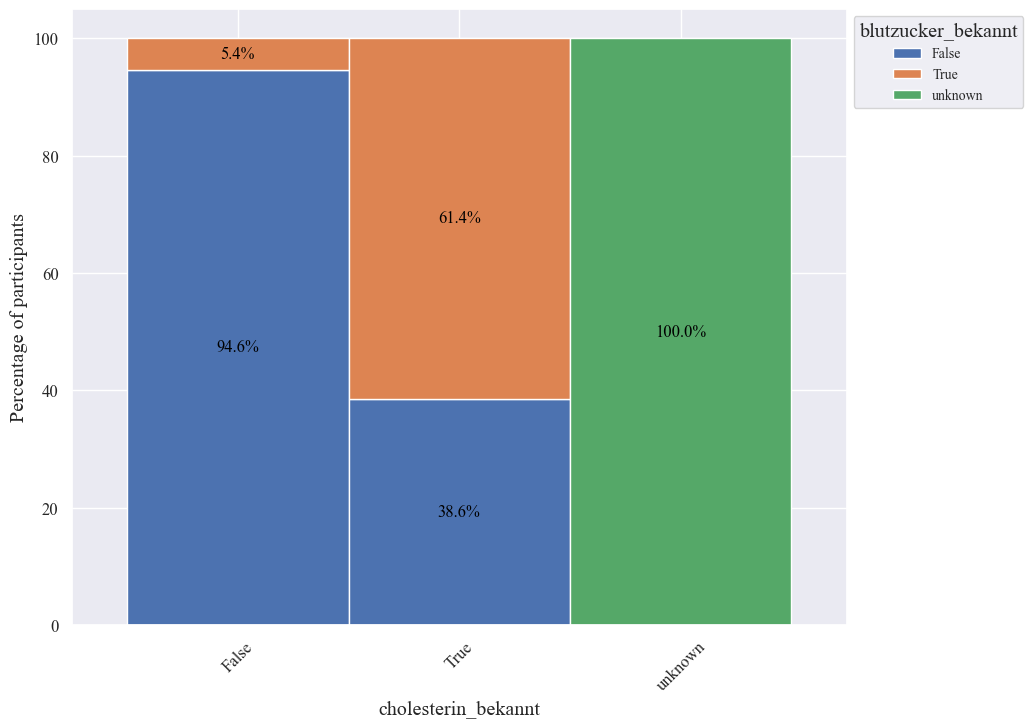

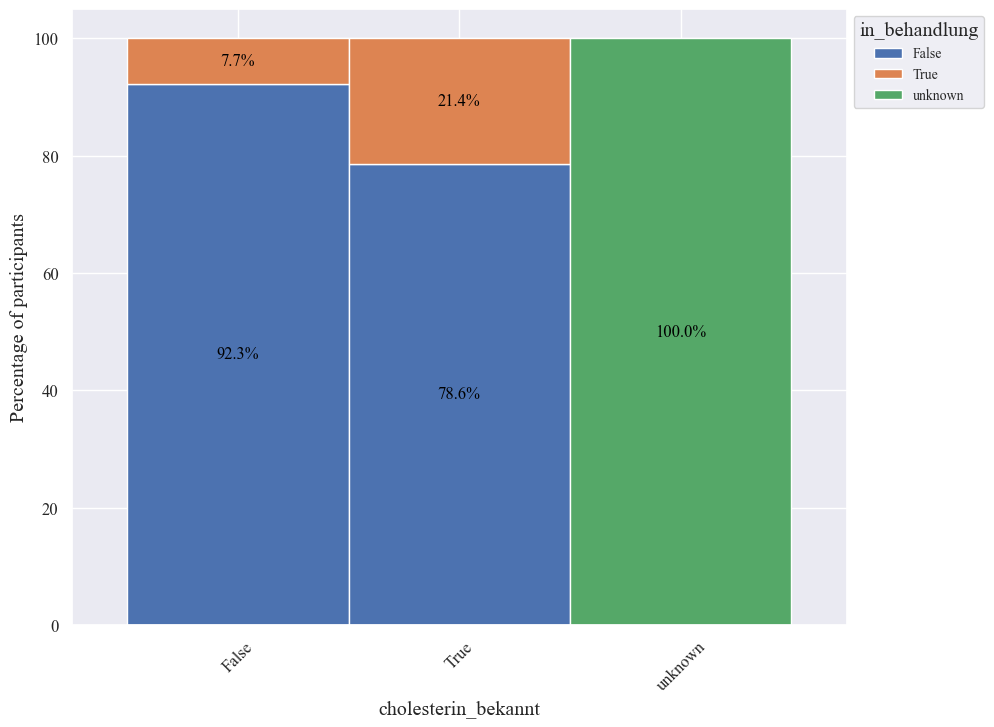

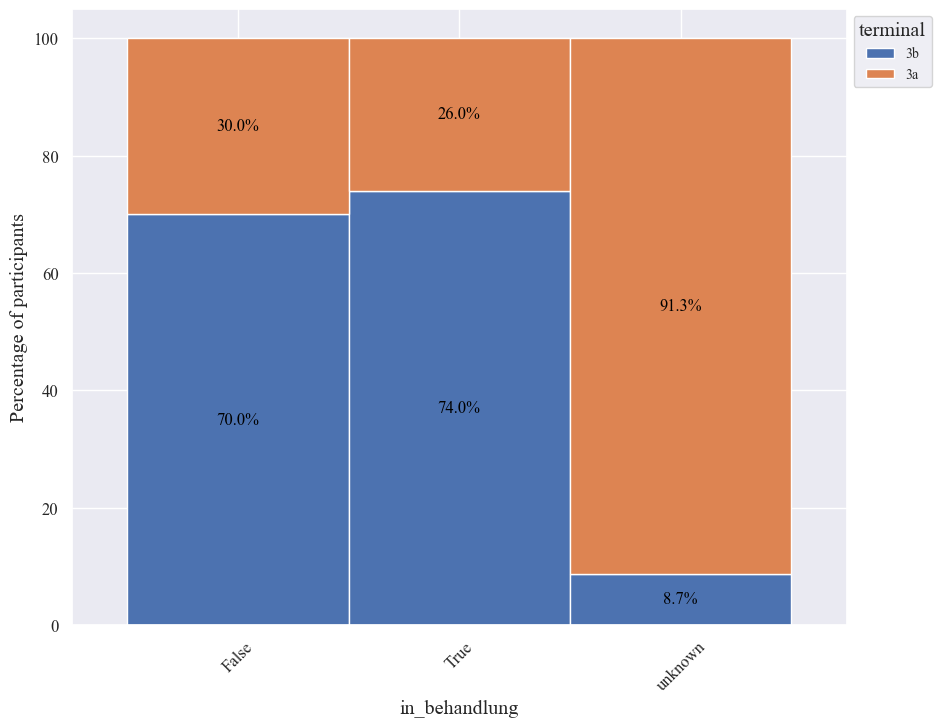

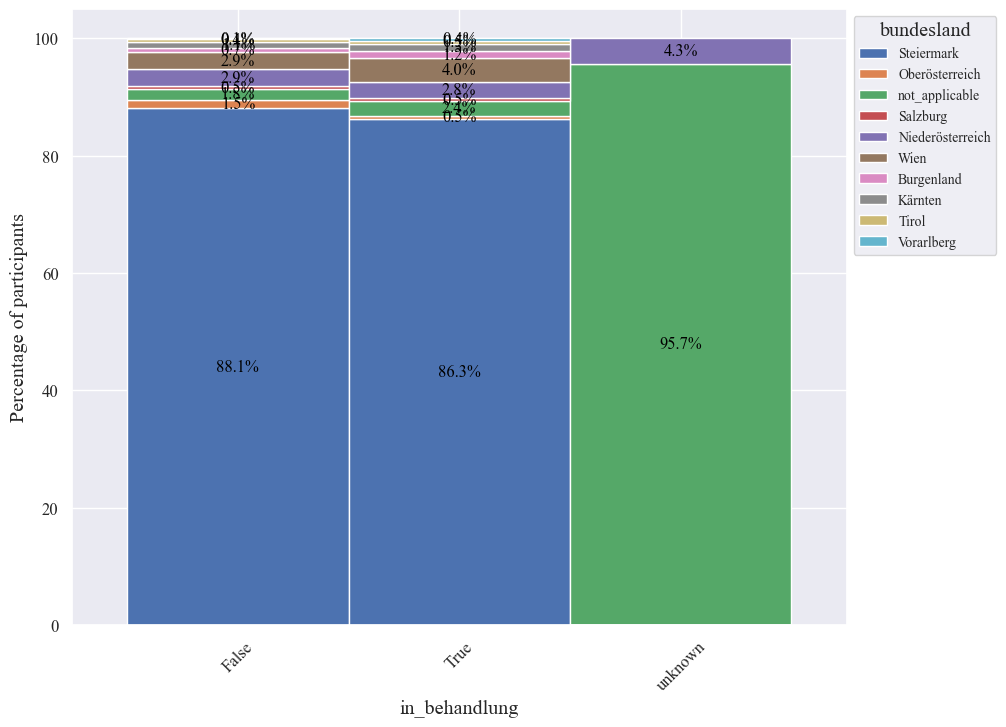

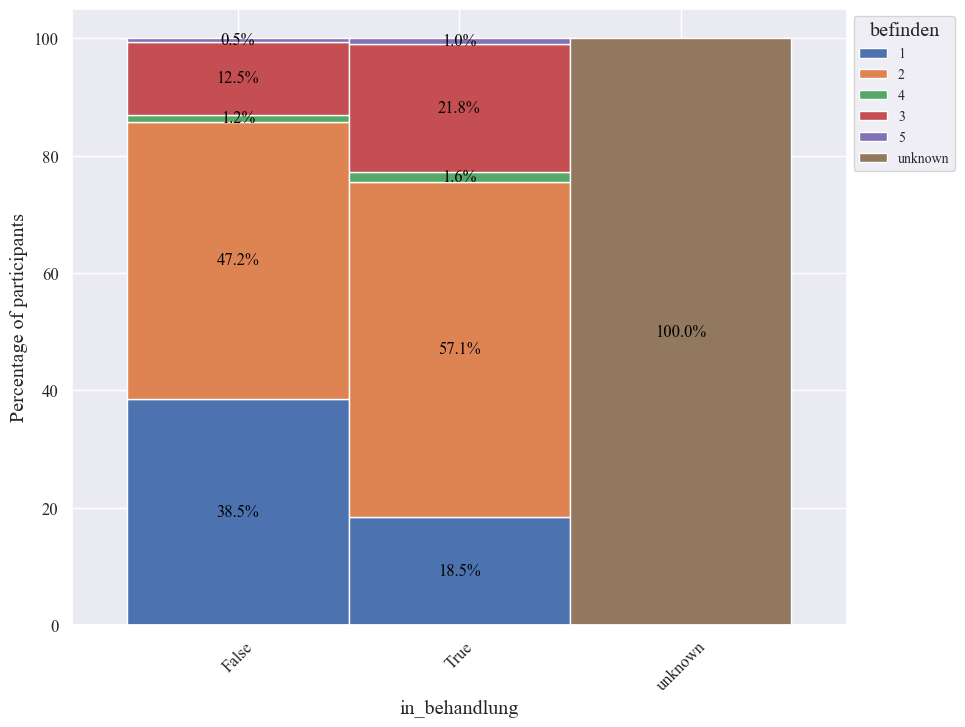

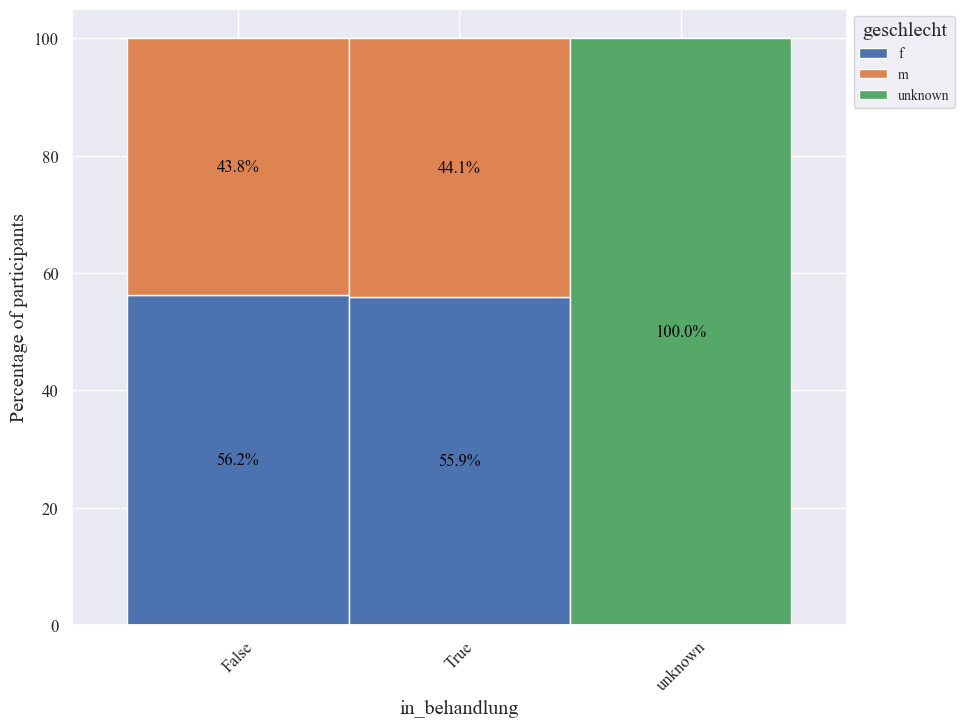

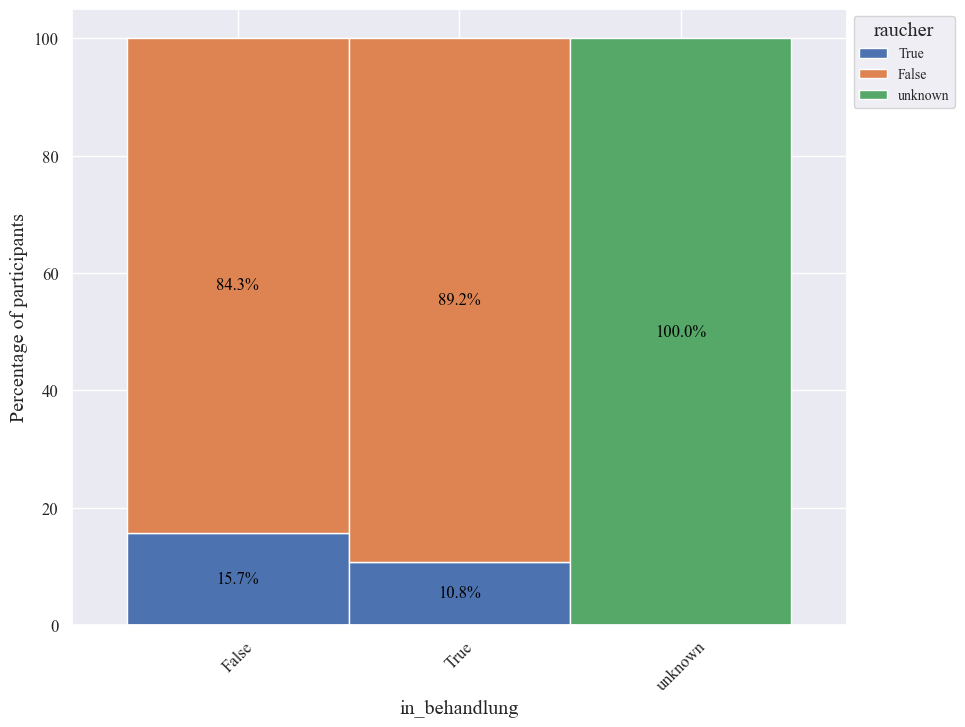

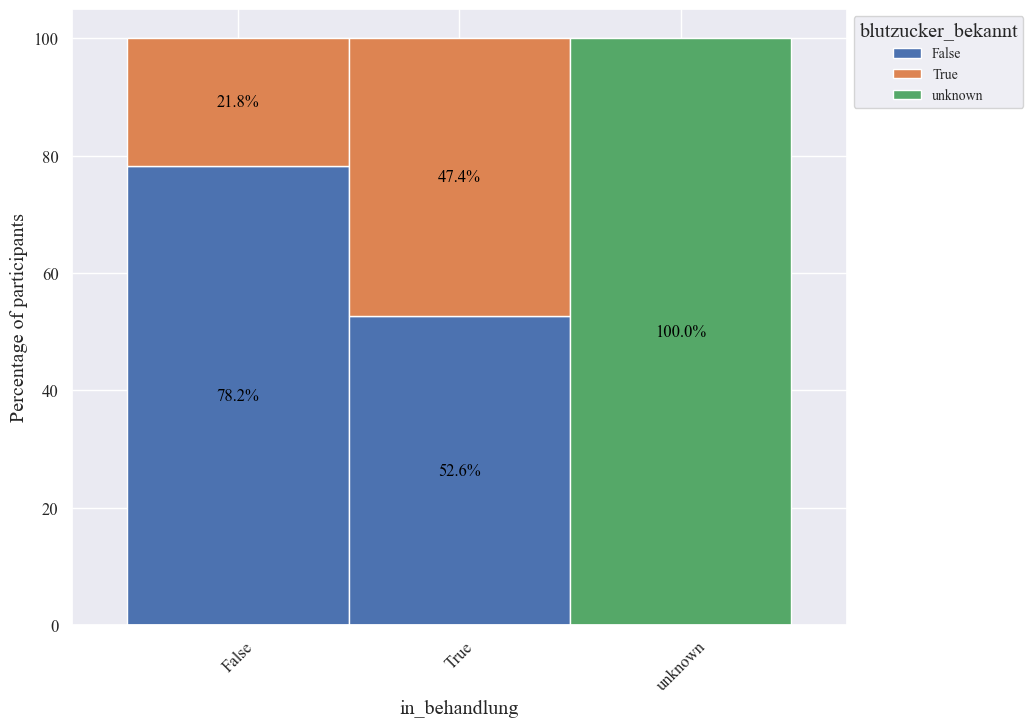

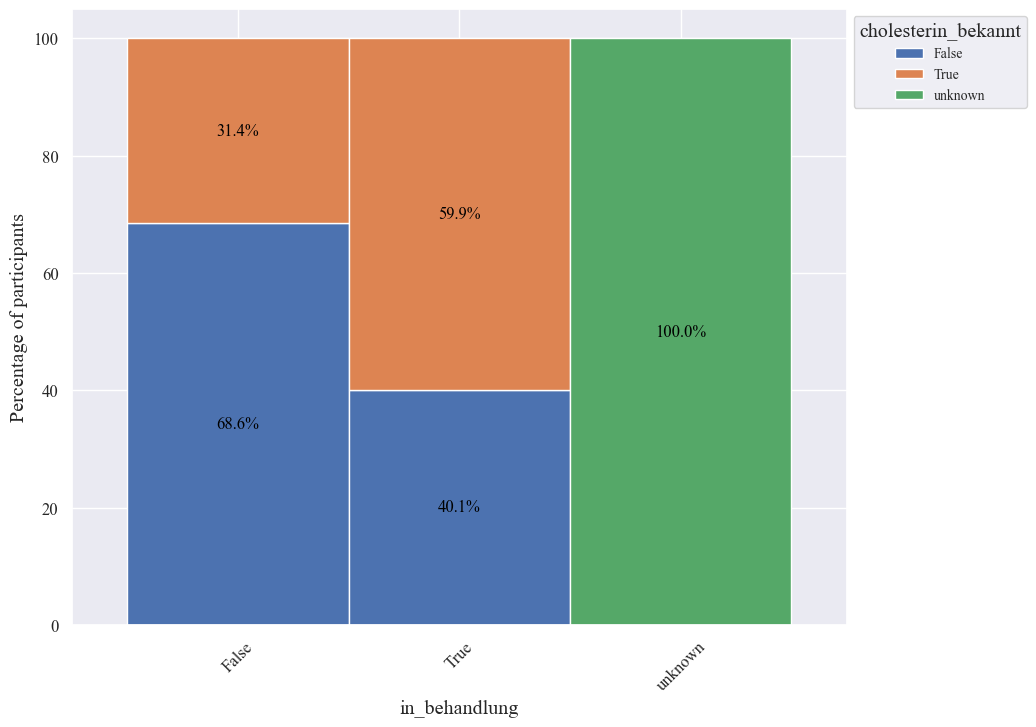

In [19]:
feats = [
 'terminal',
 'bundesland',
 'befinden',
 'geschlecht',
 'raucher',
 'blutzucker_bekannt',
 'cholesterin_bekannt',
 'in_behandlung']

for main_col in feats:
    for group_col in feats:
        if main_col != group_col:
            create_stacked_barplot(data_df, main_col, group_col, stacked_barplot_dir_path)